## **Latar Belakang**

Investor Properti ingin mendapatkan informasi mengenai jenis properti apa yang terbaik dan berpotensial apabila dijadikan tempat sewa berdasarkan tiap-tiap daerah di Bangkok.

## **Data**
Untuk menjawab pertanyaan di atas, kita akan menganalisis data pesanan Airbnb di Bangkok yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF). 

Setelah itu, import library yang akan diperlukan dalam melakukan analisis data.

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy.stats import normaltest
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')

Kemudian import file dataset pesanan Airbnb di Bangkok ke dalam Jupyter Notebook.

In [2]:
# import file dataset dari csv
df=pd.read_csv('Airbnb Listings Bangkok.csv', index_col=[0])
display(df.head(),df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Penjelasan masing-masing kolom pada dataset diatas adalah sebagaimana berikut :
1. id = id unik yang didapatkan setiap kali melakukan listing tempat sewa di Bangkok pada aplikasi Airbnb.
2. name = judul/nama yang dicantumkan pada saat melakukan listing tempat sewa di Bangkok pada aplikasi Airbnb.
3. host_id = id unik yang didapatkan untuk setiap tuan rumah yang melakukan listing di aplikasi Airbnb.
4. host_name = id unik dari setiap pemilik tempat sewa(Tuan Rumah).
5. neighbourhood = nama distrik tempat sewa berdasarkan latitude dan longitude.
6. latitude = posisi tempat sewa berdasarkan garis lintang.
7. longitude = posisi tempat sewa berdasarkan garis bujur.
8. room_type = tipe tempat sewa, terbagi menjadi 4 jenis :
    
    - Entire place/Apt : Entire place merupakan tempat terbaik apabila penyewa mencari rumah yang berlokasi jauh dari rumah yang lain, dimana penyewa dapat memiliki ruang sendiri. Tempat sewa ini biasanya sudah termasuk dengan ruang tidur, kamar mandi, dapur, dan pintu masuk khusus yang terpisah. Perlu dicatat bahwa pada deskripsi tempat sewa jenis ini perlu menjelaskan informasi mengenai apakah Tuan Rumah menetap pada tempat sewa atau tidak (misalnya : 'Tuan Rumah menempati lantai pertama rumah'), serta menjelaskan lebih lanjut mengenai detail tempat sewa.

    - Hotel room : Hotel Room sedikit mirip dengan Entire Place, keseluruhan ruangan tempat sewa ini dikelola oleh satu perusahaan.
    
    - Private rooms : Private room merupakan tempat terbaik apabila penyewa yang lebih menyukai sedikit privasi, namun masih menghargai koneksi lokal dengan tetangga. Saat penyewa memilih Private room, penyewa akan mendapatkan kamar tidur pribadi dan mungkin untuk ruangan lain akan berbagi dengan orang lain. Penyewa mungkin perlu berjalan kaki melalui ruangan yang mungkin ditempati oleh tuan rumah ataupun penyewa lain untuk sampai ke kamar.

    - Shared rooms : Shared rooms diperuntukkan jika penyewa tidak keberatan berbagi tempat dengan orang lain. Saat penyewa memesan Shared roooms, penyewa akan tidur di ruang yang dibagikan bersama dengan orang lain. Shared rooms banyak diminati oleh kalangan wisatawan yang mencari teman baru dan tempat menetap dengan harga terjangkau.
    
9. price = Harga harian berdasarkan mata uang lokal (Baht).
10. minimum_nights = jumlah minimal menginap (dalam satuan malam) untuk menyewa tempat sewa tersebut.
11. number_of_reviews = Banyaknya total reviews dari penyewa pada tempat sewa tersebut.
12. last_review = Histori tanggal review terakhir dari penyewa untuk tempat sewa tersebut pada saat dataset dibuat.
13. reviews_per_month = Rata-rata review per bulan dihitung semenjak data pertama kali di listing (Hasil asumsi).
14. calculated_host_listing_count = banyaknya tempat sewa yang disewakan oleh Tuan Rumah dari tempat sewa yang dilisting pada Airbnb tersebut pada neighborhood yang sama.
15. availability_365 = ketersediaan tempat sewa untuk 365 hari ke depan dihitung semenjak dataset dibuat. Perlu untuk dicatat bahwa kolom availability_365 bisa kurang dari 365 hari dikarenakan besar kemungkinan sudah ada penyewa lain yang melakukan booking sebelumnya.
16. number_of_reviews_ltm = banyaknya jumlah reviews selama 1 tahun terakhir terhitung semenjak tempat sewa listing.

## **Data Understanding and Cleaning**

#### **Column Drop and Casting**

Karena kolom 'id' bersifat unique pada setiap pesanan, sehingga kolom tersebut tidak telalu diperlukan juga untuk melakukan analisis data dan juga kolom 'id' perlu untuk di drop agar mempermudah mengidentifikasi baris duplikat disaat melakukan handling duplikat. Selain kolom 'id', kolom 'minimum_nights', 'calculated_host_listings_count', 'availability_365', dan 'number_of_reviews_ltm' tidak kita gunakan untuk analisis data nanti, sehingga kita dapat melakukan drop pada kolom-kolom tersebut.

In [3]:
# drop kolom Unnamed: 0 dan kolom id
df = df.drop(columns=['id', 'minimum_nights','calculated_host_listings_count','availability_365','number_of_reviews_ltm'])
df

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month
0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,65,2020-01-06,0.50
1,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,0,NaN,NaN
2,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,0,NaN,NaN
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,2,2022-04-01,0.03
4,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,0,NaN,NaN
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,0,NaN,NaN
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,0,NaN,NaN
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,0,NaN,NaN


Kemudian tampilkan informasi terkait dataset dengan bantuan df.info()

In [4]:
# menampilkan info terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               15846 non-null  object 
 1   host_id            15854 non-null  int64  
 2   host_name          15853 non-null  object 
 3   neighbourhood      15854 non-null  object 
 4   latitude           15854 non-null  float64
 5   longitude          15854 non-null  float64
 6   room_type          15854 non-null  object 
 7   price              15854 non-null  int64  
 8   number_of_reviews  15854 non-null  int64  
 9   last_review        10064 non-null  object 
 10  reviews_per_month  10064 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.5+ MB


Dari informasi di atas, dapat terlihat bahwa pada kolom last_review harusnya bertipe data datetime karena berisi histori tanggal review terakhir, oleh karena perlu untuk mengubah tipe data kolom tersebut dari tipe data object menjadi tipe data datetime.

In [5]:
# Mengubah tipe data kolom last_review menjadi datetime
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')

In [6]:
# menampilkan kembali info terkait dataset, setelah perubahan tipe data kolom last_review
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               15846 non-null  object        
 1   host_id            15854 non-null  int64         
 2   host_name          15853 non-null  object        
 3   neighbourhood      15854 non-null  object        
 4   latitude           15854 non-null  float64       
 5   longitude          15854 non-null  float64       
 6   room_type          15854 non-null  object        
 7   price              15854 non-null  int64         
 8   number_of_reviews  15854 non-null  int64         
 9   last_review        10064 non-null  datetime64[ns]
 10  reviews_per_month  10064 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 1.5+ MB


Dapat terlihat bahwa tipe data kolom last_review sudah sesuai dengan yang diharapkan, yaitu tipe data datetime.

#### **Mencari Penjelasan Kolom reviews_per_month**

Karena Kolom reviews_per_month tidak memiliki penjelasan di dokumentasi, maka perlu untuk dibuat asumsi perhitungan yang mendekati nilai aktualnya.

Untuk mencari penjelasan kolom reviews_per_month perlu dicari tahun unik dari kolom last_review dan diambil tahun paling dekat dengan saat ini dengan tujuan untuk membantu melakukan indexing data nantinya, kita menggunakan tahun paling dekat dengan saat ini agar memudahkan pencarian data listing tempat sewa di aplikasi Airbnb (semakin dekat dengan waktu saat ini semakin besar kemungkinan listing tersebut masih ada di Airbnb).

In [7]:
df['last_review'].dt.year.unique()

array([2020.,   nan, 2022., 2017., 2014., 2016., 2019., 2018., 2013.,
       2015., 2021., 2012.])

Ditemukan bahwa tahun paling dekat saat ini yang terdapat pada kolom last_review adalah tahun 2022, sehingga kita menggunakan tahun 2022 untuk melakukan indexing, selain kolom last review, kolom number of review juga diperlukan untuk memfilter data yang tidak terlalu banyak review sehingga memudahkan kita dalam pencarian tahun pertama kali listing tersebut mendapatkan review. Dalam hal ini kita membatasi jumlah banyaknya review pada kolom number_of reviews sebesar <=5. Sehingga didapatkan hasil indexing data yang telah difilter sebagaimana berikut.

In [8]:
# Filter data dengan tahun terakhir review = 2022 dan banyaknya review <= 5
df_sampling = df[(df['last_review'].dt.year==2022) & 
   (df['number_of_reviews']<=5)][['name', 'host_name', 'number_of_reviews', 'last_review', 'reviews_per_month']]
df_sampling.head(60)

,name,host_name,number_of_reviews,last_review,reviews_per_month
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,2,2022-04-01,0.03
56,Quiet Double Bed Apartment,Primrose,1,2022-10-25,0.46
66,"NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airp...",Piya,3,2022-11-28,0.03
108,Big quiet Studio for weekly monthly long term ...,Lily Duangdao,4,2022-10-23,0.70
222,One bedroom suite with kitchen@ center of Bangkok,Attakorn,1,2022-10-08,0.37
230,iSanook Studio 32 sqm 5,ISanook Hotel,3,2022-02-07,0.03
231,iSanook Family Suite Deluxe 67 sqm 3,ISanook Hotel,1,2022-08-27,0.24
268,Private Double Room in Ratchada/Ensuit/WiFi,Siamaze,5,2022-11-26,0.05
269,iSanook Studio 32 sqm 1,ISanook Hotel,3,2022-06-07,0.03
314,1 Bedroom with a Double Bed- 2 guests,Oillie,2,2022-11-24,0.30


Dari 80 data yang coba kita tampilkan diatas, kita akan mencoba melakukan sampling 30 buah data secara acak.

In [9]:
df_sampling_final = df_sampling.loc[(3, 230, 269, 329, 571, 607, 633, 661, 733, 743, 1193, 1260, 1401, 1478, 1675, 1735, 1858, 1865, 1884, 2089, 2112, 2128, 2148, 2216, 2246, 2273, 2313, 2380, 2548, 2604, ),:].reset_index().rename(columns={'index':'index ke-'})
df_sampling_final

,index ke-,name,host_name,number_of_reviews,last_review,reviews_per_month
0,3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,2,2022-04-01,0.03
1,230,iSanook Studio 32 sqm 5,ISanook Hotel,3,2022-02-07,0.03
2,269,iSanook Studio 32 sqm 1,ISanook Hotel,3,2022-06-07,0.03
3,329,Authentic Family House,Phakarat,4,2022-08-16,0.04
4,571,Clean cozy near BTSChidlom and Siam,Gee,3,2022-11-05,0.04
5,607,SKY LINE CBD (Sathorn)Apartment 34 Sq.m,Kornpat,3,2022-08-27,0.37
6,633,Private House Nearby Suvarnabhumi Airport,Ja,2,2022-01-30,0.12
7,661,AK Prodigy 62,Aunchalee,1,2022-01-20,0.09
8,733,Cozy 1 Bed room @The Empire Place Sathorn Condo,Lala,3,2022-11-21,1.55
9,743,Amazing location next to Metro Station,Chayathorn,4,2022-11-22,0.07


Kemudian buat list kosong yang akan di append dengan nilai hasil dari perhitungan.

In [10]:
nilai_gabungan = []

##### **1. Spacious one bedroom at The Kris Condo Bldg. 3 oleh Sirilak**

Data tempat sewa Spacious one bedroom at The Kris Condo Bldg. 3 oleh Sirilak dapat diakses pada [link berikut](https://www.airbnb.com/rooms/35780?source_impression_id=p3_1688368354_WNavqoQlUn%2FKxRVx&scroll_to_review=861299032052174992).

In [11]:
display(Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*2qBvektR9Pl5XoaBZZmTqQ.png'),
        Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*11CR-3Bq7azupVszvpFjOg.png'))

Dari keseluruhan review tempat sewa Spacious one bedroom at The Kris Condo Bldg. 3 perlu diambil data pertama kali seseorang melakukan review pada tempat sewa tersebut, yaitu di bulan Juli tahun 2016, sedangkan data last_review pada dataset jatuh pada bulan April tahun 2022, kemudian kita perlu untuk menghitung jumlah bulan dari bulan Juli tahun 2016 hingga ke bulan April tahun 2022, yaitu sebanyak 69 bulan, apabila asumsi kita adalah kolom reviews_per_month merupakan hasil bagi dari jumlah review dengan banyaknya bulan dari review pertama tempat sewa tersebut, maka didapatkan reviews_per_month dari tempat sewa Spacious one bedroom at The Kris Condo Bldg. 3 oleh Sirilak berdasarkan perhitungan adalah sebagaimana berikut :

In [12]:
# Perhitungan reviews_per_month dari Spacious one bedroom at The Kris Condo Bldg. 3 oleh Sirilak
nilai_1 = (2/69).__round__(2)    #(number_of_reviews)/(jumlah bulan dari pertama kali seseorang memberikan review)
nilai_gabungan.append(nilai_1)
nilai_1

0.03

##### **2. iSanook Studio 32 sqm 5 oleh iSanook Hotel**

Data tempat sewa iSanook Studio 32 sqm 5 oleh iSanook Hotel dapat diakses pada [link berikut](https://www.airbnb.com/rooms/2368771?source_impression_id=p3_1688403645_ZPlKgIqAI8HM2gtd).

In [13]:
display(Image(url='https://miro.medium.com/v2/resize:fit:618/format:webp/1*yRYFdazw57T6PMqy7HExCw.png'),
        Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*DpuU9HkZcSM9fPKPXznxzw.png'))

Sama dengan sebelumnya, kita perlu mencari terlebih dahulu rentang dari pertama kali seseorang review (Maret 2015) sampai ke bulan last_review di bulan Februari 2022, sehingga didapatkan jumlah bulannya sebanyak 83 bulan. maka didapatkan reviews_per_month dari tempat sewa iSanook Studio 32 sqm 5 oleh iSanook Hotel berdasarkan perhitungan adalah sebagaimana berikut :

In [14]:
# Perhitungan reviews_per_month dari iSanook Studio 32 sqm 5 oleh iSanook Hotel
nilai_2 = (3/83).__round__(2)    #(number_of_reviews)/(jumlah bulan dari pertama kali seseorang memberikan review)
nilai_gabungan.append(nilai_2)
nilai_2

0.04

##### **3. iSanook Studio 32 sqm 1 oleh iSanook Hotel**

Data tempat sewa iSanook Studio 32 sqm 1 oleh iSanook Hotel dapat diakses pada [link berikut](https://www.airbnb.co.in/rooms/2587195?source_impression_id=p3_1688403941_zPlfQF1KOSGfQMcK).

In [15]:
display(Image(url='https://miro.medium.com/v2/resize:fit:574/format:webp/1*N3EEv_OsQAFkqEjh35hybg.png'),
        Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*dCp8lK8jdP1gaelfPV-DlQ.png'))

Setelah mencari terlebih dahulu rentang dari pertama kali seseorang review (Oktober 2014) sampai ke bulan last_review di bulan Juni 2022, didapatkan jumlah bulannya sebanyak 92 bulan. maka didapatkan reviews_per_month dari tempat sewa iSanook Studio 32 sqm 1 oleh iSanook Hotel berdasarkan perhitungan adalah sebagaimana berikut :

In [16]:
# Perhitungan reviews_per_month dari iSanook Studio 32 sqm 1 oleh iSanook Hotel
nilai_3 = (3/92).__round__(2)    #(number_of_reviews)/(jumlah bulan dari pertama kali seseorang memberikan review)
nilai_gabungan.append(nilai_3)
nilai_3

0.03

##### **4. Authentic Family House oleh Phakarat**

Data tempat sewa Authentic Family House oleh Phakarat dapat diakses pada [link berikut](https://www.airbnb.co.uk/rooms/2720747?source_impression_id=p3_1688424863_wBhtHWMZ8Ha6zrEM).

In [17]:
display(Image(url='https://miro.medium.com/v2/resize:fit:720/format:webp/1*XkyqLzAfzDRKPD49WN_vLg.png'),
        Image(url='https://miro.medium.com/v2/resize:fit:786/format:webp/1*7HEohgHId4y5ntlPWFhXNw.png'))

Untuk listing tempat sewa Authentic Family House oleh Phakarat, didapatkan rentang bulan disaat pertama kali seseorang memberikan review (Januari 2015) hingga ke bulan last_review (Agustus 2022) adalah sebanyak 91 bulan. Sehingga didapatkan reviews_per_month dari tempat sewa Authentic Family House oleh Phakarat berdasarkan perhitungan adalah sebagaimana berikut :

In [18]:
# Perhitungan reviews_per_month dari Authentic Family House oleh Phakarat
nilai_4 = (4/91).__round__(2)    #(number_of_reviews)/(jumlah bulan dari pertama kali seseorang memberikan review)
nilai_gabungan.append(nilai_4)
nilai_4

0.04

##### **5. Clean cozy near BTSChidlom and Siam oleh Gee**

Data tempat sewa Clean cozy near BTSChidlom and Siam oleh Gee dapat diakses pada [link berikut](https://www.airbnb.com/rooms/4783950?source_impression_id=p3_1688425349_lp9apry4q5nAntbI).

In [19]:
display(Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*4NpPMWZYgBQ9WL5nf7dKOA.png'),
        Image(url='https://miro.medium.com/v2/resize:fit:828/format:webp/1*kivxaTFbvq_VuzsAVjgKSg.png'))

Dari data tempat sewa Clean cozy near BTSChidlom and Siam oleh Gee, didapatkan jumlah bulan pada rentang bulan disaat pertama kali seseorang memberikan review (Desember 2015) hingga ke bulan last_review (November 2022) adalah sebanyak 83 bulan. Sehingga didapatkan reviews_per_month dari tempat sewa Clean cozy near BTSChidlom and Siam oleh Gee berdasarkan perhitungan adalah sebagaimana berikut :

In [20]:
# Perhitungan reviews_per_month dari Authentic Family House oleh Phakarat
nilai_5 = (3/83).__round__(2)    #(number_of_reviews)/(jumlah bulan dari pertama kali seseorang memberikan review)
nilai_gabungan.append(nilai_5)
nilai_5

0.04

Untuk data ke 6 hingga 20, hanya akan ditampilkan link data tempat sewa serta hasil dari perhitungan agar tidak memakan terlalu banyak space pada jupyter notebook.

6. Data tempat sewa SKY LINE CBD (Sathorn)Apartment 34 Sq.m	oleh Kornpat dapat diakses pada [link berikut](https://www.airbnb.com/rooms/5418981?source_impression_id=p3_1688535119_H7dz%2B2xVBiKHQ%2BGo).

In [21]:
nilai_6 = (3/4).__round__(2)
nilai_gabungan.append(nilai_6)
nilai_6

0.75

7. Data tempat sewa Private House Nearby Suvarnabhumi Airport oleh Ja dapat diakses pada [link berikut](https://www.airbnb.com/rooms/6057511?source_impression_id=p3_1688535952_3LbAYREYv6XmcQgq).

In [22]:
nilai_7 = (2/6).__round__(2)
nilai_gabungan.append(nilai_7)
nilai_7

0.33

8. Data tempat sewa AK Prodigy 62 oleh Aunchalee dapat diakses pada [link berikut](https://www.airbnb.ca/rooms/5148753?source_impression_id=p3_1688720601_2d5elwZzJ%2FHc%2FI4f&locale=en&_set_bev_on_new_domain=1688368354_ZmVmODgyM2NmMTlm).

In [23]:
nilai_8 = (1/1).__round__(2)
nilai_gabungan.append(nilai_8)
nilai_8

1.0

9. Data tempat sewa Cozy 1 Bed room @The Empire Place Sathorn Condo oleh Lala dapat diakses pada [link berikut](https://www.airbnb.com/rooms/5226175?source_impression_id=p3_1688542925_kkx38tmUGdFaI7%2Fv).

In [24]:
nilai_9 = (3/1).__round__(2)
nilai_gabungan.append(nilai_9)
nilai_9

3.0

10. Data tempat sewa Amazing location next to Metro Station oleh Chayathorn dapat diakses pada [link berikut](https://www.airbnb.com/rooms/6363567?source_impression_id=p3_1688543353_hQWyi%2BvjIL%2BP6Go3).

In [25]:
nilai_10 = (4/1).__round__(2)
nilai_gabungan.append(nilai_10)
nilai_10

4.0

11. Data tempat sewa City condo near everything.Walk to MRT. Best value oleh Nuchnalin dapat diakses pada [link berikut](https://www.airbnb.com/rooms/8783124?source_impression_id=p3_1688722433_LNYr%2FgOAu5W49X5z).

In [26]:
nilai_11 = (4/4).__round__(2)
nilai_gabungan.append(nilai_11)
nilai_11

1.0

12. Data tempat sewa Lumpini place Srinakarin-Huamak oleh Nune dapat diakses pada [link berikut](https://www.airbnb.com/rooms/9036578?source_impression_id=p3_1688693511_6l8jTFTlbyiaNyOf).

In [27]:
nilai_12 = (1/1).__round__(2)
nilai_gabungan.append(nilai_12)
nilai_12

1.0

13. Data tempat sewa The Sunrise Residence oleh TheSunrise dapat diakses pada [link berikut](https://www.airbnb.ie/rooms/9241938?source_impression_id=p3_1688694805_8kJNf42%2BiCV0kD7g).

In [28]:
nilai_13 = (5/83).__round__(2)
nilai_gabungan.append(nilai_13)
nilai_13

0.06

14. Data tempat sewa Elio DelRay Condo Sukhumvit 64 Road oleh Goy dapat diakses pada [link berikut](https://www.airbnb.com/rooms/9458457?source_impression_id=p3_1688695599_l%2Bhbl%2FHdlrWG2%2F3%2F).

In [29]:
nilai_14 = (2/41).__round__(2)
nilai_gabungan.append(nilai_14)
nilai_14

0.05

15. Data tempat sewa Cosy and convenient unit in Bangkok oleh Michael dapat diakses pada [link berikut](https://www.airbnb.com/rooms/11443057?source_impression_id=p3_1688696815_tcuiRIxV42%2FOQFfh).

In [30]:
nilai_15 = (5/48).__round__(2)
nilai_gabungan.append(nilai_15)
nilai_15

0.1

16. Data tempat sewa Collezio, Sathorn-Pipat oleh Weeree dapat diakses pada [link berikut](https://www.airbnb.com/rooms/11831241?source_impression_id=p3_1688697280_jbJdo6BaKNZpcMtU).

In [31]:
nilai_16 = (4/57).__round__(2)
nilai_gabungan.append(nilai_16)
nilai_16

0.07

17. Data tempat sewa Sukhumvit-Phakanong Condominiums (100m. to BTS) oleh Tanakorn dapat diakses pada [link berikut](https://www.airbnb.com/rooms/12818249?source_impression_id=p3_1688697795_nXBW6xODmb4fW%2BmO).

In [32]:
nilai_17 = (2/1.2).__round__(2)
nilai_gabungan.append(nilai_17)
nilai_17

1.67

18. Data tempat sewa Lovely Bedroom near MRT Phra Ram 9. oleh Jhae dapat diakses pada [link berikut](https://www.airbnb.com/rooms/12093185?source_impression_id=p3_1688698789_6Ka%2FN5zCuMXK%2B4tR).

In [33]:
nilai_18 = (5/5.6).__round__(2)
nilai_gabungan.append(nilai_18)
nilai_18

0.89

19. Data tempat sewa Room on 23rd Fl with River View oleh Thienchai dapat diakses pada [link berikut](https://www.airbnb.com/rooms/12296731?source_impression_id=p3_1688702319_ZCfjXmTQylDYJSZT).

In [34]:
nilai_19 = (2/75).__round__(2)
nilai_gabungan.append(nilai_19)
nilai_19

0.03

20. Data tempat sewa 2BR,140sqm,Family,Kitchen,Near BTS,Central Rama 3 oleh Kriengsak dapat diakses pada [link berikut](https://www.airbnb.com/rooms/12721121?source_impression_id=p3_1688704012_3%2BiVm4GSMHGygBXx).

In [35]:
nilai_20 = (4/61).__round__(2)
nilai_gabungan.append(nilai_20)
nilai_20

0.07

21. Data tempat sewa Big apartment with swimming pool view oleh Krittiya dapat diakses pada [link berikut](https://www.airbnb.ca/rooms/13676256?source_impression_id=p3_1688704579_eJPvO0TtyY6Q32Uh).

In [36]:
nilai_21 = (2/65).__round__(2)
nilai_gabungan.append(nilai_21)
nilai_21

0.03

22. Data tempat sewa 1 bed room in Central Bangkok in Sukhumvit 49 oleh Savitri dapat diakses pada [link berikut](https://www.airbnb.co.nz/rooms/14240567?source_impression_id=p3_1688715254_WQf%2BhV3lO0j4IUCF).

In [37]:
nilai_22 = (1/1).__round__(2)
nilai_gabungan.append(nilai_22)
nilai_22

1.0

23. Data tempat sewa New condominium, Asoke-Sukhumvit area 250m to MRT oleh Mandy dapat diakses pada [link berikut](https://www.airbnb.ie/rooms/13871528?source_impression_id=p3_1688716857_pMxW02NXmCW%2F9QeY).

In [38]:
nilai_23 = (2/43).__round__(2)
nilai_gabungan.append(nilai_23)
nilai_23

0.05

24. Data tempat sewa The Base Park West Sukhumvit 77 # High Floor oleh Sukanya dapat diakses pada [link berikut](https://www.airbnb.com/rooms/13982617?source_impression_id=p3_1688718494_Ln1%2BTrpLCaVzCFYr&locale=en&_set_bev_on_new_domain=1688368354_ZmVmODgyM2NmMTlm).

In [39]:
nilai_24 = (1/1).__round__(2)
nilai_gabungan.append(nilai_24)
nilai_24

1.0

25. Data tempat sewa Sathon spacious studio-5min bts s'taksin wifi oleh Wimonpak dapat diakses pada [link berikut](https://www.airbnb.com/rooms/14456950?source_impression_id=p3_1688719196_hKrWh%2B7f%2BOlf85i0).

In [40]:
nilai_25 = (5/74).__round__(2)
nilai_gabungan.append(nilai_25)
nilai_25

0.07

26. Data tempat sewa Cozy 1BR Free Wifi. Close to BTS Ratchayotin oleh Chanamas dapat diakses pada [link berikut](https://www.airbnb.co.nz/rooms/14879023?source_impression_id=p3_1688719634_8eYJ4yeEHokDrz8a).

In [41]:
nilai_26 = (5/71).__round__(2)
nilai_gabungan.append(nilai_26)
nilai_26

0.07

27. Data tempat sewa Posh and Chic 1 Bedroom in Phrompong area. oleh Mona dapat diakses pada [link berikut](https://www.airbnb.co.in/rooms/14156655?source_impression_id=p3_1688719730_gihGAIn%2BpvqGRA7f).

In [42]:
nilai_27 = (1/1).__round__(2)
nilai_gabungan.append(nilai_27)
nilai_27

1.0

28. Data tempat sewa Studio Executive, Citadines Sukhumvit 11 Bangkok oleh Noppawan dapat diakses pada [link berikut](https://www.airbnb.ie/rooms/14223453?source_impression_id=p3_1688719836_kckuhpNAYBXeI83i).

In [43]:
nilai_28 = (4/71).__round__(2)
nilai_gabungan.append(nilai_28)
nilai_28

0.06

29. Data tempat sewa Private Twin Room in Ratchada/Ensuit/WiFi oleh Siamaze dapat diakses pada [link berikut](https://www.airbnb.ca/rooms/16007710?source_impression_id=p3_1688719942_%2F9%2BUBBk5RolL26Yr).

In [44]:
nilai_29 = (3/61).__round__(2)
nilai_gabungan.append(nilai_29)
nilai_29

0.05

30. Data tempat sewa CENTRIC ARI oleh Prao dapat diakses pada [link berikut](https://www.airbnb.com/rooms/15489079?source_impression_id=p3_1688720011_llw8J5dZOV2j%2BIvm).

In [45]:
nilai_30 = (3/70).__round__(2)
nilai_gabungan.append(nilai_30)
nilai_30

0.04

Kemudian ubah ke 30 hasil perhitungan yang sudah dimuat dalam list nilai_gabungan menjadi sebuah dataframe.

In [46]:
df_month_review = pd.DataFrame(nilai_gabungan).rename(columns={0:'reviews_per_month_predict'})
df_month_review

,reviews_per_month_predict
0,0.03
1,0.04
2,0.03
3,0.04
4,0.04
5,0.75
6,0.33
7,1.00
8,3.00
9,4.00


Gabungkan data tersebut ke dalam data sampling.

In [47]:
df_sampling_final = pd.concat([df_sampling_final, df_month_review], axis=1)
df_sampling_final

,index ke-,name,host_name,number_of_reviews,last_review,reviews_per_month,reviews_per_month_predict
0,3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,2,2022-04-01,0.03,0.03
1,230,iSanook Studio 32 sqm 5,ISanook Hotel,3,2022-02-07,0.03,0.04
2,269,iSanook Studio 32 sqm 1,ISanook Hotel,3,2022-06-07,0.03,0.03
3,329,Authentic Family House,Phakarat,4,2022-08-16,0.04,0.04
4,571,Clean cozy near BTSChidlom and Siam,Gee,3,2022-11-05,0.04,0.04
5,607,SKY LINE CBD (Sathorn)Apartment 34 Sq.m,Kornpat,3,2022-08-27,0.37,0.75
6,633,Private House Nearby Suvarnabhumi Airport,Ja,2,2022-01-30,0.12,0.33
7,661,AK Prodigy 62,Aunchalee,1,2022-01-20,0.09,1.00
8,733,Cozy 1 Bed room @The Empire Place Sathorn Condo,Lala,3,2022-11-21,1.55,3.00
9,743,Amazing location next to Metro Station,Chayathorn,4,2022-11-22,0.07,4.00


Kemudian buat kolom baru berisikan nilai error dari reviews_per_month aktual dengan review_per_month_predict (hasil prediksi).

In [48]:
df_sampling_final['reviews_per_month_error'] = df_sampling_final['reviews_per_month'] - df_sampling_final['reviews_per_month_predict']
df_sampling_final

,index ke-,name,host_name,number_of_reviews,last_review,reviews_per_month,reviews_per_month_predict,reviews_per_month_error
0,3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,2,2022-04-01,0.03,0.03,0.00
1,230,iSanook Studio 32 sqm 5,ISanook Hotel,3,2022-02-07,0.03,0.04,-0.01
2,269,iSanook Studio 32 sqm 1,ISanook Hotel,3,2022-06-07,0.03,0.03,0.00
3,329,Authentic Family House,Phakarat,4,2022-08-16,0.04,0.04,0.00
4,571,Clean cozy near BTSChidlom and Siam,Gee,3,2022-11-05,0.04,0.04,0.00
5,607,SKY LINE CBD (Sathorn)Apartment 34 Sq.m,Kornpat,3,2022-08-27,0.37,0.75,-0.38
6,633,Private House Nearby Suvarnabhumi Airport,Ja,2,2022-01-30,0.12,0.33,-0.21
7,661,AK Prodigy 62,Aunchalee,1,2022-01-20,0.09,1.00,-0.91
8,733,Cozy 1 Bed room @The Empire Place Sathorn Condo,Lala,3,2022-11-21,1.55,3.00,-1.45
9,743,Amazing location next to Metro Station,Chayathorn,4,2022-11-22,0.07,4.00,-3.93


In [49]:
df_sampling_final[['reviews_per_month', 'reviews_per_month_predict', 'reviews_per_month_error']]

,reviews_per_month,reviews_per_month_predict,reviews_per_month_error
0,0.03,0.03,0.00
1,0.03,0.04,-0.01
2,0.03,0.03,0.00
3,0.04,0.04,0.00
4,0.04,0.04,0.00
5,0.37,0.75,-0.38
6,0.12,0.33,-0.21
7,0.09,1.00,-0.91
8,1.55,3.00,-1.45
9,0.07,4.00,-3.93


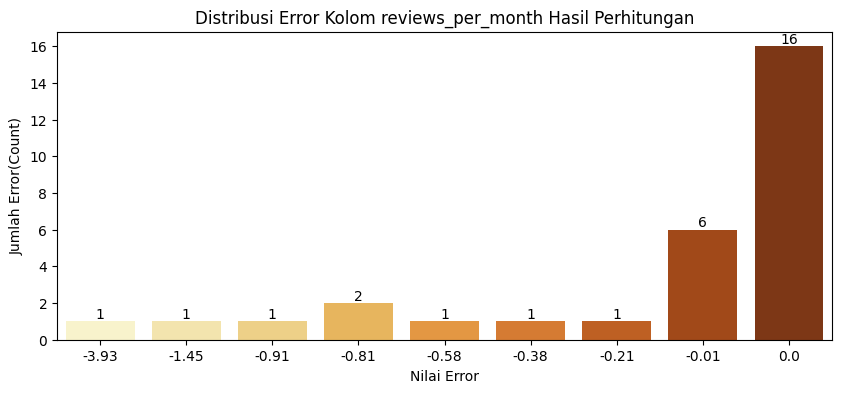

In [50]:
plt.figure(figsize=(10,4))
labelx = df_sampling_final['reviews_per_month_error'].round(2)
labely = [i for i in range(30)]
ax = sns.barplot(
    x=labelx,
    y=labely,
    estimator=len,
    palette='YlOrBr'
)
plt.title('Distribusi Error Kolom reviews_per_month Hasil Perhitungan')
plt.xlabel('Nilai Error', size=10)
plt.ylabel('Jumlah Error(Count)', size=10)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Dari data hasil perhitungan di atas, kita mendapatkan hasil error yang membentuk sebuah pola :
- Nilai error dari kolom reviews_per_month hasil perhitungan banyak yang bernilai 0
- Jika nilai error dari kolom reviews_per_month hasil perhitungan tidak bernilai 0, error yang dihasilkan selalu bernilai negatif
- Nilai error yang selalu bernilai negatif menandakan bahwa nilai pembagi pada rumus perhitungan masih kurang besar, yang mengakibatkan nilai yang dihasilkan lebih besar dari yang seharusnya, dan ketika nilai ini dijadikan nilai pengurang dari nilai aktual untuk menghasilkan nilai error, maka nilai error yang dihasilkan akan bernilai negatif(nilai pengurang(nilai hasil perhitungan reviews_per_month) lebih besar dari nilai reviews_per_month aktual)

Dari pola tersebut kita bisa mendapatkan asumsi baru bahwa jumlah bulan yang dihitung sebagai pembagi pada persamaan bukanlah dari pertama kali seseorang memberikan review pada tempat sewa, namun dihitung dari pertama kali tempat sewa tersebut mulai di listing pada aplikasi Airbnb. Dimana apabila dari perhitungan sebelumnya nilai error sudah bernilai 0, dapat diartikan bahwa tempat sewa tersebut berhasil mendapatkan review dari seseorang di 1 bulan pertama saat tempat sewa tersebut pertama kali listing pada aplikasi Airbnb.

Dari asumsi tersebut kita bisa memperkirakan kapan suatu tempat sewa pertama kali listing di aplikasi Airbnb.

Pertama-tama, kita perlu untu menampilkan terlebih dahulu data-data mana saja yang masih memiliki nilai error.

In [51]:
df_sampling_final[df_sampling_final['reviews_per_month_error']<0][['name', 'host_name', 'reviews_per_month', 'reviews_per_month_predict', 'reviews_per_month_error']]

,name,host_name,reviews_per_month,reviews_per_month_predict,reviews_per_month_error
1,iSanook Studio 32 sqm 5,ISanook Hotel,0.03,0.04,-0.01
5,SKY LINE CBD (Sathorn)Apartment 34 Sq.m,Kornpat,0.37,0.75,-0.38
6,Private House Nearby Suvarnabhumi Airport,Ja,0.12,0.33,-0.21
7,AK Prodigy 62,Aunchalee,0.09,1.00,-0.91
8,Cozy 1 Bed room @The Empire Place Sathorn Condo,Lala,1.55,3.00,-1.45
9,Amazing location next to Metro Station,Chayathorn,0.07,4.00,-3.93
10,City condo near everything.Walk to MRT. Best v...,Nuchnalin,0.42,1.00,-0.58
11,Lumpini place Srinakarin-Huamak,Nune,0.19,1.00,-0.81
13,Elio DelRay Condo Sukhumvit 64 Road,Goy,0.04,0.05,-0.01
18,Room on 23rd Fl with River View,Thienchai,0.02,0.03,-0.01


**1. Sebagai contoh, kita ambil hasil perhitungan sebelumnya dari tempat sewa iSanook Studio 32 sqm 5 :**

In [52]:
# Perhitungan reviews_per_month dari iSanook Studio 32 sqm 5 oleh iSanook Hotel
nilai_2 = (3/83).__round__(2)    #(number_of_reviews)/(jumlah bulan dari pertama kali seseorang memberikan review)
nilai_2

0.04

Dengan membuat perkiraan bahwa tempat sewa iSanook Studio 32 sqm 5 listing pada Airbnb 3 bulan sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 86 (83 + 3). Sehingga dihasilkan perhitungan sebagaimana berikut :

In [53]:
nilai_2_final = (3/86).__round__(2)    #(number_of_reviews)/(jumlah bulan dari pertama kali iSanook Studio 32 sqm 5 listing)
nilai_2_final

0.03

Sehingga apabila nilai tersebut dijadikan pengurang dari nilai aktual, akan menghasilkan error sama dengan 0.

In [54]:
nilai_error_2 = df_sampling_final['reviews_per_month'][1] - nilai_2_final
nilai_error_2

0.0

Masukkan nilai error yang baru ke dalam kolom reviews_per_month_error sesuai dengan index data yang sedang digunakan sebagai perhitungan.

In [55]:
df_sampling_final['reviews_per_month_error'][1] = nilai_error_2

Kemudian lakukan hal yang sama untuk ke 13 data yang lainnya, agar tidak memakan banyak space di Jupyter Notebook, untuk ke 13 data lainnya hanya akan menampilkan penjelasan perkiraan waktu pertama kali listing dan perhitungannya.

**2. SKY LINE CBD (Sathorn)Apartment 34 Sq.m**

In [56]:
nilai_6 = (3/4).__round__(2)
nilai_6

0.75

Dengan membuat perkiraan bahwa tempat sewa SKY LINE CBD (Sathorn)Apartment 34 Sq.m listing pada Airbnb 4 bulan 3 hari sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 8.1 (4 + 4.1).

In [57]:
nilai_6_final = (3/8.1).__round__(2)
nilai_6_final

0.37

In [58]:
nilai_error_6 = df_sampling_final['reviews_per_month'][5] - nilai_6_final
nilai_error_6

0.0

In [59]:
df_sampling_final['reviews_per_month_error'][5] = nilai_error_6

**3. Private House Nearby Suvarnabhumi Airport**

In [60]:
nilai_7 = (2/6).__round__(2)
nilai_7

0.33

Dengan membuat perkiraan bahwa tempat sewa Private House Nearby Suvarnabhumi Airport listing pada Airbnb 10 bulan sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 16 (6 + 10).

In [61]:
nilai_7_final = (2/16).__round__(2)
nilai_7_final

0.12

In [62]:
nilai_error_7 = df_sampling_final['reviews_per_month'][6] - nilai_7_final
nilai_error_7

0.0

In [63]:
df_sampling_final['reviews_per_month_error'][6] = nilai_error_7

**4. AK Prodigy 62**

In [64]:
nilai_8 = (1/1).__round__(2)
nilai_8

1.0

Dengan membuat perkiraan bahwa tempat sewa AK Prodigy 62 listing pada Airbnb 10 bulan sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 11 (1 + 10).

In [65]:
nilai_8_final = (1/11).__round__(2)
nilai_8_final

0.09

In [66]:
nilai_error_8 = df_sampling_final['reviews_per_month'][7] - nilai_8_final
nilai_error_8

0.0

In [67]:
df_sampling_final['reviews_per_month_error'][7] = nilai_error_8

**5. Cozy 1 Bed room @The Empire Place Sathorn Condo**

In [68]:
nilai_9 = (3/1).__round__(2)
nilai_9

3.0

Dengan membuat perkiraan bahwa tempat sewa Cozy 1 Bed room @The Empire Place Sathorn Condo listing pada Airbnb 28 hari sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 1.94 (1 + 0.94).

In [69]:
nilai_9_final = (3/1.94).__round__(2)
nilai_9_final

1.55

In [70]:
nilai_error_9 = df_sampling_final['reviews_per_month'][8] - nilai_9_final
nilai_error_9

0.0

In [71]:
df_sampling_final['reviews_per_month_error'][8] = nilai_error_9

**6. Amazing location next to Metro Station**

In [72]:
nilai_10 = (4/1).__round__(2)
nilai_10

4.0

Dengan membuat perkiraan bahwa tempat sewa Amazing location next to Metro Station listing pada Airbnb 53 bulan sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 54 (1 + 53).

In [73]:
nilai_10_final = (4/54).__round__(2)
nilai_10_final

0.07

In [74]:
nilai_error_10 = df_sampling_final['reviews_per_month'][9] - nilai_10_final
nilai_error_10

0.0

In [75]:
df_sampling_final['reviews_per_month_error'][9] = nilai_error_10

**7. City condo near everything.Walk to MRT. Best value**

In [76]:
nilai_11 = (4/4).__round__(2)
nilai_11

1.0

Dengan membuat perkiraan bahwa tempat sewa City condo near everything.Walk to MRT. Best value listing pada Airbnb 5 bulan 15 hari sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 9.5 (4 + 5.5).

In [77]:
nilai_11_final = (4/9.5).__round__(2)
nilai_11_final

0.42

In [78]:
nilai_error_11 = df_sampling_final['reviews_per_month'][10] - nilai_11_final
nilai_error_11

0.0

In [79]:
df_sampling_final['reviews_per_month_error'][10] = nilai_error_11

**8. Lumpini place Srinakarin-Huamak**

In [80]:
nilai_12 = (1/1).__round__(2)
nilai_12

1.0

Dengan membuat perkiraan bahwa tempat sewa Lumpini place Srinakarin-Huamak listing pada Airbnb 4 bulan 6 hari sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 5.2 (1 + 4.2).

In [81]:
nilai_12_final = (1/5.2).__round__(2)
nilai_12_final

0.19

In [82]:
nilai_error_12 = df_sampling_final['reviews_per_month'][11] - nilai_12_final
nilai_error_12

0.0

In [83]:
df_sampling_final['reviews_per_month_error'][11] = nilai_error_12

**9. Elio DelRay Condo Sukhumvit 64 Road**

In [84]:
nilai_14 = (2/41).__round__(2)
nilai_14

0.05

Dengan membuat perkiraan bahwa tempat sewa Elio DelRay Condo Sukhumvit 64 Road listing pada Airbnb 4 bulan sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 45 (41 + 4).

In [85]:
nilai_14_final = (2/45).__round__(2)
nilai_14_final

0.04

In [86]:
nilai_error_14 = df_sampling_final['reviews_per_month'][13] - nilai_14_final
nilai_error_14

0.0

In [87]:
df_sampling_final['reviews_per_month_error'][13] = nilai_error_14

**10. Room on 23rd Fl with River View**

In [88]:
nilai_19 = (2/75).__round__(2)
nilai_19

0.03

Dengan membuat perkiraan bahwa tempat sewa Room on 23rd Fl with River View listing pada Airbnb 6 bulan sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 81 (75 + 6).

In [89]:
nilai_19_final = (2/81).__round__(2)
nilai_19_final

0.02

In [90]:
nilai_error_19 = df_sampling_final['reviews_per_month'][18] - nilai_19_final
nilai_error_19

0.0

In [91]:
df_sampling_final['reviews_per_month_error'][18] = nilai_error_19

**11. 2BR,140sqm,Family,Kitchen,Near BTS,Central Rama 3**

In [92]:
nilai_20 = (4/61).__round__(2)
nilai_20

0.07

Dengan membuat perkiraan bahwa tempat sewa 2BR,140sqm,Family,Kitchen,Near BTS,Central Rama 3 listing pada Airbnb 1 bulan sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 62 (61 + 1).

In [93]:
nilai_20_final = (4/62).__round__(2)
nilai_20_final

0.06

In [94]:
nilai_error_20 = df_sampling_final['reviews_per_month'][19] - nilai_20_final
nilai_error_20

0.0

In [95]:
df_sampling_final['reviews_per_month_error'][19] = nilai_error_20

**12. 1 bed room in Central Bangkok in Sukhumvit 49**

In [96]:
nilai_22 = (1/1).__round__(2)
nilai_22

1.0

Dengan membuat perkiraan bahwa tempat sewa 1 bed room in Central Bangkok in Sukhumvit 49 listing pada Airbnb 4 bulan 6 hari sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 5.2 (1 + 4.2).

In [97]:
nilai_22_final = (1/5.2).__round__(2)
nilai_22_final

0.19

In [98]:
nilai_error_22 = df_sampling_final['reviews_per_month'][21] - nilai_22_final
nilai_error_22

0.0

In [99]:
df_sampling_final['reviews_per_month_error'][21] = nilai_error_22

**13. New condominium, Asoke-Sukhumvit area 250m to MRT**

In [100]:
nilai_23 = (2/43).__round__(2)
nilai_23

0.05

Dengan membuat perkiraan bahwa tempat sewa New condominium, Asoke-Sukhumvit area 250m to MRT listing pada Airbnb 2 bulan sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 45 (43 + 2).

In [101]:
nilai_23_final = (2/45).__round__(2)
nilai_23_final

0.04

In [102]:
nilai_error_23 = df_sampling_final['reviews_per_month'][22] - nilai_23_final
nilai_error_23

0.0

In [103]:
df_sampling_final['reviews_per_month_error'][22] = nilai_error_23

**14. Studio Executive, Citadines Sukhumvit 11 Bangkok**

In [104]:
nilai_28 = (4/71).__round__(2)
nilai_28

0.06

Dengan membuat perkiraan bahwa tempat sewa Studio Executive, Citadines Sukhumvit 11 Bangkok listing pada Airbnb 2 bulan sebelum seseorang pertama kali memberikan review, maka total bulan yang dijadikan pembagi berubah menjadi 73 (71 + 2).

In [105]:
nilai_28_final = (4/73).__round__(2)
nilai_28_final

0.05

In [106]:
nilai_error_28 = df_sampling_final['reviews_per_month'][27] - nilai_28_final
nilai_error_28

0.0

In [107]:
df_sampling_final['reviews_per_month_error'][27] = nilai_error_28

Setelah dilakukan update data, maka akan didapatkan tabel error dan plot distribusi error sebagaimana berikut.

In [108]:
df_sampling_final[['reviews_per_month', 'reviews_per_month_predict', 'reviews_per_month_error']]

,reviews_per_month,reviews_per_month_predict,reviews_per_month_error
0,0.03,0.03,0.0
1,0.03,0.04,0.0
2,0.03,0.03,0.0
3,0.04,0.04,0.0
4,0.04,0.04,0.0
5,0.37,0.75,0.0
6,0.12,0.33,0.0
7,0.09,1.00,0.0
8,1.55,3.00,0.0
9,0.07,4.00,0.0


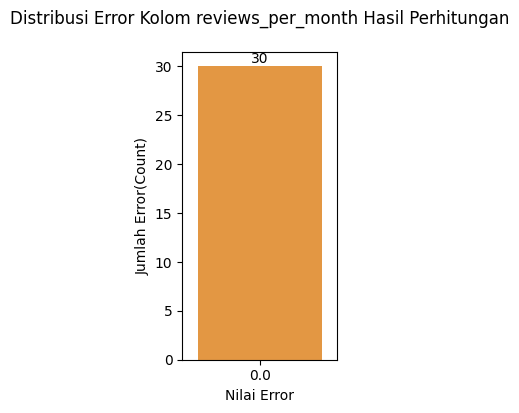

In [109]:
plt.figure(figsize=(2,4))
labely = [i for i in range(30)]
ax = sns.barplot(
    data=df_sampling_final,
    x='reviews_per_month_error',
    y=labely,
    estimator=len,
    palette='YlOrBr'
)
plt.title('Distribusi Error Kolom reviews_per_month Hasil Perhitungan', pad=20)
plt.xlabel('Nilai Error', size=10)
plt.ylabel('Jumlah Error(Count)', size=10)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Dari tabel dan hasil plot terlihat bahwa keseluruhan nilai error sudah bernilai 0.

Dari hasil perhitungan diatas didapatkan penjelasan dari kolom reviews_per_month yang paling sesuai dengan nilai aktual adalah sebagaimana berikut :

- reviews_per_month = Rata-rata review per bulan dihitung semenjak tempat sewa pertama kali di listing.

#### **Handle Missing Values**

Dalam melakukan handle missing values perlu untuk melihat kolom-kolom mana saja yang memiliki missing values.

In [110]:
df.isna().sum()

name                    8
host_id                 0
host_name               1
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
number_of_reviews       0
last_review          5790
reviews_per_month    5790
dtype: int64

Terlihat bahwa kolom-kolom yang memiliki missing values adalah kolom 'name', 'host_name', 'last_review', dan 'reviews_per_month'.

1. Kolom name

In [111]:
df[df['name'].isna()]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month
439,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,0,NaT,NaN
544,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,0,NaT,NaN
572,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,0,NaT,NaN
669,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,0,NaT,NaN
1030,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,0,NaT,NaN
1282,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,6,2017-05-13,0.07
1594,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,0,NaT,NaN
2075,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,2,2017-12-11,0.03


Kolom name berisikan NaN mengindikasikan tuan rumah tidak memberikan judul ketika tempat sewa tersebut di listing pada Airbnb, jadi untuk melakukan handle missing value pada kolom name bisa dengan mengisikan masing-masing baris dengan 'Tanpa Judul'.

In [112]:
df['name'][439] = 'Tanpa Judul 1'
df['name'][544] = 'Tanpa Judul 2'
df['name'][572] = 'Tanpa Judul 3'
df['name'][669] = 'Tanpa Judul 4'
df['name'][1030] = 'Tanpa Judul 5'
df['name'][1282] = 'Tanpa Judul 6'
df['name'][1594] = 'Tanpa Judul 7'
df['name'][2075] = 'Tanpa Judul 8'


In [113]:
df['name'].isna().sum()

0

Terlihat bahwa sudah tidak ada missing values pada kolom name.

2. Kolom host_name

In [114]:
df[df['host_name'].isna()]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month
3571,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,1,2017-07-29,0.02


Untuk mencari tahu host_name yang tepat, kita bisa mencoba mencari tahu dari data yang lain yang menggunakan host_id yang sama.

In [115]:
df[df['host_id']==137488762]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month
3571,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,1,2017-07-29,0.02


Karena tidak ada host_id yang sama, dan karena data yang memiliki missing values host_name hanya 1, lebih baik kita drop data tersebut.

In [116]:
df =  df.drop(3571).reset_index(drop=True)

In [117]:
df['host_name'].isna().sum()

0

Terlihat bahwa sudah tidak ada missing values pada kolom host_name.

3. Kolom last_review dan Kolom reviews_per_month

In [118]:
df[df['last_review'].isna()][['number_of_reviews', 'last_review', 'reviews_per_month']]

,number_of_reviews,last_review,reviews_per_month
1,0,NaT,NaN
2,0,NaT,NaN
4,0,NaT,NaN
7,0,NaT,NaN
14,0,NaT,NaN
...,...,...,...
15848,0,NaT,NaN
15849,0,NaT,NaN
15850,0,NaT,NaN
15851,0,NaT,NaN


Dari kolom diatas terlihat sebuah pola bahwa data yang kolom last_review dan reviews_per_month nya NaN adalah data yang tidak memiliki reviews(kolom number_of_reviews bernilai 0), sehingga karena tidak ada yang melakukan review otomatis kolom last_review bernilai NaT(Not a Time), untuk kolom last_review bisa dibiarkan bernilai NaT, sedangkan kolom reviews_per_month bisa kita isi dengan nilai 0.

In [119]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [120]:
df['reviews_per_month'].isna().sum()

0

Terlihat bahwa sudah tidak ada missing values pada kolom reviews_per_month.

In [121]:
df.isna().sum()

name                    0
host_id                 0
host_name               0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
number_of_reviews       0
last_review          5790
reviews_per_month       0
dtype: int64

Sedangkan pada keseluruhan kolom hanya kolom last_review yang missing values nya dibiarkan (karena memang belum ada seseorang yang melakukan review sehingga wajar data tersebut tidak memiliki informasi tanggal review).

#### **Handle Duplicate**

Pertama kita perlu menampilkan data-data yang duplikat.

In [122]:
df[df.duplicated(keep=False)]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month
5889,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,0,NaT,0.0
5975,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,0,NaT,0.0
8788,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,0,NaT,0.0
8789,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,0,NaT,0.0
15119,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,0,NaT,0.0
15120,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,0,NaT,0.0
15182,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,0,NaT,0.0
15185,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,0,NaT,0.0
15189,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,0,NaT,0.0
15190,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,0,NaT,0.0


Untuk melakukan handle duplicate, bisa menggunakan bantuan fungsi .drop_duplicates().

In [123]:
df = df.drop_duplicates()

In [124]:
df.duplicated(keep=False).sum()

0

Selain handle duplikat secara keseluruhan, kita perlu melakukan handle duplikat berdasarkan kolom yang potensial memiliki duplikat, dari keseluruhan kolom, kolom name yang paling potensial memiliki duplikat, seseorang sangat mungkin melakukan listing tempat yang sama dengan judul yang sama berkali-kali.

In [125]:
df[df['name'].duplicated(keep=False)]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month
272,Spacious two Bedroom Apartment,5469970,Yair,Suanluang,13.723760,100.618040,Entire home/apt,1974,6,2019-02-04,0.06
288,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.736160,100.572240,Entire home/apt,9999,46,2019-02-26,0.43
294,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.736100,100.570400,Entire home/apt,9999,25,2022-12-07,0.24
310,Near Suvarnabhumi Airport,8362130,Luckana,Lat Krabang,13.719440,100.731280,Entire home/apt,1316,63,2020-02-28,0.57
317,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.737570,100.569940,Entire home/apt,9999,24,2022-12-22,0.24
...,...,...,...,...,...,...,...,...,...,...,...
15847,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.752904,100.540381,Private room,1400,0,NaT,0.00
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,0,NaT,0.00
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,0,NaT,0.00
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,0,NaT,0.00


In [126]:
df = df.drop_duplicates(subset='name')

In [127]:
df['name'].duplicated(keep=False).sum()

0

In [128]:
df.duplicated(keep=False).sum()

0

Terlihat bahwa data sudah tidak ada yang duplikat baik dari keseluruhan, maupun hanya dari kolom-kolom yang berpotensial memiliki duplikat.

#### **Add New Columns**

Kemudian kita perlu menambahkan kolom-kolom baru yang sekiranya akan diperlukan untuk analisis data.

Kolom yang akan kita gunakan untuk menambahkan kolom baru adalah kolom price dan kolom reviews_per_month, oleh karena itu perlu untuk menguji distribusi dari kedua kolom tersebut agar kita dapat menentukan apakah menggunakan median atau menggunakan mean sebagai Central Tendency dalam mengolah kedua kolom tersebut untuk menghasilkan kolom baru.

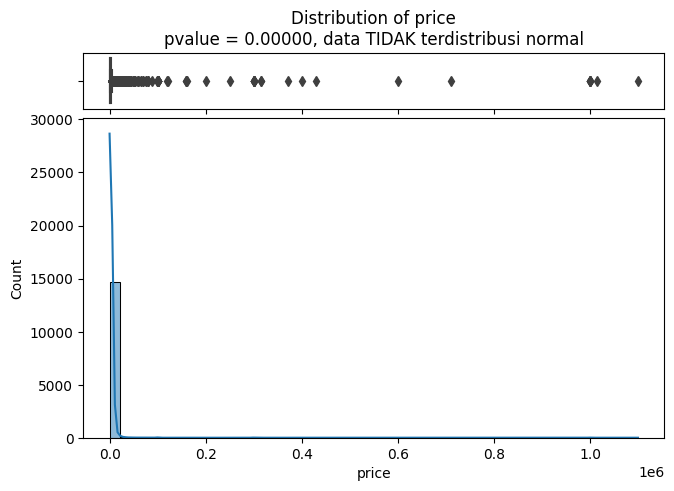

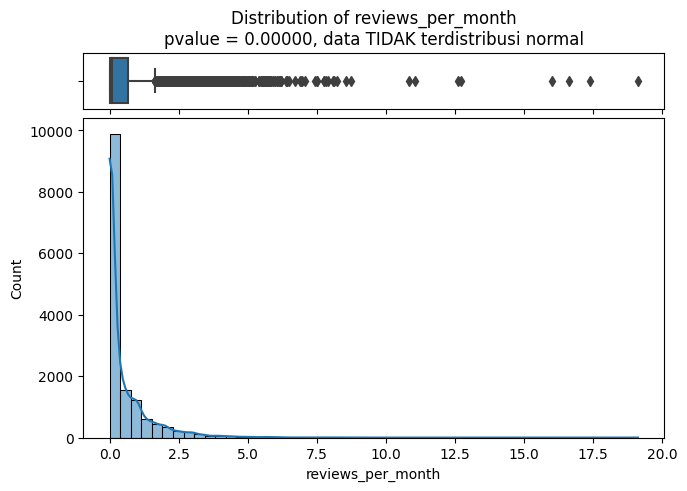

In [129]:
Kolom = ['price', 'reviews_per_month']
for kolom in Kolom:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom])

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, kde=True, bins=50)

    plt.show()

Karena kedua kolom sama-sama tidak terdistribusi normal maka kita akan menggunakan median sebagai Central Tendency dalam mengolah kedua kolom tersebut untuk menghasilkan kolom baru.

1. Kolom Area Distrik

Kolom ini berfungsi untuk membagi beberapa distrik yang berada pada kolom neighbourhood	menjadi beberapa grup area dari distrik yang terdiri dari Central Bangkok, South Bangkok, North Bangkok, South Thonburi, North Thonburi, dan East Bangkok. Pengelompokkan didapatkan dengan mencocokkan pembagian area yang ada pada gambar dibawah dengan daftar nama distrik yang ada pada [link berikut](https://id.wikipedia.org/wiki/Daftar_distrik_Bangkok).

In [130]:
display(Image(url='https://www.researchgate.net/publication/358916974/figure/fig1/AS:11431281094545158@1667486480529/Map-of-Bangkok-Thailand-indicating-the-location-of-the-investigated-districts-as-well.png'),
        Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Khet_Bangkok.svg/1280px-Khet_Bangkok.svg.png'))

In [131]:
def pembagian_distrik(x):
    if x in ['Phra Nakhon', 'Samphanthawong', 'Pom Prap Sattru Phai', 'Dusit', 'Ratchathewi', 'Phaya Thai', 'Din Daeng', 'Huai Khwang', 'Wang Thong Lang'] :
        return 'Central Bangkok'
    elif x in ['Bang Kho laen', 'Yan na wa', 'Sathon', 'Bang Rak', 'Parthum Wan', 'Khlong Toei', 'Suanluang', 'Phra Khanong', 'Bang Na', 'Vadhana'] :
        return 'South Bangkok'
    elif x in ['Bang Sue', 'Chatu Chak', 'Lat Phrao', 'Lak Si', 'Sai Mai', 'Don Mueang', 'Bang Khen'] :
        return 'North Bangkok'
    elif x in ['Nong Khaem', 'Bang Khae', 'Phasi Charoen', 'Bang Bon', 'Bang Khun thain', 'Thung khru', 'Rat Burana'] :
        return 'South Thonburi'
    elif x in ['Thawi Watthana', 'Taling Chan', 'Bangkok Noi', 'Bang Phlat', 'Bangkok Yai', 'Thon buri', 'Khlong San', 'Chom Thong'] :
        return 'North Thonburi'
    elif x in ['Khlong Sam Wa', 'Nong Chok', 'Min Buri', 'Lat Krabang', 'Khan Na Yao', 'Bueng Kum', 'Saphan Sung', 'Pra Wet', 'Bang Kapi'] :
        return 'East Bangkok'
    else:
        return x

In [132]:
df['grup_distrik'] = df['neighbourhood'].apply(pembagian_distrik)
df[['name', 'host_name', 'neighbourhood', 'grup_distrik']]

,name,host_name,neighbourhood,grup_distrik
0,Nice room with superb city view,Nuttee,Ratchathewi,Central Bangkok
1,"Easy going landlord,easy place",Emy,Bang Na,South Bangkok
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,East Bangkok
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Central Bangkok
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,East Bangkok
...,...,...,...,...
15837,Comfortable Stay in Pratunam,Saruta,Ratchathewi,Central Bangkok
15838,Ratchada Condo next To MRT,Alex,Huai Khwang,Central Bangkok
15839,Sukhumvit Condo Next to BTS,Alex,Bang Na,South Bangkok
15841,1 Bed for 1 person Close to Chatuchak market BTS,Chutinun,Chatu Chak,North Bangkok


2. Kolom Pembagian Median Harga(price) Berdasarkan Distrik(neighbourhood) dan Jenis Tempat Sewa(room_type)

Kolom ini berisikan penetapan nilai median harga(price) yang akan digunakan untuk masing-masing baris berdasarkan dari hasil median harga(price) setelah dikelompokkan berdasarkan distrik(neighbourhood) dan jenis tempat sewa(room_type), kolom ini nantinya akan berguna untuk mengelompokkan label harga sewa apakah 'mahal' ataupun 'murah' berdasarkan median harga(price) nya.

In [133]:
df['pembagian_median_price'] = 0

In [134]:
dflistmedian = df.groupby(['neighbourhood','room_type'])[['price']].median()
dflistmedian

price
neighbourhood   room_type              
Bang Bon        Entire home/apt  1600.0
                Private room      900.0
Bang Kapi       Entire home/apt   900.0
                Hotel room        600.0
                Private room      990.0
...                                 ...
Wang Thong Lang Shared room      1600.0
Yan na wa       Entire home/apt  1647.0
                Hotel room       7943.0
                Private room     1090.0
                Shared room      1135.0

[168 rows x 1 columns]

In [135]:
for i in df['neighbourhood'].unique():
    for j in df['room_type'].unique():
        for k in df[(df['neighbourhood']==i) & (df['room_type']==j)]['pembagian_median_price'].index:
            df['pembagian_median_price'][k] = dflistmedian.loc[i, j]['price']

In [136]:
df[['name', 'host_name', 'neighbourhood', 'grup_distrik', 'price', 'pembagian_median_price']]

,name,host_name,neighbourhood,grup_distrik,price,pembagian_median_price
0,Nice room with superb city view,Nuttee,Ratchathewi,Central Bangkok,1905,1699.0
1,"Easy going landlord,easy place",Emy,Bang Na,South Bangkok,1316,1150.0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,East Bangkok,800,990.0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Central Bangkok,1286,1000.0
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,East Bangkok,1905,990.0
...,...,...,...,...,...,...
15837,Comfortable Stay in Pratunam,Saruta,Ratchathewi,Central Bangkok,640,1421.5
15838,Ratchada Condo next To MRT,Alex,Huai Khwang,Central Bangkok,2100,1422.0
15839,Sukhumvit Condo Next to BTS,Alex,Bang Na,South Bangkok,1400,970.5
15841,1 Bed for 1 person Close to Chatuchak market BTS,Chutinun,Chatu Chak,North Bangkok,499,1101.5


3. Kolom Pengelompokkan Harga

Kolom ini mengelompokkan tempat sewa apakah 'murah' atau 'mahal' berdasarkan hasil median price data setelah dikelompokkan berdasarkan distrik(neighbourhood) dan jenis tempat sewa(room_type). apabila kolom price > kolom pembagian_median_price maka akan dilabeli 'mahal', dan akan dilabeli 'murah' apabila sebaliknya.

In [137]:
df['label_harga'] = 0

In [138]:
list_index = df['pembagian_median_price'].index
for i in list_index:
    if df['price'][i] > df['pembagian_median_price'][i]:
        df['label_harga'][i] = 'Mahal'
    else :
        df['label_harga'][i] = 'Murah'

In [139]:
df[['name', 'host_name', 'neighbourhood', 'grup_distrik', 'price', 'pembagian_median_price', 'label_harga']]

,name,host_name,neighbourhood,grup_distrik,price,pembagian_median_price,label_harga
0,Nice room with superb city view,Nuttee,Ratchathewi,Central Bangkok,1905,1699.0,Mahal
1,"Easy going landlord,easy place",Emy,Bang Na,South Bangkok,1316,1150.0,Mahal
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,East Bangkok,800,990.0,Murah
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Central Bangkok,1286,1000.0,Mahal
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,East Bangkok,1905,990.0,Mahal
...,...,...,...,...,...,...,...
15837,Comfortable Stay in Pratunam,Saruta,Ratchathewi,Central Bangkok,640,1421.5,Murah
15838,Ratchada Condo next To MRT,Alex,Huai Khwang,Central Bangkok,2100,1422.0,Mahal
15839,Sukhumvit Condo Next to BTS,Alex,Bang Na,South Bangkok,1400,970.5,Mahal
15841,1 Bed for 1 person Close to Chatuchak market BTS,Chutinun,Chatu Chak,North Bangkok,499,1101.5,Murah


4. Kolom Pembagian Median Review per Bulan(reviews_per_month) Berdasarkan Distrik(neighbourhood) dan Jenis Tempat Sewa(room_type)

Kolom ini berisikan penetapan nilai median review per bulan(reviews_per_month) yang akan digunakan untuk masing-masing baris berdasarkan dari hasil median review per bulan(reviews_per_month) setelah dikelompokkan berdasarkan distrik(neighbourhood) dan jenis tempat sewa(room_type), kolom ini nantinya akan berguna untuk mengelompokkan label listing apakah 'cukup terkenal' atau 'tidak terkenal' berdasarkan median reviews_per_month nya.

In [140]:
df['pembagian_median_revmonth'] = 0

In [141]:
dfmedianrvw = df.groupby(['neighbourhood','room_type'])[['reviews_per_month']].median()
dfmedianrvw

reviews_per_month
neighbourhood   room_type                         
Bang Bon        Entire home/apt              0.015
                Private room                 0.000
Bang Kapi       Entire home/apt              0.030
                Hotel room                   0.570
                Private room                 0.000
...                                            ...
Wang Thong Lang Shared room                  0.000
Yan na wa       Entire home/apt              0.020
                Hotel room                   0.025
                Private room                 0.000
                Shared room                  0.000

[168 rows x 1 columns]

In [142]:
for i in df['neighbourhood'].unique():
    for j in df['room_type'].unique():
        for k in df[(df['neighbourhood']==i) & (df['room_type']==j)]['pembagian_median_revmonth'].index:
            df['pembagian_median_revmonth'][k] = dfmedianrvw.loc[i, j]['reviews_per_month']

In [143]:
df[['name', 'host_name', 'neighbourhood', 'grup_distrik', 'reviews_per_month', 'pembagian_median_revmonth']]

,name,host_name,neighbourhood,grup_distrik,reviews_per_month,pembagian_median_revmonth
0,Nice room with superb city view,Nuttee,Ratchathewi,Central Bangkok,0.50,0.31
1,"Easy going landlord,easy place",Emy,Bang Na,South Bangkok,0.00,0.00
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,East Bangkok,0.00,0.00
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Central Bangkok,0.03,0.02
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,East Bangkok,0.00,0.00
...,...,...,...,...,...,...
15837,Comfortable Stay in Pratunam,Saruta,Ratchathewi,Central Bangkok,0.00,0.05
15838,Ratchada Condo next To MRT,Alex,Huai Khwang,Central Bangkok,0.00,0.22
15839,Sukhumvit Condo Next to BTS,Alex,Bang Na,South Bangkok,0.00,0.22
15841,1 Bed for 1 person Close to Chatuchak market BTS,Chutinun,Chatu Chak,North Bangkok,0.00,0.00


5. Kolom Pengelompokkan Review per Bulan

Kolom ini mengelompokkan tempat sewa apakah 'Cukup Dikenal' atau 'Kurang Dikenal' berdasarkan hasil median reviews_per_month data setelah dikelompokkan berdasarkan distrik(neighbourhood) dan jenis tempat sewa(room_type). apabila kolom reviews_per_month > kolom pembagian_median_revmonth maka akan dilabeli 'Cukup Dikenal', dan akan dilabeli 'Kurang Dikenal' apabila sebaliknya.

In [144]:
df['label_review'] = 0

In [145]:
list_index = df['pembagian_median_revmonth'].index
for i in list_index:
    if df['reviews_per_month'][i] > df['pembagian_median_revmonth'][i]:
        df['label_review'][i] = 'Cukup Dikenal'
    else :
        df['label_review'][i] = 'Kurang Dikenal'

In [146]:
df[['name', 'host_name', 'neighbourhood', 'grup_distrik', 'reviews_per_month', 'pembagian_median_revmonth', 'label_review']]

,name,host_name,neighbourhood,grup_distrik,reviews_per_month,pembagian_median_revmonth,label_review
0,Nice room with superb city view,Nuttee,Ratchathewi,Central Bangkok,0.50,0.31,Cukup Dikenal
1,"Easy going landlord,easy place",Emy,Bang Na,South Bangkok,0.00,0.00,Kurang Dikenal
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,East Bangkok,0.00,0.00,Kurang Dikenal
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Central Bangkok,0.03,0.02,Cukup Dikenal
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,East Bangkok,0.00,0.00,Kurang Dikenal
...,...,...,...,...,...,...,...
15837,Comfortable Stay in Pratunam,Saruta,Ratchathewi,Central Bangkok,0.00,0.05,Kurang Dikenal
15838,Ratchada Condo next To MRT,Alex,Huai Khwang,Central Bangkok,0.00,0.22,Kurang Dikenal
15839,Sukhumvit Condo Next to BTS,Alex,Bang Na,South Bangkok,0.00,0.22,Kurang Dikenal
15841,1 Bed for 1 person Close to Chatuchak market BTS,Chutinun,Chatu Chak,North Bangkok,0.00,0.00,Kurang Dikenal


In [147]:
# Mereset index dataset yang sudah bersih
df = df.reset_index(drop=True)

## **Data Summary**

#### **New Data**

Setelah selesai melakukan cleaning data, dari mulai melakukan drop kolom yang tidak digunakan untuk analisis, mengubah datatype dari kolom, mencari penjelasan kolom yang tidak tertera di dokumentasi, menghandle missing value, menghandle duplikat, hingga menambahkan kolom baru, didapatkan dataset yang sudah bersih seperti berikut.

In [148]:
display(df.head(),df.tail())

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month,grup_distrik,pembagian_median_price,label_harga,pembagian_median_revmonth,label_review
0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,65,2020-01-06,0.50,Central Bangkok,1699.0,Mahal,0.31,Cukup Dikenal
1,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,0,NaT,0.00,South Bangkok,1150.0,Mahal,0.00,Kurang Dikenal
2,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,0,NaT,0.00,East Bangkok,990.0,Murah,0.00,Kurang Dikenal
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,2,2022-04-01,0.03,Central Bangkok,1000.0,Mahal,0.02,Cukup Dikenal
4,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,0,NaT,0.00,East Bangkok,990.0,Mahal,0.00,Kurang Dikenal


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month,grup_distrik,pembagian_median_price,label_harga,pembagian_median_revmonth,label_review
14796,Comfortable Stay in Pratunam,424281953,Saruta,Ratchathewi,13.755000,100.538530,Private room,640,0,NaT,0.0,Central Bangkok,1421.5,Murah,0.05,Kurang Dikenal
14797,Ratchada Condo next To MRT,34432625,Alex,Huai Khwang,13.763732,100.569455,Entire home/apt,2100,0,NaT,0.0,Central Bangkok,1422.0,Mahal,0.22,Kurang Dikenal
14798,Sukhumvit Condo Next to BTS,34432625,Alex,Bang Na,13.665395,100.603951,Entire home/apt,1400,0,NaT,0.0,South Bangkok,970.5,Mahal,0.22,Kurang Dikenal
14799,1 Bed for 1 person Close to Chatuchak market BTS,153568635,Chutinun,Chatu Chak,13.797467,100.560550,Private room,499,0,NaT,0.0,North Bangkok,1101.5,Murah,0.00,Kurang Dikenal
14800,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,0,NaT,0.0,East Bangkok,900.0,Mahal,0.00,Kurang Dikenal


Penjelasan masing-masing kolom pada dataset yang sudah bersih tersebut adalah sebagaimana berikut :
1. name = judul/nama yang dicantumkan pada saat melakukan listing tempat sewa di Bangkok pada aplikasi Airbnb.
2. host_id = id unik yang didapatkan untuk setiap tuan rumah yang melakukan listing di aplikasi Airbnb.
3. host_name = id unik dari setiap pemilik tempat sewa(Tuan Rumah).
4. neighbourhood = nama distrik tempat sewa berdasarkan latitude dan longitude.
5. latitude = posisi tempat sewa berdasarkan garis lintang.
6. longitude = posisi tempat sewa berdasarkan garis bujur.
7. room_type = tipe tempat sewa, terbagi menjadi 4 jenis :
    
    - Entire place/Apt : Entire place merupakan tempat terbaik apabila penyewa mencari rumah yang berlokasi jauh dari rumah yang lain, dimana penyewa dapat memiliki ruang sendiri. Tempat sewa ini biasanya sudah termasuk dengan ruang tidur, kamar mandi, dapur, dan pintu masuk khusus yang terpisah. Perlu dicatat bahwa pada deskripsi tempat sewa jenis ini perlu menjelaskan informasi mengenai apakah Tuan Rumah menetap pada tempat sewa atau tidak (misalnya : 'Tuan Rumah menempati lantai pertama rumah'), serta menjelaskan lebih lanjut mengenai detail tempat sewa.

    - Hotel room : Hotel Room sedikit mirip dengan Entire Place, keseluruhan ruangan tempat sewa ini dikelola oleh satu perusahaan.
    
    - Private rooms : Private room merupakan tempat terbaik apabila penyewa yang lebih menyukai sedikit privasi, namun masih menghargai koneksi lokal dengan tetangga. Saat penyewa memilih Private room, penyewa akan mendapatkan kamar tidur pribadi dan mungkin untuk ruangan lain akan berbagi dengan orang lain. Penyewa mungkin perlu berjalan kaki melalui ruangan yang mungkin ditempati oleh tuan rumah ataupun penyewa lain untuk sampai ke kamar.

    - Shared rooms : Shared rooms diperuntukkan jika penyewa tidak keberatan berbagi tempat dengan orang lain. Saat penyewa memesan Shared roooms, penyewa akan tidur di ruang yang dibagikan bersama dengan orang lain. Shared rooms banyak diminati oleh kalangan wisatawan yang mencari teman baru dan tempat menetap dengan harga terjangkau.
    
8. price = Harga harian berdasarkan mata uang lokal (Baht).
9. number_of_reviews = Banyaknya total reviews dari penyewa pada tempat sewa tersebut.
10. last_review = Histori tanggal review terakhir dari penyewa untuk tempat sewa tersebut pada saat dataset dibuat.
11. reviews_per_month = Rata-rata review per bulan dihitung semenjak data pertama kali di listing (Hasil asumsi).
12. grup_distrik = Area yang membagi 50 distrik menjadi 6 grup besar, yaitu Central Bangkok, South Bangkok, North Bangkok, South Thonburi, North Thonburi, dan East Bangkok.
13. pembagian_median_price = Kolom yang berisi penetapan nilai median harga(price) pada masing-masing baris dengan menggunakan hasil median harga(price) setelah dikelompokkan berdasarkan distrik(neighbourhood) dan jenis tempat sewanya(room_type).
14. label_harga = Kolom berisi hasil pengelompokkan tempat sewa apakah 'murah' atau 'mahal' berdasarkan hasil median price data setelah dikelompokkan berdasarkan distrik(neighbourhood) dan jenis tempat sewa(room_type). apabila kolom price > kolom pembagian_median_price maka akan dilabeli 'mahal', dan akan dilabeli 'murah' apabila sebaliknya.
15. pembagian_median_revmonth = Kolom yang berisi penetapan nilai median review per bulan(reviews_per_month) pada masing-masing baris dengan menggunakan hasil median review per bulan(reviews_per_month) setelah dikelompokkan berdasarkan distrik(neighbourhood) dan jenis tempat sewanya(room_type).
16. label_review = Kolom berisi hasil pengelompokkan tempat sewa apakah 'Cukup Dikenal' atau 'Kurang Dikenal' berdasarkan hasil median reviews_per_month data setelah dikelompokkan berdasarkan distrik(neighbourhood) dan jenis tempat sewa(room_type). apabila kolom reviews_per_month > kolom pembagian_median_revmonth maka akan dilabeli 'Cukup Dikenal', dan akan dilabeli 'Kurang Dikenal' apabila sebaliknya.


#### **dataType, missing values, unique**

In [149]:
listKosong = []
for col in df.columns :
    listKosong.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listKosong)
print(df.shape)
dfDesc

(14801, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,name,object,0,14801,"[Ekamai 12, Near Donki shop, 11Fl, quite room,..."
1,host_id,int64,0,6623,"[7208534, 50661571]"
2,host_name,object,0,5290,"[Ba-Wornpak (TAE), Muay]"
3,neighbourhood,object,0,50,"[Phra Khanong, Vadhana]"
4,latitude,float64,0,9243,"[13.91242, 13.75005]"
5,longitude,float64,0,9857,"[100.68579, 100.5263]"
6,room_type,object,0,4,"[Hotel room, Private room]"
7,price,int64,0,2975,"[776, 527]"
8,number_of_reviews,int64,0,297,"[156, 106]"
9,last_review,datetime64[ns],5395,1614,"[2016-03-08T00:00:00.000000000, 2021-04-04T00:..."


Tabel diatas menampilkan ringkasan informasi dari data yang sudah dibersihkan, dari sebelumnya 15854, sekarang menjadi 14801 data.

#### **Descriptive Statistics**

Berikut adalah ringkasan statistik dari kolom-kolom numerikal.

In [150]:
df.describe()

,host_id,latitude,longitude,price,number_of_reviews,last_review,reviews_per_month,pembagian_median_price,pembagian_median_revmonth
count,1.480100e+04,14801.000000,14801.000000,1.480100e+04,14801.000000,9406,14801.000000,14801.000000,14801.000000
mean,1.518652e+08,13.745221,100.560246,3.286171e+03,17.191001,2021-08-22 09:13:16.853072640,0.512557,1458.595771,0.197785
min,5.892000e+04,13.527300,100.329550,0.000000e+00,0.000000,2012-12-15 00:00:00,0.000000,313.000000,0.000000
25%,3.719060e+07,13.719940,100.529980,9.000000e+02,0.000000,2020-02-14 00:00:00,0.000000,1085.000000,0.020000
50%,1.167729e+08,13.738310,100.562040,1.400000e+03,2.000000,2022-10-22 00:00:00,0.080000,1422.000000,0.100000
75%,2.385993e+08,13.759650,100.585880,2.429000e+03,14.000000,2022-12-08 00:00:00,0.660000,1699.000000,0.410000
max,4.926659e+08,13.953540,100.923440,1.100000e+06,1224.000000,2022-12-28 00:00:00,19.130000,7943.000000,0.580000
std,1.323173e+08,0.043606,0.051712,2.582442e+04,41.676525,NaN,0.946198,516.311546,0.202034


Terlihat penyebaran data pada berbagai kolom 75% data nya berada di rentang nilai yang tidak terlalu jauh dengan nilai median nya, namun pada nilai max memiliki nilai yang cukup jauh, hal ini menunjukkan berbagai macam kolom cenderung right skewed. hanya kolom host_id, latitude, longitude, dan pembagian_median_revmonth yang tidak menunjukkan pola tersebut.

Berikut adalah ringkasan statistik dari kolom-kolom kategorikal.

In [151]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type,grup_distrik,label_harga,label_review
count,14801,14801,14801,14801,14801,14801,14801
unique,14801,5290,50,4,6,2,2
top,Nice room with superb city view,K,Vadhana,Entire home/apt,South Bangkok,Murah,Kurang Dikenal
freq,1,91,2018,8231,7528,7551,7850


Terlihat dari kolom 'name' tidak memiliki nilai modus karena semua datanya bersifat unik, sedangkan pada kolom host_name modus nya adalah K dengan frekuensi kemunculan sebanyak 91 kali, hal ini mengindikasikan K adalah tuan rumah yang paling banyak melakukan listing tempat sewa di Airbnb, modus pada kolom neighbourhood adalah Vadhana dengan frekuensi kemunculan sebanyak 2018 kali, hal ini mengindikasikan bahwa dari 50 distrik di Bangkok, tempat sewa di daerah Vadhana adalah tempat sewa yang paling banyak melakukan listing di Airbnb, kemudian pada kolom room_type terlihat modus nya adalah Entire home/apt dengan frekuensi kemunculan sebanyak 8231 kali, hal ini mengindikasikan dari ke 4 jenis tempat sewa, tempat sewa berjenis Entire home/apt yang paling banyak di sewakan di aplikasi Airbnb. Dari kolom grup distrik terlihat tempat sewa di area South Bangkok yang paling banyak melakukan listing di Airbnb dengan frekuensi kemunculan sebanyak 7528 kali, kemudian pada kolom label_harga, nilai yang paling sering muncul adalah label 'Murah' dengan selisih frekuensi kemunculan yang tidak berbeda jauh dengan label 'Mahal' (7551 berbanding 7250), begitu pula pada kolom label_review, nilai yang paling sering muncul adalah label 'Kurang Dikenal' dengan selisih frekuensi kemunculan yang tidak berbeda jauh dengan label 'Cukup Dikenal' (7850 berbanding 6951).

#### **Distribusi Data Kolom-Kolom Numerikal**

Kita perlu mencari distribusi data dari kolom-kolom numerikal untuk memutuskan menggunakan mean atau median sebagai nilai dari Central Tendency.

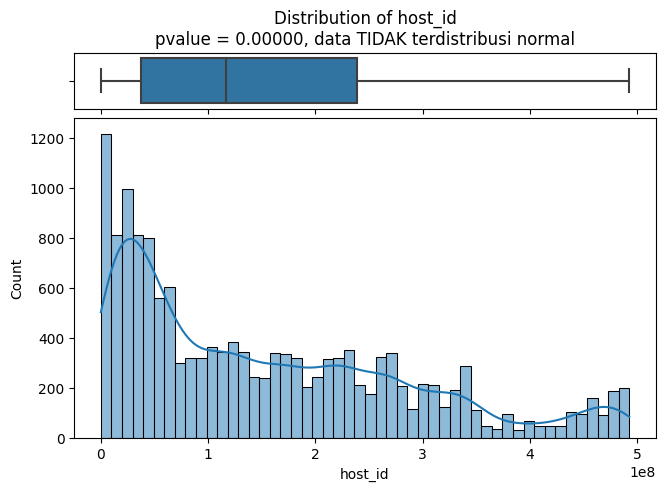

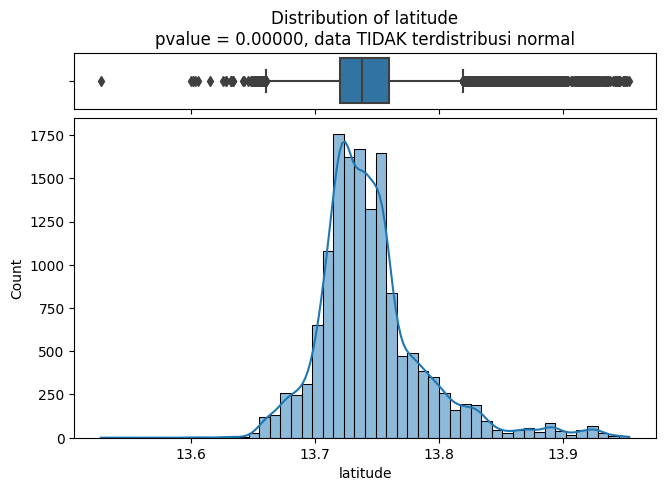

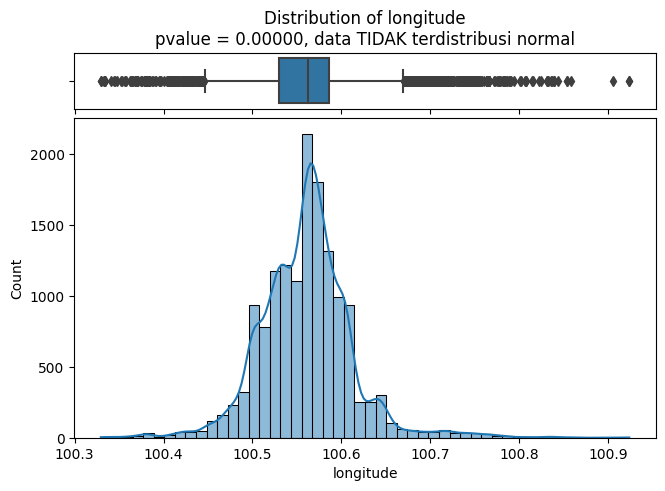

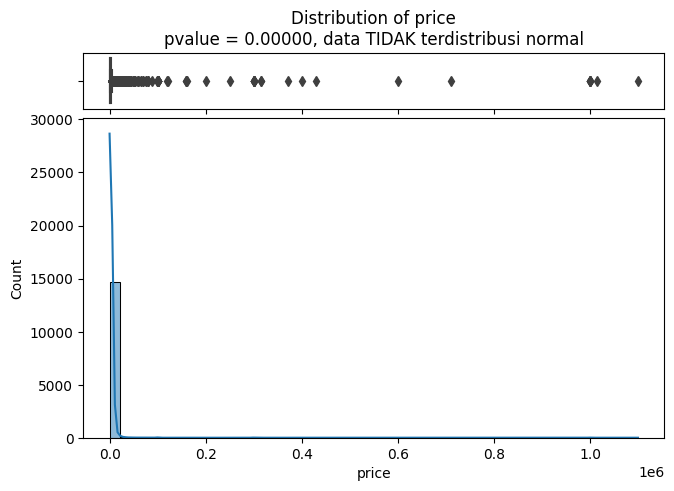

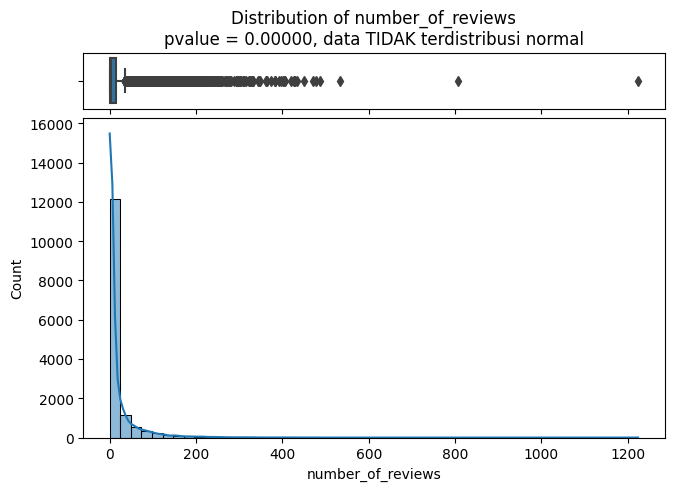

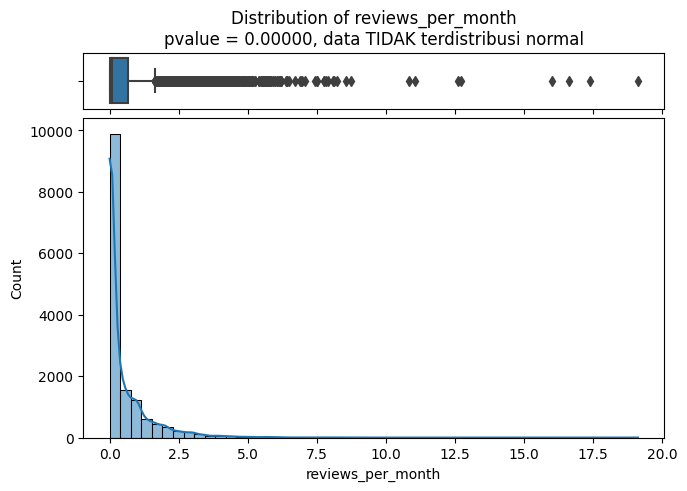

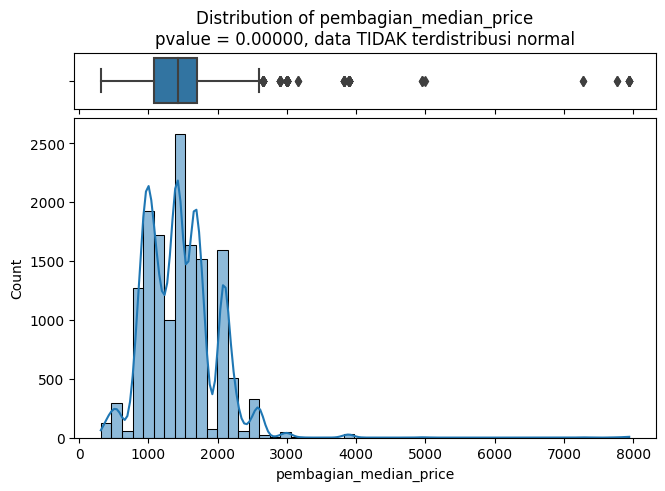

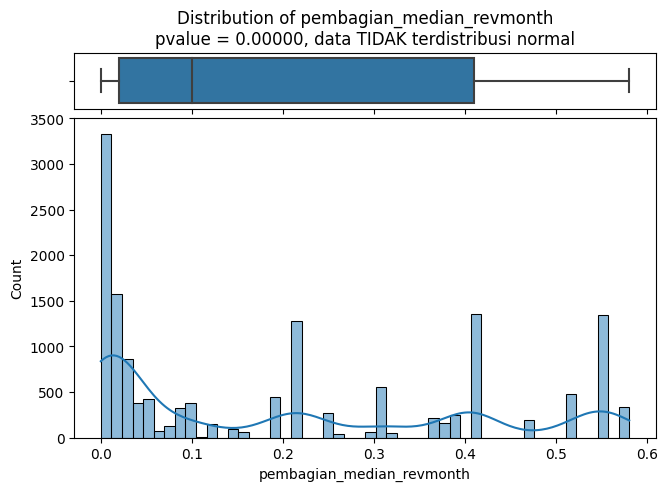

In [152]:
listKolom = ['host_id', 'latitude', 'longitude', 'price', 'number_of_reviews', 'reviews_per_month', 'pembagian_median_price', 'pembagian_median_revmonth']
for kolom in listKolom:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom])

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, kde=True, bins=50)

    plt.show()

In [153]:
listdistribusi = []
listpvalue = []
for i in listKolom :
    stat, pvalue = normaltest(df[i])
    if pvalue > 0.05 :
        listdistribusi.append('Asumsi data terdistribusi normal')
        listpvalue.append(pvalue)
    else :
        listdistribusi.append('Asumsi data TIDAK terdistribusi normal')
        listpvalue.append(pvalue)
listdistribusi
label=[i for i in range(8)]
dfdistribusi = pd.DataFrame(data=list(zip(listKolom, listpvalue, listdistribusi)), index=label).rename(columns={0: 'Nama Kolom', 1: 'Nilai pvalue', 2: 'Distribusi Kolom'})
dfdistribusi

,Nama Kolom,Nilai pvalue,Distribusi Kolom
0,host_id,2.384862e-301,Asumsi data TIDAK terdistribusi normal
1,latitude,0.000000e+00,Asumsi data TIDAK terdistribusi normal
2,longitude,0.000000e+00,Asumsi data TIDAK terdistribusi normal
3,price,0.000000e+00,Asumsi data TIDAK terdistribusi normal
4,number_of_reviews,0.000000e+00,Asumsi data TIDAK terdistribusi normal
5,reviews_per_month,0.000000e+00,Asumsi data TIDAK terdistribusi normal
6,pembagian_median_price,0.000000e+00,Asumsi data TIDAK terdistribusi normal
7,pembagian_median_revmonth,0.000000e+00,Asumsi data TIDAK terdistribusi normal


Dari hasil uji normalitas, terlihat keseluruhan data numerikal tidak terdistribusi normal, sehingga kita akan banyak menggunakan median sebagai nilai dari Central Tendency.

#### **Visualisasi Letak Geografis**

Text(0.5, 1.0, 'Visualisasi Letak Geografis Tempat Sewa')

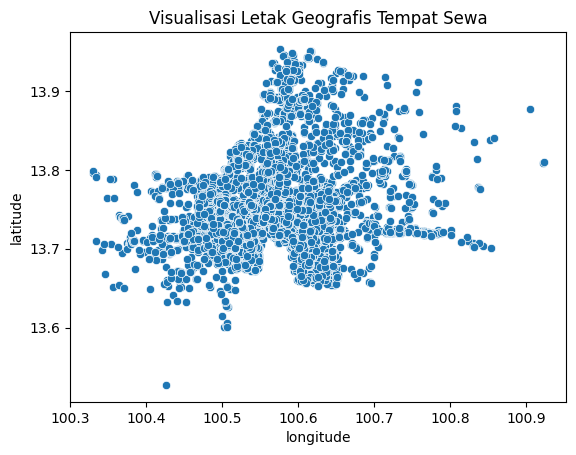

In [154]:
sns.scatterplot(data=df, x='longitude', y='latitude')
plt.title('Visualisasi Letak Geografis Tempat Sewa')

Dari hasil visualisasi letak geografis diatas dapat terlihat bahwa semakin mendekati pusat kota maka tempat sewa yang listing akan semakin banyak.

## **Data Analysis**

Sebelum melakukan analisis data, kita dapat menampilkan korelasi dari berbagai kolom numerikal untuk mengetahui hubungan dari masing-masing kolom numerikal.

In [155]:
df_corr = df[['host_id', 'latitude', 'longitude', 'price', 'number_of_reviews', 'reviews_per_month', 'pembagian_median_price', 'pembagian_median_revmonth']].corr()
df_corr

,host_id,latitude,longitude,price,number_of_reviews,reviews_per_month,pembagian_median_price,pembagian_median_revmonth
host_id,1.000000,0.054297,0.002621,-0.008763,-0.220615,-0.032900,-0.033881,-0.070609
latitude,0.054297,1.000000,0.069286,-0.007344,-0.021309,-0.043076,-0.169568,-0.195419
longitude,0.002621,0.069286,1.000000,-0.005362,-0.031830,-0.023669,-0.078564,-0.032651
price,-0.008763,-0.007344,-0.005362,1.000000,-0.004802,-0.011774,0.031631,0.017320
number_of_reviews,-0.220615,-0.021309,-0.031830,-0.004802,1.000000,0.583227,0.092391,0.209624
reviews_per_month,-0.032900,-0.043076,-0.023669,-0.011774,0.583227,1.000000,0.136795,0.294701
pembagian_median_price,-0.033881,-0.169568,-0.078564,0.031631,0.092391,0.136795,1.000000,0.412506
pembagian_median_revmonth,-0.070609,-0.195419,-0.032651,0.017320,0.209624,0.294701,0.412506,1.000000


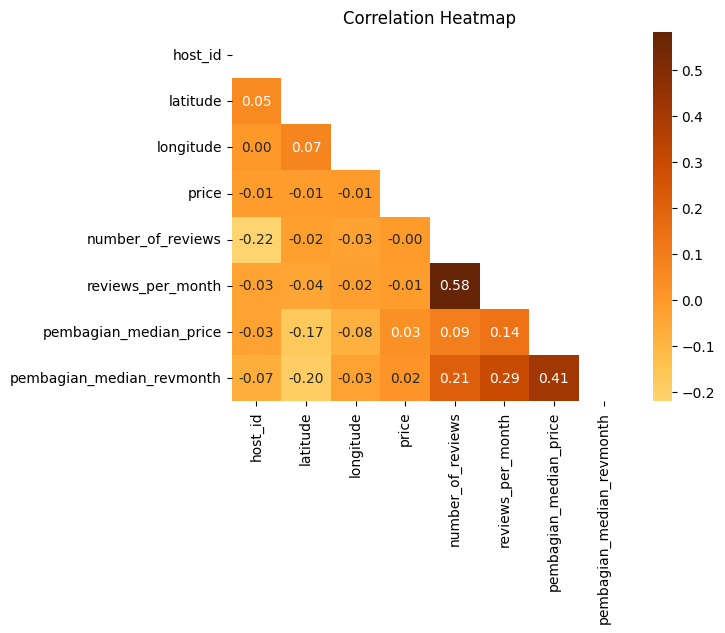

In [156]:
matriks = np.triu(df_corr)
sns.heatmap(data=df_corr, annot=True, cmap='YlOrBr', center=0, mask=matriks, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Terlihat dari seluruh kolom numerikal memiliki nilai korelasi yang lemah antara satu kolom dengan kolom lainnya, hanya antar kolom number_of_reviews dengan reviews_per_month, dan kolom pembagian_median_price dengan kolom pembagian_median_revmonth yang terlihat memiliki hubungan korelasi yang moderate dengan nilai korelasi berturur-turut sebesar 0.58, dan 0.41.

## Harga Sewa dan Label Harga Berdasarkan : `grup_distrik` dan `room_type`

Pertama-tama kita lihat secara umum harga sewa dan proporsi label harga berdasarkan grup_distrik.

In [157]:
dfbygrupdistrik = df.groupby(by='grup_distrik')[['price']].median().sort_values(by='price', ascending=False)
dfbygrupdistrik

,price
grup_distrik,
South Bangkok,1581.0
Central Bangkok,1421.0
North Thonburi,1200.0
North Bangkok,993.0
East Bangkok,990.0
South Thonburi,970.0


In [158]:
dfbylabelharga = df.groupby(['grup_distrik','label_harga'])[['price']].count().rename(columns={'price':'count'}).sort_values(by='count', ascending=False)
dfbylabelharga

count
grup_distrik    label_harga       
South Bangkok   Murah         3799
                Mahal         3729
Central Bangkok Murah         1919
                Mahal         1814
North Bangkok   Murah          650
                Mahal          615
North Thonburi  Murah          575
                Mahal          542
East Bangkok    Murah          424
                Mahal          383
South Thonburi  Murah          184
                Mahal          167

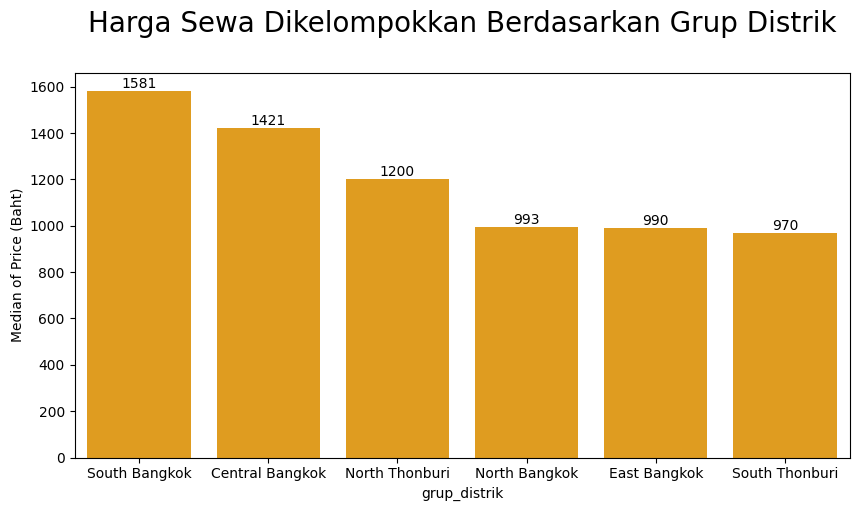

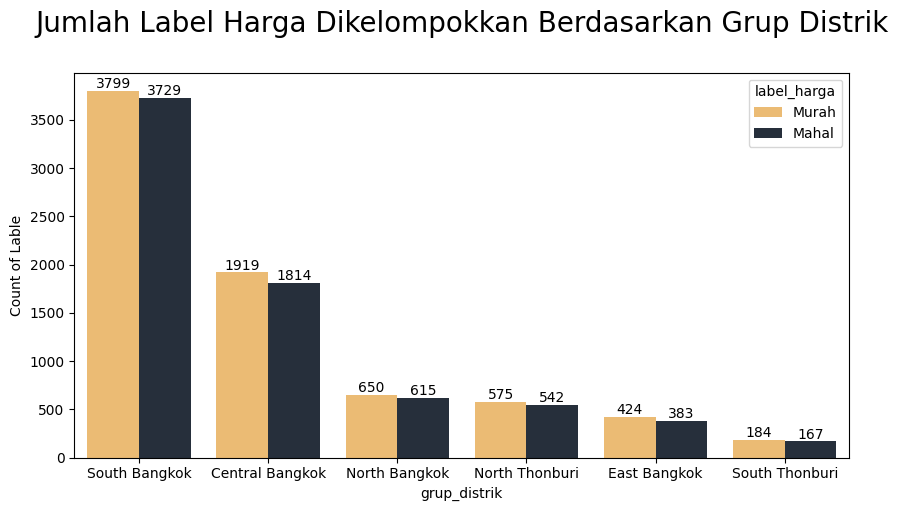

In [159]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbygrupdistrik.reset_index(),
    x='grup_distrik',
    y= 'price',
    color='orange'
)
plt.title('Harga Sewa Dikelompokkan Berdasarkan Grup Distrik\n', size=20)
plt.ylabel('Median of Price (Baht)')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelharga.reset_index(),
    x='grup_distrik',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_harga'
)
plt.title('Jumlah Label Harga Dikelompokkan Berdasarkan Grup Distrik\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Dari plot harga sewa berdasarkan grup distrik, dapat terlihat bahwa median harga tertinggi dari semua grup distrik didapatkan oleh Grup Distrik South Bangkok sebesar 1581 Baht disusul oleh Central Bangkok 1421 Baht, North Thonburi sebesar 1200 Baht, North Bangkok sebesar 993 Baht, East Bangkok sebesar 990 Baht, dan yang terakhir adalah South Thonburi sebesar 970 Baht.

Dari hasil plot label harga berdasarkan grup distrik terlihat bahwa tempat sewa di wilayah Grup Distrik South Bangkok paling banyak melakukan listing di aplikasi Airbnb dengan frekuensi banyaknya listing sebanyak 7528 kali, disusul oleh Central Bangkok sebanyak 3733 kali, North Bangkok sebanyak 1265 kali, North Thonburi sebanyak 1117 kali, East Bangkok sebanyak 807	kali, dan yang terakhir adalah South Thonburi sebanyak 351 kali.

Karena dari hasil plot label harga berdasarkan grup distrik proporsi banyaknya nilai antara label 'Murah' dan label 'Mahal' terlihat tidak berbeda jauh, kita dapat menguji nya dengan 2 sample z-test untuk membuktikan secara statistik apakah proporsi banyaknya kelompok 'Murah' lebih besar dari proporsi banyaknya kelompok 'Mahal' dari masing-masing Grup Distrik.

In [160]:
df_pivot = dfbylabelharga.reset_index().pivot_table(
    index = 'label_harga',
    columns = 'grup_distrik',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

grup_distrik,Central Bangkok,East Bangkok,North Bangkok,North Thonburi,South Bangkok,South Thonburi,total
label_harga,,,,,,,
Mahal,1814,383,615,542,3729,167,7250
Murah,1919,424,650,575,3799,184,7551
subtotal,3733,807,1265,1117,7528,351,14801


In [161]:
pd.options.display.max_colwidth=1000
grupdistrik = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    grupdistrik.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(6)]
dfztest = pd.DataFrame(data=list(zip(grupdistrik, pvalueztest, hasil)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Grup Distrik,Nilai pvalue,Hasil Test
0,Central Bangkok,0.290959,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Central Bangkok lebih besar dari proporsi jumlah kelompok 'Mahal' di Central Bangkok (Proporsinya TIDAK berbeda signifikan)
1,East Bangkok,0.186640,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di East Bangkok lebih besar dari proporsi jumlah kelompok 'Mahal' di East Bangkok (Proporsinya TIDAK berbeda signifikan)
2,North Bangkok,0.392531,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di North Bangkok lebih besar dari proporsi jumlah kelompok 'Mahal' di North Bangkok (Proporsinya TIDAK berbeda signifikan)
3,North Thonburi,0.374450,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di North Thonburi lebih besar dari proporsi jumlah kelompok 'Mahal' di North Thonburi (Proporsinya TIDAK berbeda signifikan)
4,South Bangkok,0.914106,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di South Bangkok lebih besar dari proporsi jumlah kelompok 'Mahal' di South Bangkok (Proporsinya TIDAK berbeda signifikan)
5,South Thonburi,0.297067,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di South Thonburi lebih besar dari proporsi jumlah kelompok 'Mahal' di South Thonburi (Proporsinya TIDAK berbeda signifikan)


Dari hasil uji 2 sample z-test, kita dapat menyimpulkan bahwa proporsi antara kelompok 'Murah' dan 'Mahal' berdasarkan tiap-tiap grup distrik, seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada grup distrik South Bangkok, Central Bangkok, North Bangkok, North Thonburi, East Bangkok, dan South Thonburi berturut turut sebesar 0.914106, 0.290959, 0.392531, 0.374450, 0.186640, dan 0.297067 .

Setelah itu kita lihat lebih dalam pada setiap grup distrik dengan menggelompokkan kembali berdasarkan room_type.

1.1 South Bangkok

In [162]:
dfsouthbangkok = df[df['grup_distrik']=='South Bangkok'].groupby(by='room_type')[['price']].median().sort_values(by='price', ascending=False)
dfsouthbangkok

,price
room_type,
Hotel room,1879.0
Entire home/apt,1682.0
Private room,1414.0
Shared room,489.5


In [163]:
dfbylabelpsouthbangkok = df[df['grup_distrik']=='South Bangkok'].groupby(['room_type','label_harga'])[['price']].count().rename(columns={'price':'count'}).sort_values(by='count', ascending=False)
dfbylabelpsouthbangkok

count
room_type       label_harga       
Entire home/apt Murah         2380
                Mahal         2359
Private room    Murah         1173
                Mahal         1149
Hotel room      Murah          164
                Mahal          155
Shared room     Murah           82
                Mahal           66

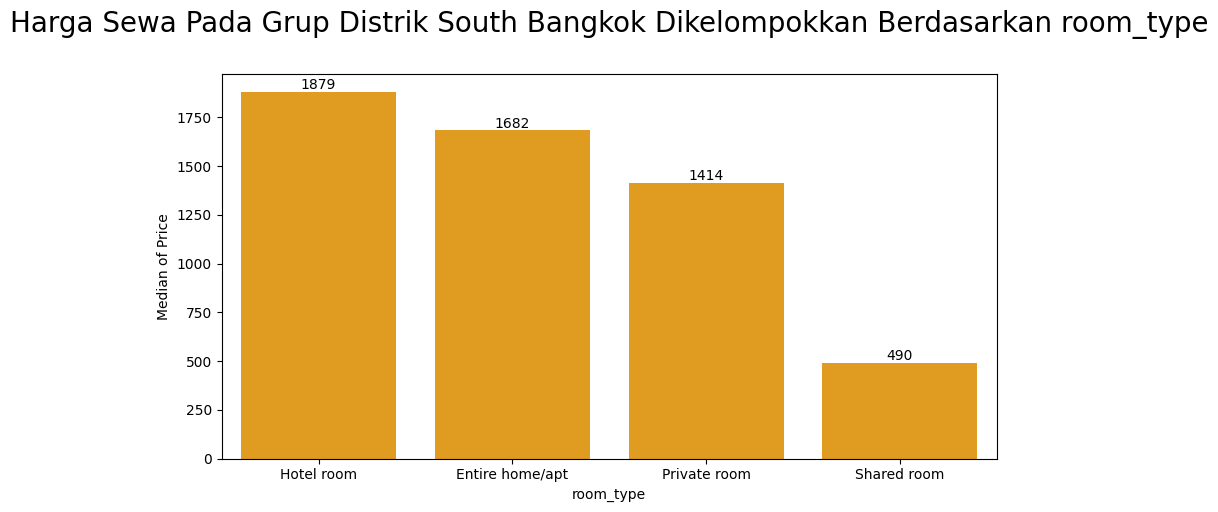

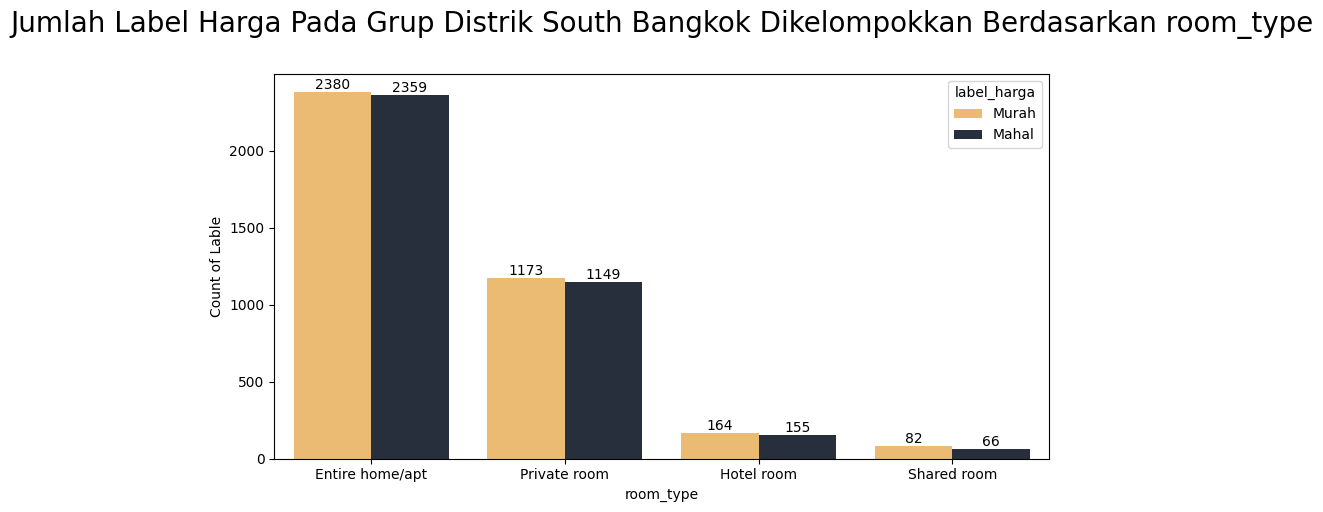

In [164]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfsouthbangkok.reset_index(),
    x='room_type',
    y= 'price',
    color='orange',
)
plt.title('Harga Sewa Pada Grup Distrik South Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Median of Price')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelpsouthbangkok.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_harga'
)
plt.title('Jumlah Label Harga Pada Grup Distrik South Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Dari plot harga sewa pada Grup Distrik South Bangkok dikelompokkan berdasarkan room_type, dapat terlihat bahwa median harga tertinggi dari semua jenis tempat sewa adalah Hotel room dengan median sebesar 1879 Baht, namun apabila dilihat dari jumlah listing ternyata Hotel room termasuk ke 2 paling sedikit dengan jumlah listing sebanyak 319 berbanding jauh dengan peringkat 1 nya yaitu Entire Home/apt dimana mencapai 4739 kali total listing, hal ini tentunya sebuah peluang dimana dengan saingan yang masih sedikit kita bisa memasang harga yang cukup tinggi. Untuk yang lainnya terlihat bahwa median harga untuk Entire home/apt sebesar 1682 diikuti oleh Private room sebesar 1414 dan yang terakhir adalah Shared room dengan median sebesar 490. Sedangkan jumlah listing pada Private room sebesar 2322 dan jumlah listing paling rendah jatuh kepada Shared room dengan jumlah banyaknya listing sebanyak 148 kali.

Karena dari hasil plot label harga pada Grup Distrik South Bangkok dikelompokkan berdasarkan room_type proporsi banyaknya nilai antara label 'Murah' dan label 'Mahal' terlihat tidak berbeda jauh, kita dapat menguji nya dengan 2 sample z-test untuk membuktikan secara statistik apakah proporsi banyaknya kelompok 'Murah' lebih besar dari proporsi banyaknya kelompok 'Mahal' dari masing-masing jenis tempat sewa.

In [165]:
df_pivot = dfbylabelpsouthbangkok.reset_index().pivot_table(
    index = 'label_harga',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_harga,,,,,
Mahal,2359,155,1149,66,3729
Murah,2380,164,1173,82,3799
subtotal,4739,319,2322,148,7528


In [166]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.709016,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Mahal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.364960,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Hotel room lebih besar dari proporsi jumlah kelompok 'Mahal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.476034,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Private room lebih besar dari proporsi jumlah kelompok 'Mahal' di Private room (Proporsinya TIDAK berbeda signifikan)
3,Shared room,0.112352,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Shared room lebih besar dari proporsi jumlah kelompok 'Mahal' di Shared room (Proporsinya TIDAK berbeda signifikan)


Dari hasil uji 2 sample z-test, kita dapat menyimpulkan bahwa proporsi antara kelompok 'Murah' dan 'Mahal' di Grup Distrik South Bangkok berdasarkan tiap-tiap jenis tempat sewa, seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.709016, 0.476034, 0.364960, 0.112352 .

1.2 Central Bangkok

In [167]:
dfcentralbangkok = df[df['grup_distrik']=='Central Bangkok'].groupby(by='room_type')[['price']].median().sort_values(by='price', ascending=False)
dfcentralbangkok

,price
room_type,
Entire home/apt,1531.5
Hotel room,1498.0
Private room,1300.0
Shared room,495.0


In [168]:
dfbylabelpcentralbangkok = df[df['grup_distrik']=='Central Bangkok'].groupby(['room_type','label_harga'])[['price']].count().rename(columns={'price':'count'}).sort_values(by='count', ascending=False)
dfbylabelpcentralbangkok

count
room_type       label_harga       
Entire home/apt Murah          910
                Mahal          902
Private room    Murah          753
                Mahal          728
Shared room     Murah          143
Hotel room      Murah          113
                Mahal          103
Shared room     Mahal           81

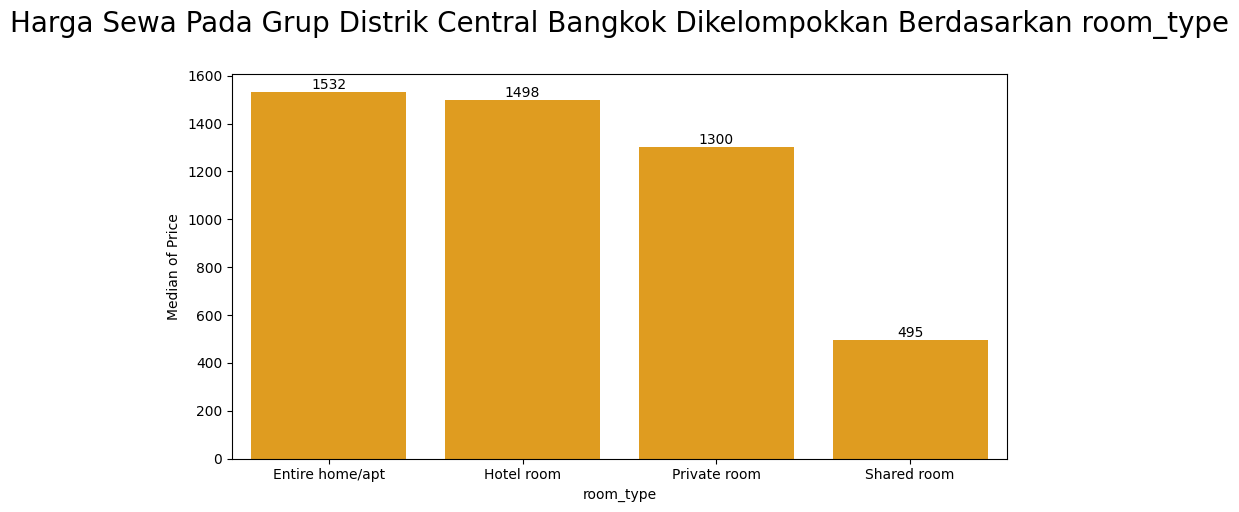

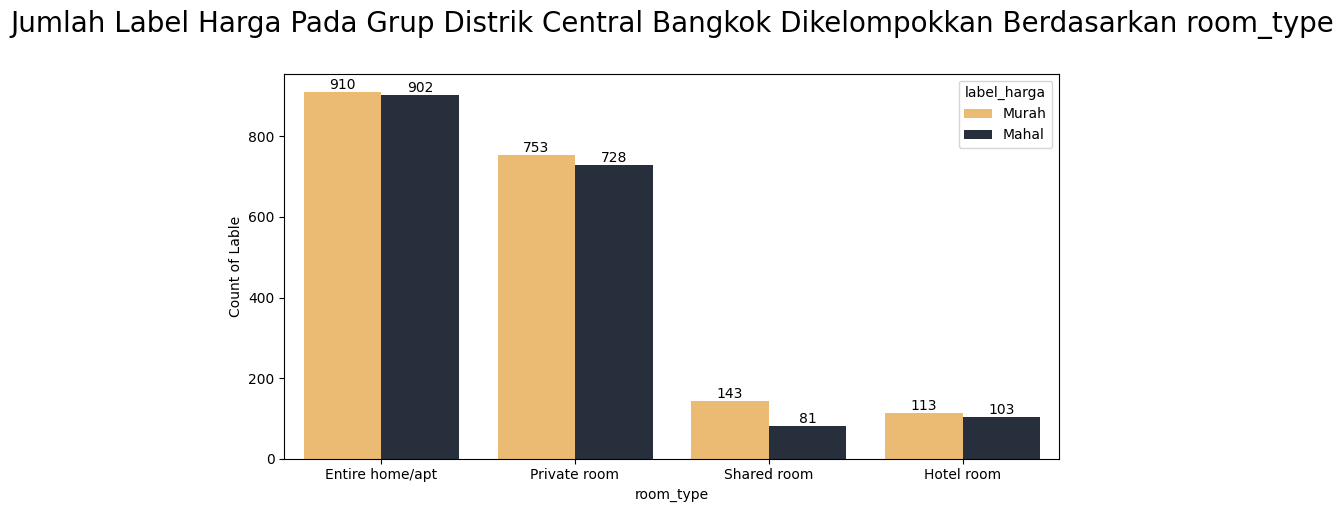

In [169]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfcentralbangkok.reset_index(),
    x='room_type',
    y= 'price',
    color='orange',
)
plt.title('Harga Sewa Pada Grup Distrik Central Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Median of Price')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelpcentralbangkok.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_harga'
)
plt.title('Jumlah Label Harga Pada Grup Distrik Central Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Dari plot harga sewa pada Grup Distrik Central Bangkok dikelompokkan berdasarkan room_type, terlihat bahwa median harga tertinggi dari semua jenis tempat sewa adalah Entire home/apt dengan nilai median sebesar 1532 Baht, diikuti oleh Hotel room sebesar 1498 Baht, Private room sebesar 1300 Baht, dan yang terakhir adalah Shared room sebesar 495 Naht, namun banyaknya jumlah listing, yang paling sedikit adalah Hotel room sebanyak 216, diikuti oleh Shared room sebanyak 224, sedangkan Private room dan Entire home/apt banyaknya jumlah listing sangatlah banyak dimana pada Private room 1481, sedangkan Entire home/apt banyaknya jumlah listing hingga 1812.

Karena dari hasil plot label harga pada Grup Distrik Central Bangkok dikelompokkan berdasarkan room_type proporsi banyaknya nilai antara label 'Murah' dan label 'Mahal' terlihat tidak berbeda jauh, kita dapat menguji nya dengan 2 sample z-test untuk membuktikan secara statistik apakah proporsi banyaknya kelompok 'Murah' lebih besar dari proporsi banyaknya kelompok 'Mahal' dari masing-masing jenis tempat sewa.

In [170]:
df_pivot = dfbylabelpcentralbangkok.reset_index().pivot_table(
    index = 'label_harga',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_harga,,,,,
Mahal,902,103,728,81,1814
Murah,910,113,753,143,1919
subtotal,1812,216,1481,224,3733


In [171]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.920382,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Mahal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.391577,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Hotel room lebih besar dari proporsi jumlah kelompok 'Mahal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.711401,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Private room lebih besar dari proporsi jumlah kelompok 'Mahal' di Private room (Proporsinya TIDAK berbeda signifikan)
3,Shared room,0.000062,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Shared room lebih besar dari proporsi jumlah kelompok 'Mahal' di Shared room (Proporsinya berbeda signifikan)


Dari hasil uji 2 sample z-test, kita dapat menyimpulkan bahwa proporsi antara kelompok 'Murah' dan 'Mahal' di Grup Distrik Central Bangkok berdasarkan tiap-tiap jenis tempat kebanyakan secara statistik tidak berbeda signifikan. Hanya jenis Tempat Sewa Shared room yang menunjukkan keberhasilan memenuhi hipotesis alternatif dimana proporsi jumlah kelompok 'Murah' lebih besar dari proporsi jumlah kelompok 'Mahal'.  Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.920382, 0.711401, 0.391577, 0.000062 .

1.3 North Thonburi

In [172]:
dfnorththonburi = df[df['grup_distrik']=='North Thonburi'].groupby(by='room_type')[['price']].median().sort_values(by='price', ascending=False)
dfnorththonburi

,price
room_type,
Hotel room,1800.0
Entire home/apt,1300.0
Private room,1099.5
Shared room,440.0


In [173]:
dfbylabelpnorththonburi = df[df['grup_distrik']=='North Thonburi'].groupby(['room_type','label_harga'])[['price']].count().rename(columns={'price':'count'}).sort_values(by='count', ascending=False)
dfbylabelpnorththonburi

count
room_type       label_harga       
Entire home/apt Murah          281
                Mahal          275
Private room    Murah          255
                Mahal          239
Hotel room      Murah           21
Shared room     Murah           18
Hotel room      Mahal           16
Shared room     Mahal           12

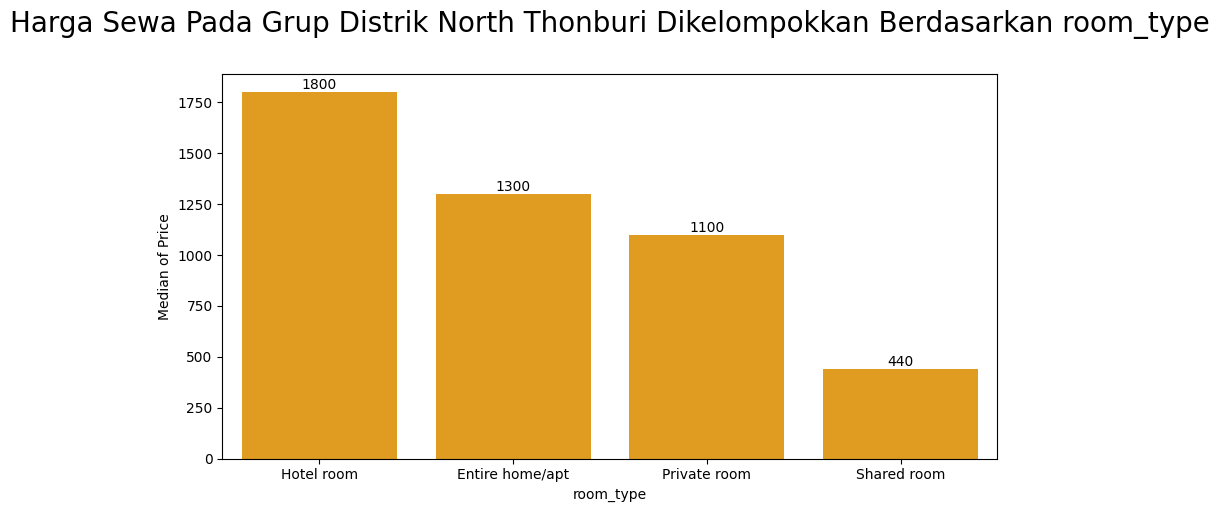

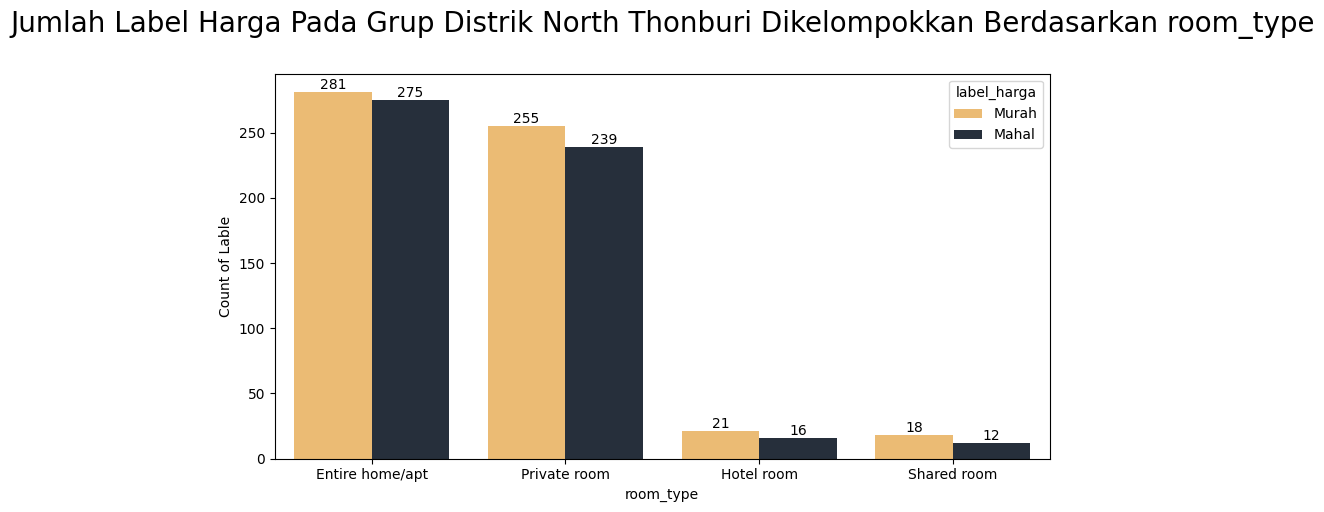

In [174]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfnorththonburi.reset_index(),
    x='room_type',
    y= 'price',
    color='orange',
)
plt.title('Harga Sewa Pada Grup Distrik North Thonburi Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Median of Price')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelpnorththonburi.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_harga'
)
plt.title('Jumlah Label Harga Pada Grup Distrik North Thonburi Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Dari plot harga sewa pada Grup Distrik North Thonburi dikelompokkan berdasarkan room_type, terlihat bahwa median harga tertinggi dari semua jenis tempat sewa adalah Hotel room dengan nilai median sebesar 1800 Baht, diikuti oleh Entire home/apt sebesar 1300 Baht, Private room sebesar 1100 Baht, dan yang terakhir adalah Shared room sebesar 440 Baht, untuk banyaknya jumlah listing, yang paling sedikit adalah Shared room sebanyak 30, diikuti oleh Hotel room sebanyak 37, sedangkan Private room dan Entire home/apt banyaknya jumlah listing cukup berbeda jauh dengan Hotel room maupun Shared room, dimana pada Private room jumlah listing ada sebanyak 494, sedangkan Entire home/apt banyaknya jumlah listing hingga 556.

Karena dari hasil plot label harga pada Grup Distrik North Thonburi dikelompokkan berdasarkan room_type proporsi banyaknya nilai antara label 'Murah' dan label 'Mahal' terlihat tidak berbeda jauh, kita dapat menguji nya dengan 2 sample z-test untuk membuktikan secara statistik apakah proporsi banyaknya kelompok 'Murah' lebih besar dari proporsi banyaknya kelompok 'Mahal' dari masing-masing jenis tempat sewa.

In [175]:
df_pivot = dfbylabelpnorththonburi.reset_index().pivot_table(
    index = 'label_harga',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_harga,,,,,
Mahal,275,16,239,12,542
Murah,281,21,255,18,575
subtotal,556,37,494,30,1117


In [176]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.733751,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Mahal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.256722,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Hotel room lebih besar dari proporsi jumlah kelompok 'Mahal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.466244,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Private room lebih besar dari proporsi jumlah kelompok 'Mahal' di Private room (Proporsinya TIDAK berbeda signifikan)
3,Shared room,0.171861,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Shared room lebih besar dari proporsi jumlah kelompok 'Mahal' di Shared room (Proporsinya TIDAK berbeda signifikan)


Dari hasil uji 2 sample z-test, kita dapat menyimpulkan bahwa proporsi antara kelompok 'Murah' dan 'Mahal' di Grup Distrik North Thonburi berdasarkan tiap-tiap jenis tempat, seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.733751, 0.466244, 0.256722, 0.171861 .

1.4 North Bangkok

In [177]:
dfnorthbangkok = df[df['grup_distrik']=='North Bangkok'].groupby(by='room_type')[['price']].median().sort_values(by='price', ascending=False)
dfnorthbangkok

,price
room_type,
Entire home/apt,1000.0
Hotel room,977.5
Private room,950.0
Shared room,623.0


In [178]:
dfbylabelpnorthbangkok = df[df['grup_distrik']=='North Bangkok'].groupby(['room_type','label_harga'])[['price']].count().rename(columns={'price':'count'}).sort_values(by='count', ascending=False)
dfbylabelpnorthbangkok

count
room_type       label_harga       
Private room    Murah          321
                Mahal          308
Entire home/apt Murah          305
                Mahal          294
Hotel room      Murah           12
Shared room     Murah           12
Hotel room      Mahal            8
Shared room     Mahal            5

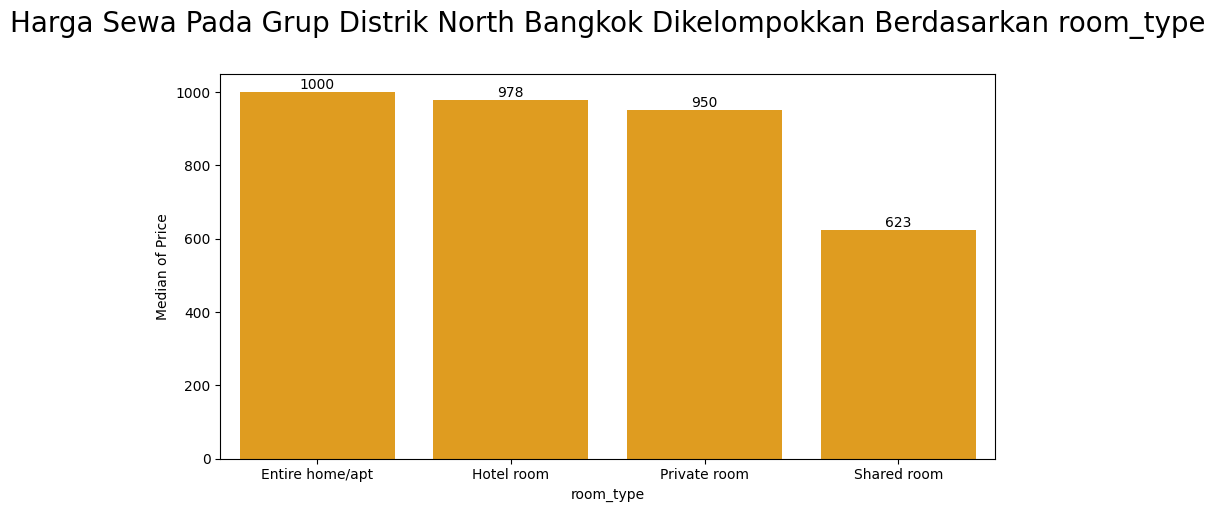

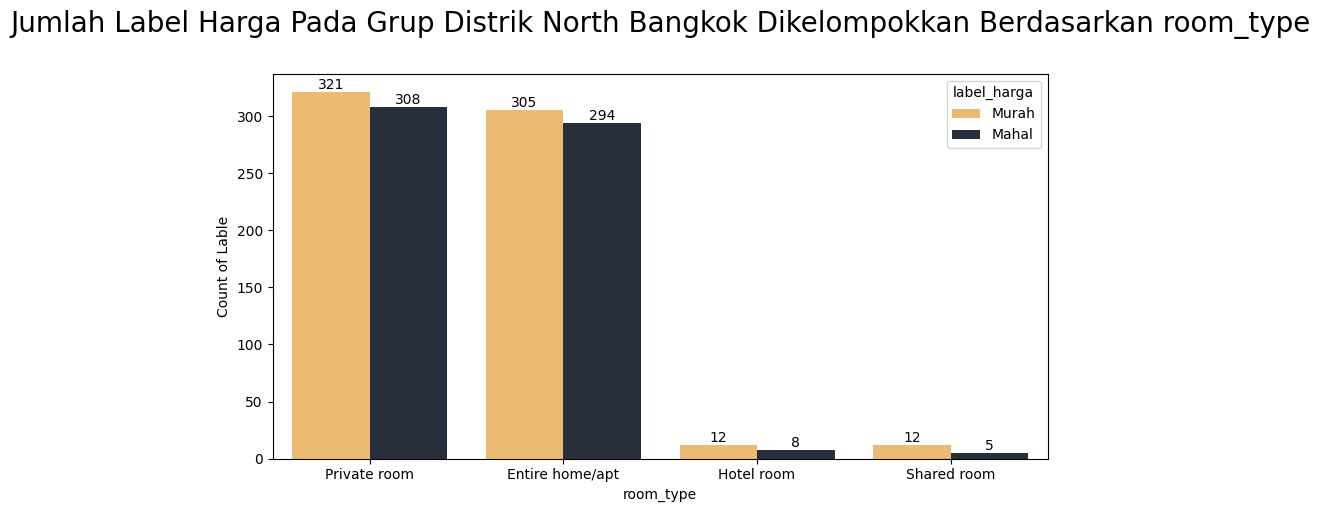

In [179]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfnorthbangkok.reset_index(),
    x='room_type',
    y= 'price',
    color='orange',
)
plt.title('Harga Sewa Pada Grup Distrik North Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Median of Price')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelpnorthbangkok.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_harga'
)
plt.title('Jumlah Label Harga Pada Grup Distrik North Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Dari plot harga sewa pada Grup Distrik North Bangkok dikelompokkan berdasarkan room_type, terlihat bahwa median harga tertinggi dari semua jenis tempat sewa adalah Entire Home/apt dengan nilai median sebesar 1000 Baht, diikuti oleh Hotel room sebesar 978 Baht, Private room sebesar 950 Baht, dan yang terakhir adalah Shared room sebesar 623 Baht, untuk banyaknya jumlah listing, yang paling sedikit adalah Shared room sebanyak 17, diikuti oleh Hotel room sebanyak 20, sedangkan Private room dan Entire home/apt banyaknya jumlah listing cukup berbeda jauh dengan Hotel room maupun Shared room, dimana pada Entire home/apt jumlah listing ada sebanyak 599, sedangkan Private room banyaknya jumlah listing hingga 629.

Karena dari hasil plot label harga pada Grup Distrik North Bangkok dikelompokkan berdasarkan room_type proporsi banyaknya nilai antara label 'Murah' dan label 'Mahal' terlihat tidak berbeda jauh, kita dapat menguji nya dengan 2 sample z-test untuk membuktikan secara statistik apakah proporsi banyaknya kelompok 'Murah' lebih besar dari proporsi banyaknya kelompok 'Mahal' dari masing-masing jenis tempat sewa.

In [180]:
df_pivot = dfbylabelpnorthbangkok.reset_index().pivot_table(
    index = 'label_harga',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_harga,,,,,
Mahal,294,8,308,5,615
Murah,305,12,321,12,650
subtotal,599,20,629,17,1265


In [181]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.623220,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Mahal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.218534,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Hotel room lebih besar dari proporsi jumlah kelompok 'Mahal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.597816,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Private room lebih besar dari proporsi jumlah kelompok 'Mahal' di Private room (Proporsinya TIDAK berbeda signifikan)
3,Shared room,0.055353,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Shared room lebih besar dari proporsi jumlah kelompok 'Mahal' di Shared room (Proporsinya TIDAK berbeda signifikan)


Dari hasil uji 2 sample z-test, kita dapat menyimpulkan bahwa proporsi antara kelompok 'Murah' dan 'Mahal' di Grup Distrik North Bangkok berdasarkan tiap-tiap jenis tempat, seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.623220, 0.597816, 0.218534, 0.055353 .

1.5 East Bangkok

In [182]:
dfeastbangkok = df[df['grup_distrik']=='East Bangkok'].groupby(by='room_type')[['price']].median().sort_values(by='price', ascending=False)
dfeastbangkok

,price
room_type,
Hotel room,1300.5
Entire home/apt,1115.0
Private room,900.0
Shared room,390.0


In [183]:
dfbylabelpeastbangkok = df[df['grup_distrik']=='East Bangkok'].groupby(['room_type','label_harga'])[['price']].count().rename(columns={'price':'count'}).sort_values(by='count', ascending=False)
dfbylabelpeastbangkok

count
room_type       label_harga       
Private room    Murah          215
                Mahal          200
Entire home/apt Murah          181
                Mahal          169
Shared room     Murah           18
Hotel room      Murah           10
                Mahal            8
Shared room     Mahal            6

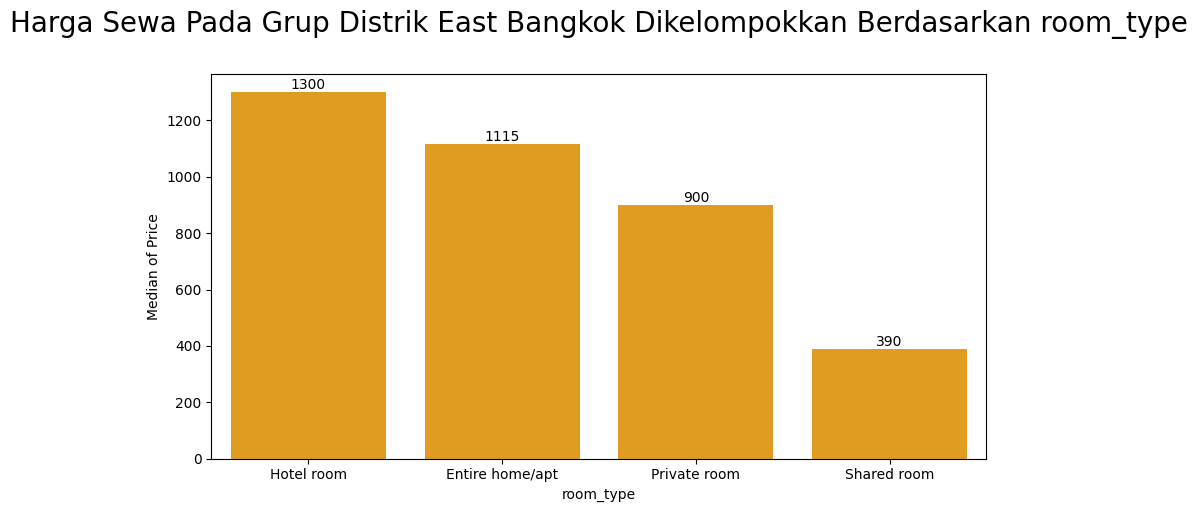

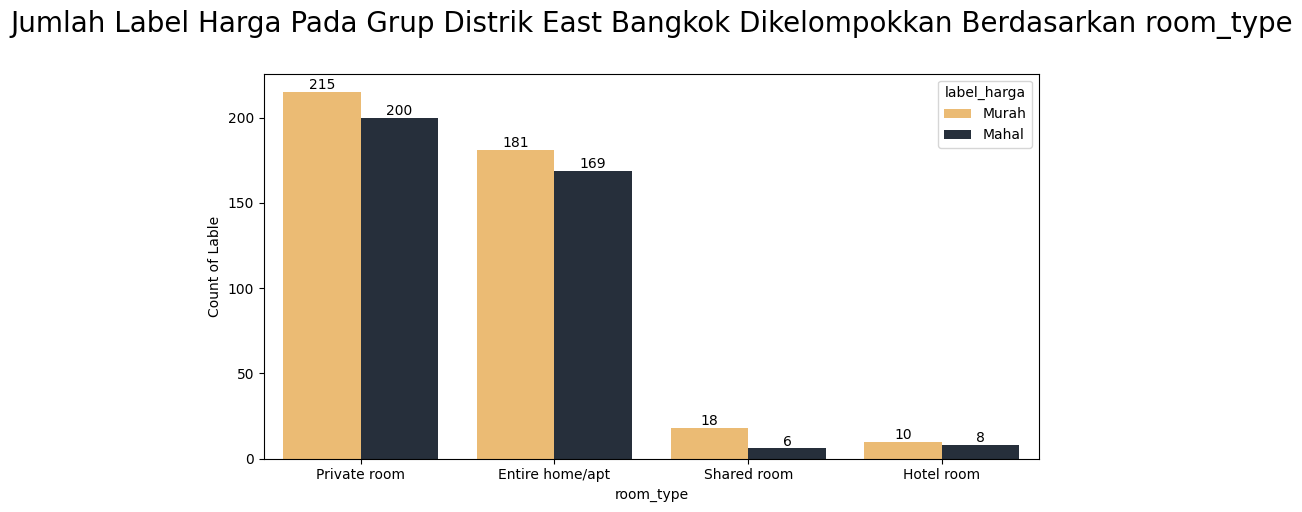

In [184]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfeastbangkok.reset_index(),
    x='room_type',
    y= 'price',
    color='orange',
)
plt.title('Harga Sewa Pada Grup Distrik East Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Median of Price')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelpeastbangkok.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_harga'
)
plt.title('Jumlah Label Harga Pada Grup Distrik East Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Dari plot harga sewa pada Grup Distrik East Bangkok dikelompokkan berdasarkan room_type, terlihat bahwa median harga tertinggi dari semua jenis tempat sewa adalah Hotel room dengan nilai median sebesar 1300 Baht, diikuti oleh Entire home/apt sebesar 1115 Baht, Private room sebesar 900 Baht, dan yang terakhir adalah Shared room sebesar 390 Baht, untuk banyaknya jumlah listing, yang paling sedikit adalah Hotel room sebanyak 18 kali listing, diikuti oleh Shared room sebanyak 24, sedangkan Private room dan Entire home/apt banyaknya jumlah listing cukup berbeda jauh dengan Hotel room maupun Shared room, dimana pada Entire home/apt jumlah listing ada sebanyak 350, sedangkan Private room banyaknya jumlah listing hingga 415.

Karena dari hasil plot label harga pada Grup Distrik East Bangkok dikelompokkan berdasarkan room_type proporsi banyaknya nilai antara label 'Murah' dan label 'Mahal' terlihat tidak berbeda jauh, kita dapat menguji nya dengan 2 sample z-test untuk membuktikan secara statistik apakah proporsi banyaknya kelompok 'Murah' lebih besar dari proporsi banyaknya kelompok 'Mahal' dari masing-masing jenis tempat sewa.

In [185]:
df_pivot = dfbylabelpeastbangkok.reset_index().pivot_table(
    index = 'label_harga',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_harga,,,,,
Mahal,169,8,200,6,383
Murah,181,10,215,18,424
subtotal,350,18,415,24,807


In [186]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.659545,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Mahal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.397782,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Hotel room lebih besar dari proporsi jumlah kelompok 'Mahal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.666068,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Private room lebih besar dari proporsi jumlah kelompok 'Mahal' di Private room (Proporsinya TIDAK berbeda signifikan)
3,Shared room,0.012645,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Shared room lebih besar dari proporsi jumlah kelompok 'Mahal' di Shared room (Proporsinya berbeda signifikan)


Dari hasil uji 2 sample z-test, kita dapat menyimpulkan bahwa proporsi antara kelompok 'Murah' dan 'Mahal' di Grup Distrik East Bangkok berdasarkan tiap-tiap jenis tempat kebanyakan secara statistik tidak berbeda signifikan. Hanya jenis Tempat Sewa Shared room yang menunjukkan keberhasilan memenuhi hipotesis alternatif dimana proporsi jumlah kelompok 'Murah' lebih besar dari proporsi jumlah kelompok 'Mahal'. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.659545, 0.666068, 0.397782, 0.012645 .

1.6 South Thonburi

In [187]:
dfsouththonburi = df[df['grup_distrik']=='South Thonburi'].groupby(by='room_type')[['price']].median().sort_values(by='price', ascending=False)
dfsouththonburi

,price
room_type,
Entire home/apt,1000.0
Hotel room,928.0
Private room,900.0
Shared room,700.0


In [188]:
dfbylabelpsouththonburi = df[df['grup_distrik']=='South Thonburi'].groupby(['room_type','label_harga'])[['price']].count().rename(columns={'price':'count'}).sort_values(by='count', ascending=False)
dfbylabelpsouththonburi

count
room_type       label_harga       
Entire home/apt Murah           93
Private room    Murah           87
                Mahal           84
Entire home/apt Mahal           82
Hotel room      Murah            2
Shared room     Murah            2
                Mahal            1

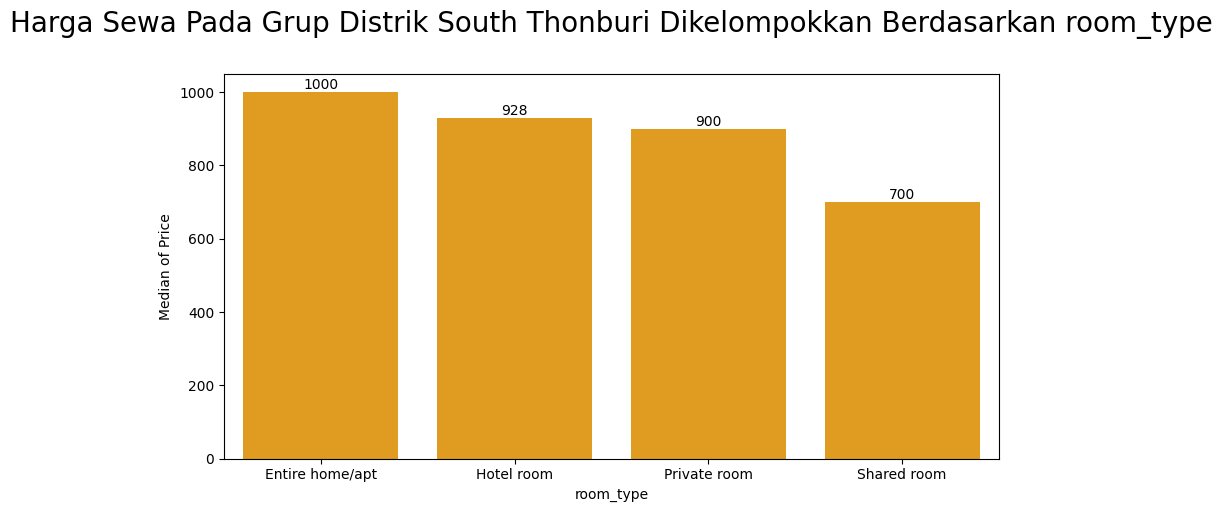

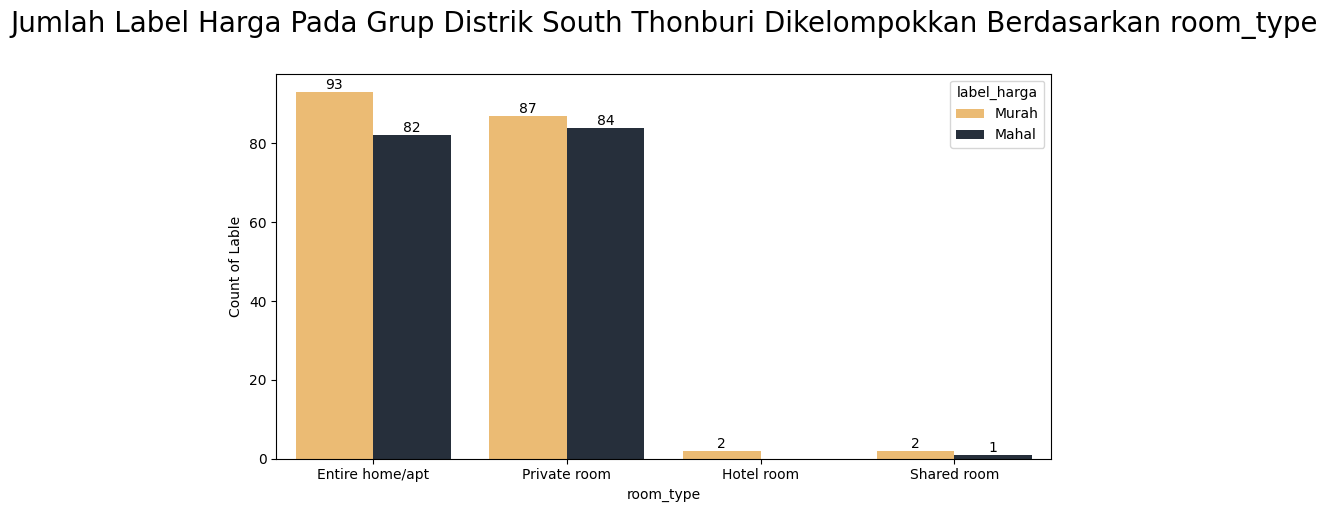

In [189]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfsouththonburi.reset_index(),
    x='room_type',
    y= 'price',
    color='orange',
)
plt.title('Harga Sewa Pada Grup Distrik South Thonburi Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Median of Price')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelpsouththonburi.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_harga'
)
plt.title('Jumlah Label Harga Pada Grup Distrik South Thonburi Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Dari plot harga sewa pada Grup Distrik South Thonburi dikelompokkan berdasarkan room_type, terlihat bahwa median harga tertinggi dari semua jenis tempat sewa adalah Entire home/apt dengan nilai median sebesar 1000 Baht, diikuti oleh Hotel room sebesar 928 Baht, Private room sebesar 900 Baht, dan yang terakhir adalah Shared room sebesar 700 Baht, untuk banyaknya jumlah listing, yang paling sedikit adalah Hotel room sebanyak 2 kali listing, diikuti oleh Shared room sebanyak 3 kali listing, sedangkan Private room dan Entire home/apt banyaknya jumlah listing cukup berbeda jauh dengan Hotel room maupun Shared room, dimana pada Private room jumlah listing ada sebanyak 171, sedangkan Entire home/apt banyaknya jumlah listing hingga 175.

Karena dari hasil plot label harga pada Grup Distrik South Thonburi dikelompokkan berdasarkan room_type proporsi banyaknya nilai antara label 'Murah' dan label 'Mahal' terlihat tidak berbeda jauh, kita dapat menguji nya dengan 2 sample z-test untuk membuktikan secara statistik apakah proporsi banyaknya kelompok 'Murah' lebih besar dari proporsi banyaknya kelompok 'Mahal' dari masing-masing jenis tempat sewa.

In [190]:
df_pivot = dfbylabelpsouththonburi.reset_index().pivot_table(
    index = 'label_harga',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_harga,,,,,
Mahal,82.0,NaN,84.0,1.0,167.0
Murah,93.0,2.0,87.0,2.0,184.0
subtotal,175.0,2.0,171.0,3.0,351.0


In [191]:
df_pivot = df_pivot.fillna(value=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_harga,,,,,
Mahal,82.0,0.0,84.0,1.0,167.0
Murah,93.0,2.0,87.0,2.0,184.0
subtotal,175.0,2.0,171.0,3.0,351.0


In [192]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di {i} lebih besar dari proporsi jumlah kelompok 'Mahal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.393664,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Mahal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.088323,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Hotel room lebih besar dari proporsi jumlah kelompok 'Mahal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.713867,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Private room lebih besar dari proporsi jumlah kelompok 'Mahal' di Private room (Proporsinya TIDAK berbeda signifikan)
3,Shared room,0.309888,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Murah' di Shared room lebih besar dari proporsi jumlah kelompok 'Mahal' di Shared room (Proporsinya TIDAK berbeda signifikan)


Dari hasil uji 2 sample z-test, kita dapat menyimpulkan bahwa proporsi antara kelompok 'Murah' dan 'Mahal' di Grup Distrik South Thonburi berdasarkan tiap-tiap jenis tempat, seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.393664, 0.713867, 0.088323, 0.309888 .

## Label Review Berdasarkan : `grup_distrik` dan `room_type`

Pertama-tama kita lihat secara umum proporsi label review berdasarkan grup_distrik.

In [193]:
dfbylabelreview = df.groupby(['grup_distrik','label_review'])[['reviews_per_month']].count().rename(columns={'reviews_per_month':'count'}).sort_values(by='count', ascending=False)
dfbylabelreview

count
grup_distrik    label_review         
South Bangkok   Kurang Dikenal   3891
                Cukup Dikenal    3637
Central Bangkok Kurang Dikenal   1945
                Cukup Dikenal    1788
North Bangkok   Kurang Dikenal    713
North Thonburi  Kurang Dikenal    611
North Bangkok   Cukup Dikenal     552
North Thonburi  Cukup Dikenal     506
East Bangkok    Kurang Dikenal    473
                Cukup Dikenal     334
South Thonburi  Kurang Dikenal    217
                Cukup Dikenal     134

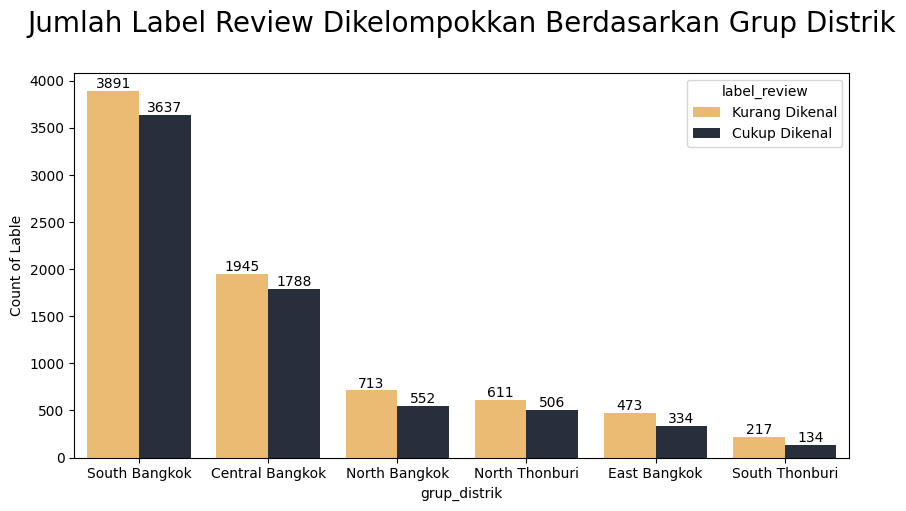

In [194]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelreview.reset_index(),
    x='grup_distrik',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_review'
)
plt.title('Jumlah Label Review Dikelompokkan Berdasarkan Grup Distrik\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Untuk mendapatkan insight dari hasil plot label review dikelompokkan berdasarkan grup distrik, kita perlu menguji 2 sample z-test untuk menguji secara statistik apakah proporsi banyaknya kelompok 'Kurang dikenal' lebih besar dari proporsi banyaknya kelompok 'Cukup Dikenal' pada setiap masing-masing grup distrik.

In [195]:
df_pivot = dfbylabelreview.reset_index().pivot_table(
    index = 'label_review',
    columns = 'grup_distrik',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

grup_distrik,Central Bangkok,East Bangkok,North Bangkok,North Thonburi,South Bangkok,South Thonburi,total
label_review,,,,,,,
Cukup Dikenal,1788,334,552,506,3637,134,6951
Kurang Dikenal,1945,473,713,611,3891,217,7850
subtotal,3733,807,1265,1117,7528,351,14801


In [196]:
pd.options.display.max_colwidth=1000
grupdistrik = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    grupdistrik.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(6)]
dfztest = pd.DataFrame(data=list(zip(grupdistrik, pvalueztest, hasil)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Grup Distrik,Nilai pvalue,Hasil Test
0,Central Bangkok,0.906982,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Central Bangkok lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Central Bangkok (Proporsinya TIDAK berbeda signifikan)
1,East Bangkok,0.000550,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di East Bangkok lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di East Bangkok (Proporsinya berbeda signifikan)
2,North Bangkok,0.006586,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di North Bangkok lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di North Bangkok (Proporsinya berbeda signifikan)
3,North Thonburi,0.123369,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di North Thonburi lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di North Thonburi (Proporsinya TIDAK berbeda signifikan)
4,South Bangkok,0.999593,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di South Bangkok lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di South Bangkok (Proporsinya TIDAK berbeda signifikan)
5,South Thonburi,0.000422,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di South Thonburi lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di South Thonburi (Proporsinya berbeda signifikan)


Dari hasil uji 2 sample z-test, dapat terlihat proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' berdasarkan tiap-tiap grup distrik, untuk grup distrik South Bangkok, Central Bangkok, dan North Thonburi proporsinya tidak berbeda signifikan dengan nilai pvalue berturut-turut sebesar 0.999593,0.906982, dan 0.123369. Namun untuk North Bangkok, East Bangkok, dan South Thonburi proporsinya berbeda signifikan dengan nilai pvalue berturut-turut sebesar 0.006586, 0.000550, dan 0.000422.

Setelah itu kita lihat lebih dalam pada setiap grup distrik dengan menggelompokkan kembali berdasarkan room_type.

2.1 South Bangkok

In [197]:
dfbylabelrsouthbangkok = df[df['grup_distrik']=='South Bangkok'].groupby(['room_type','label_review'])[['number_of_reviews']].count().rename(columns={'number_of_reviews':'count'}).sort_values(by='count', ascending=False)
dfbylabelrsouthbangkok

count
room_type       label_review         
Entire home/apt Kurang Dikenal   2393
                Cukup Dikenal    2346
Private room    Kurang Dikenal   1242
                Cukup Dikenal    1080
Hotel room      Kurang Dikenal    166
                Cukup Dikenal     153
Shared room     Kurang Dikenal     90
                Cukup Dikenal      58

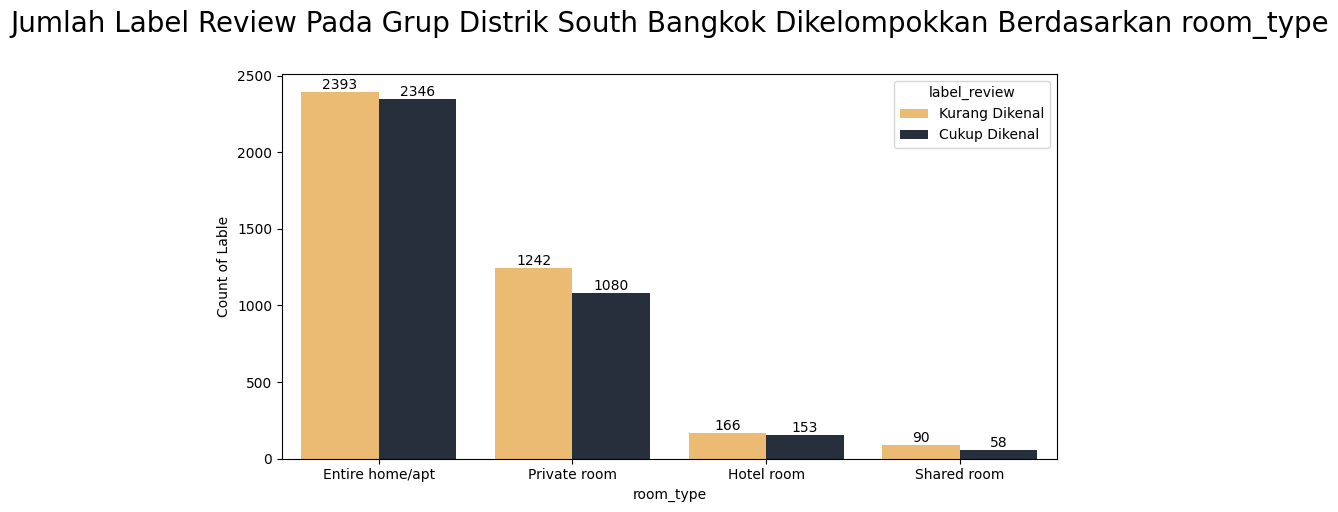

In [198]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelrsouthbangkok.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_review'
)
plt.title('Jumlah Label Review Pada Grup Distrik South Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Untuk mendapatkan insight dari hasil plot label review pada Grup Distrik South Bangkok dikelompokkan berdasarkan jenis tempat sewa(room_type), kita perlu menguji 2 sample z-test untuk menguji secara statistik apakah proporsi banyaknya kelompok 'Kurang dikenal' lebih besar dari proporsi banyaknya kelompok 'Cukup Dikenal' pada setiap masing-masing jenis tempat sewa.

In [199]:
df_pivot = dfbylabelrsouthbangkok.reset_index().pivot_table(
    index = 'label_review',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_review,,,,,
Cukup Dikenal,2346,153,1080,58,3637
Kurang Dikenal,2393,166,1242,90,3891
subtotal,4739,319,2322,148,7528


In [200]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.996490,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.449056,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Hotel room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.018364,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Private room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Private room (Proporsinya berbeda signifikan)
3,Shared room,0.012438,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Shared room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Shared room (Proporsinya berbeda signifikan)


Dari hasil uji 2 sample z-test, dapat terlihat proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' pada grup distrik South Bangkok berdasarkan tiap-tiap jenis tempat sewa, untuk jenis tempat sewa Entire home/apt dan Hotel room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Private room dan Shared room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.996490, 0.018364, 0.449056, dan 0.012438 .

2.2 Central Bangkok

In [201]:
dfbylabelrcentralbangkok = df[df['grup_distrik']=='Central Bangkok'].groupby(['room_type','label_review'])[['number_of_reviews']].count().rename(columns={'number_of_reviews':'count'}).sort_values(by='count', ascending=False)
dfbylabelrcentralbangkok

count
room_type       label_review         
Entire home/apt Kurang Dikenal    916
                Cukup Dikenal     896
Private room    Kurang Dikenal    778
                Cukup Dikenal     703
Shared room     Kurang Dikenal    135
Hotel room      Kurang Dikenal    116
                Cukup Dikenal     100
Shared room     Cukup Dikenal      89

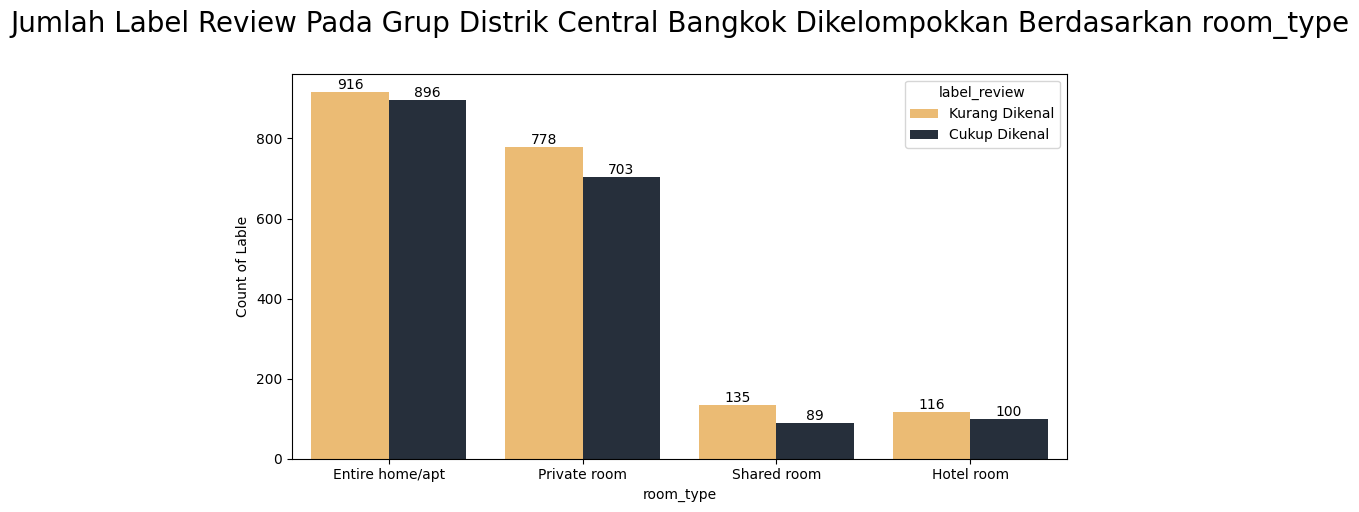

In [202]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelrcentralbangkok.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_review'
)
plt.title('Jumlah Label Review Pada Grup Distrik Central Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Untuk mendapatkan insight dari hasil plot label review pada Grup Distrik Central Bangkok dikelompokkan berdasarkan jenis tempat sewa(room_type), kita perlu menguji 2 sample z-test untuk menguji secara statistik apakah proporsi banyaknya kelompok 'Kurang dikenal' lebih besar dari proporsi banyaknya kelompok 'Cukup Dikenal' pada setiap masing-masing jenis tempat sewa.

In [203]:
df_pivot = dfbylabelrcentralbangkok.reset_index().pivot_table(
    index = 'label_review',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_review,,,,,
Cukup Dikenal,896,100,703,89,1788
Kurang Dikenal,916,116,778,135,1945
subtotal,1812,216,1481,224,3733


In [204]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.967287,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.313763,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Hotel room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.335163,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Private room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Private room (Proporsinya TIDAK berbeda signifikan)
3,Shared room,0.005817,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Shared room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Shared room (Proporsinya berbeda signifikan)


Dari hasil uji 2 sample z-test, dapat terlihat proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' pada grup distrik Central Bangkok berdasarkan tiap-tiap jenis tempat sewa, untuk jenis tempat sewa Entire home/apt, Hotel room, dan Private room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Shared room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.967287, 0.335163, 0.313763, dan 0.005817 .

2.3 North Bangkok

In [205]:
dfbylabelrnorthbangkok = df[df['grup_distrik']=='North Bangkok'].groupby(['room_type','label_review'])[['number_of_reviews']].count().rename(columns={'number_of_reviews':'count'}).sort_values(by='count', ascending=False)
dfbylabelrnorthbangkok

count
room_type       label_review         
Private room    Kurang Dikenal    373
Entire home/apt Kurang Dikenal    315
                Cukup Dikenal     284
Private room    Cukup Dikenal     256
Shared room     Kurang Dikenal     13
Hotel room      Kurang Dikenal     12
                Cukup Dikenal       8
Shared room     Cukup Dikenal       4

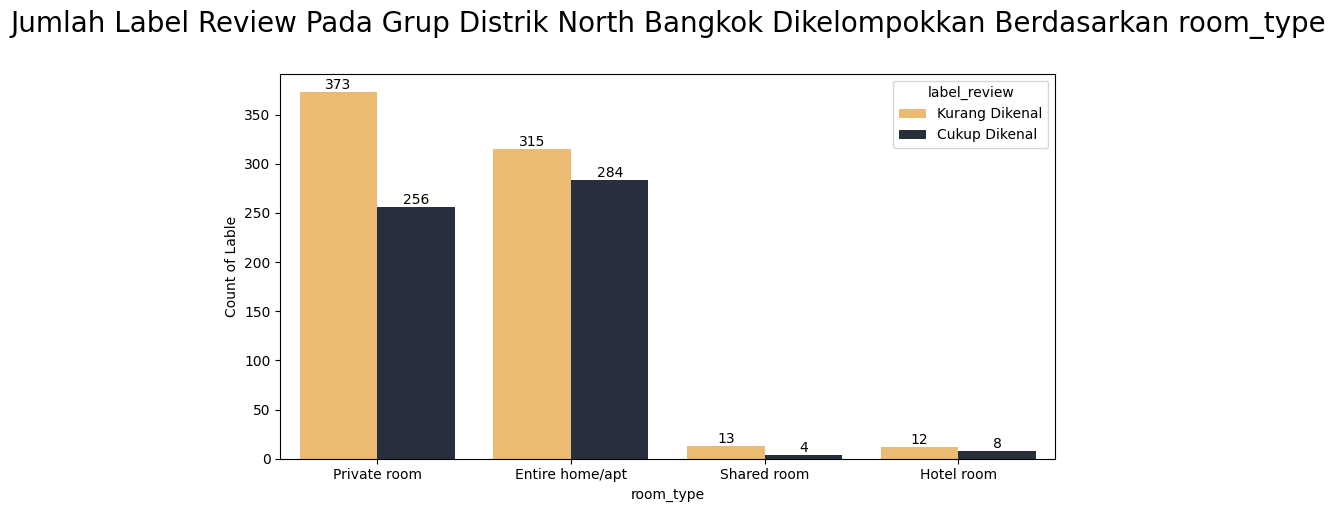

In [206]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelrnorthbangkok.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_review'
)
plt.title('Jumlah Label Review Pada Grup Distrik North Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Untuk mendapatkan insight dari hasil plot label review pada Grup Distrik North Bangkok dikelompokkan berdasarkan jenis tempat sewa(room_type), kita perlu menguji 2 sample z-test untuk menguji secara statistik apakah proporsi banyaknya kelompok 'Kurang dikenal' lebih besar dari proporsi banyaknya kelompok 'Cukup Dikenal' pada setiap masing-masing jenis tempat sewa.

In [207]:
df_pivot = dfbylabelrnorthbangkok.reset_index().pivot_table(
    index = 'label_review',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_review,,,,,
Cukup Dikenal,284,8,256,4,552
Kurang Dikenal,315,12,373,13,713
subtotal,599,20,629,17,1265


In [208]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.994889,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.370497,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Hotel room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.018104,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Private room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Private room (Proporsinya berbeda signifikan)
3,Shared room,0.046187,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Shared room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Shared room (Proporsinya berbeda signifikan)


Dari hasil uji 2 sample z-test, dapat terlihat proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' pada grup distrik North Bangkok berdasarkan tiap-tiap jenis tempat sewa, untuk jenis tempat sewa Entire home/apt, Hotel room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Private room dan Shared room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.994889, 0.018104, 0.370497, dan 0.046187 .

2.4 North Thonburi

In [209]:
dfbylabelrnorththonburi = df[df['grup_distrik']=='North Thonburi'].groupby(['room_type','label_review'])[['number_of_reviews']].count().rename(columns={'number_of_reviews':'count'}).sort_values(by='count', ascending=False)
dfbylabelrnorththonburi

,,count
room_type,label_review,
Entire home/apt,Kurang Dikenal,289
Private room,Kurang Dikenal,281
Entire home/apt,Cukup Dikenal,267
Private room,Cukup Dikenal,213
Hotel room,Kurang Dikenal,22
Shared room,Kurang Dikenal,19
Hotel room,Cukup Dikenal,15
Shared room,Cukup Dikenal,11


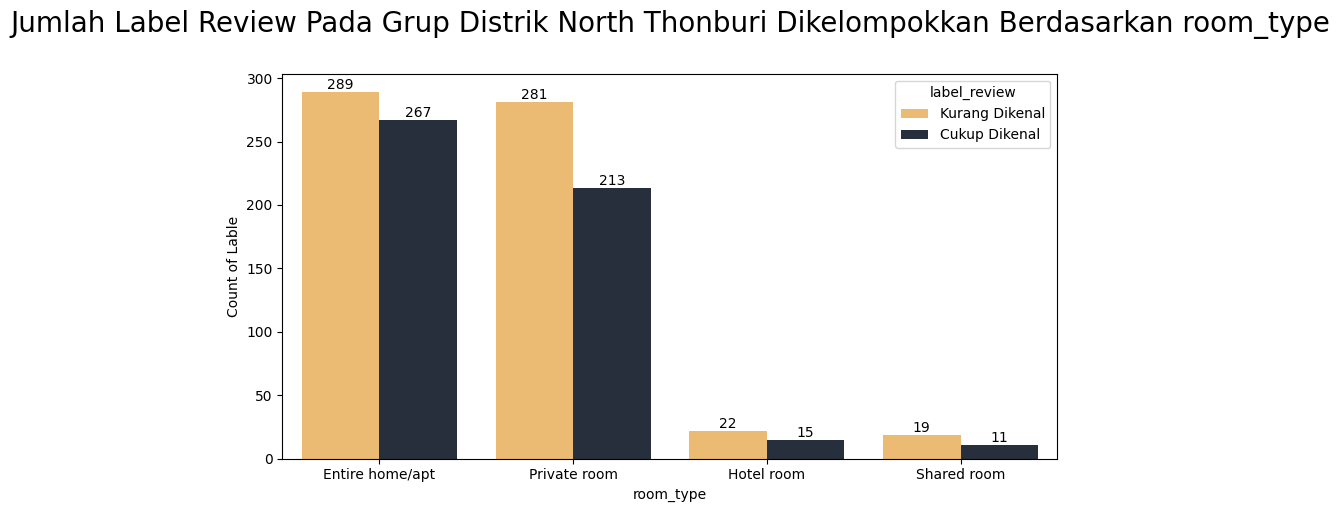

In [210]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelrnorththonburi.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_review'
)
plt.title('Jumlah Label Review Pada Grup Distrik North Thonburi Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Untuk mendapatkan insight dari hasil plot label review pada Grup Distrik North Thonburi dikelompokkan berdasarkan jenis tempat sewa(room_type), kita perlu menguji 2 sample z-test untuk menguji secara statistik apakah proporsi banyaknya kelompok 'Kurang dikenal' lebih besar dari proporsi banyaknya kelompok 'Cukup Dikenal' pada setiap masing-masing jenis tempat sewa.

In [211]:
df_pivot = dfbylabelrnorththonburi.reset_index().pivot_table(
    index = 'label_review',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_review,,,,,
Cukup Dikenal,267,15,213,11,506
Kurang Dikenal,289,22,281,19,611
subtotal,556,37,494,30,1117


In [212]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.965558,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.277108,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Hotel room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.095973,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Private room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Private room (Proporsinya TIDAK berbeda signifikan)
3,Shared room,0.167786,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Shared room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Shared room (Proporsinya TIDAK berbeda signifikan)


Dari hasil uji 2 sample z-test, dapat terlihat proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' pada grup distrik North Thonburi berdasarkan tiap-tiap jenis tempat sewa, untuk semua jenis tempat sewa proporsinya tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.965558, 0.095973, 0.277108, dan 0.167786 .

2.5 East Bangkok

In [213]:
dfbylabelreastbangkok = df[df['grup_distrik']=='East Bangkok'].groupby(['room_type','label_review'])[['number_of_reviews']].count().rename(columns={'number_of_reviews':'count'}).sort_values(by='count', ascending=False)
dfbylabelreastbangkok

count
room_type       label_review         
Private room    Kurang Dikenal    257
Entire home/apt Kurang Dikenal    192
                Cukup Dikenal     158
Private room    Cukup Dikenal     158
Shared room     Kurang Dikenal     14
Hotel room      Kurang Dikenal     10
Shared room     Cukup Dikenal      10
Hotel room      Cukup Dikenal       8

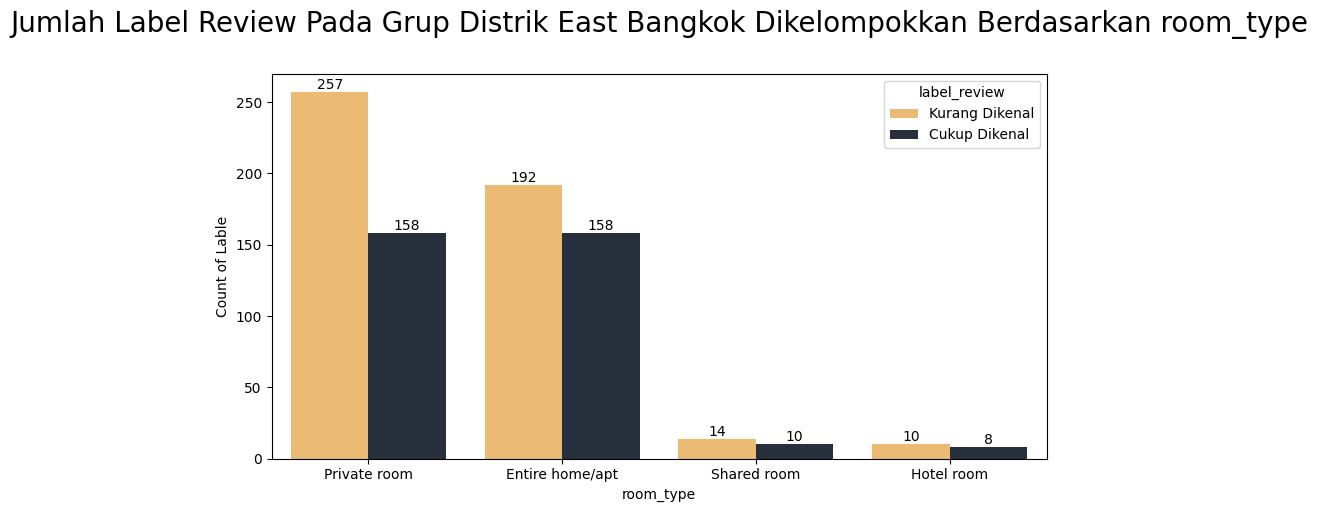

In [214]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelreastbangkok.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_review'
)
plt.title('Jumlah Label Review Pada Grup Distrik East Bangkok Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Untuk mendapatkan insight dari hasil plot label review pada Grup Distrik East Bangkok dikelompokkan berdasarkan jenis tempat sewa(room_type), kita perlu menguji 2 sample z-test untuk menguji secara statistik apakah proporsi banyaknya kelompok 'Kurang dikenal' lebih besar dari proporsi banyaknya kelompok 'Cukup Dikenal' pada setiap masing-masing jenis tempat sewa.

In [215]:
df_pivot = dfbylabelreastbangkok.reset_index().pivot_table(
    index = 'label_review',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_review,,,,,
Cukup Dikenal,158,8,158,10,334
Kurang Dikenal,192,10,257,14,473
subtotal,350,18,415,24,807


In [216]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.970978,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.604989,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Hotel room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.024555,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Private room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Private room (Proporsinya berbeda signifikan)
3,Shared room,0.511230,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Shared room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Shared room (Proporsinya TIDAK berbeda signifikan)


Dari hasil uji 2 sample z-test, dapat terlihat proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' pada grup distrik East Bangkok berdasarkan tiap-tiap jenis tempat sewa, untuk jenis tempat sewa Entire home/apt, Hotel room, dan Shared room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Private room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.970978, 0.024555, 0.604989, dan 0.511230 .

2.6 South Thonburi

In [217]:
dfbylabelrsouththonburi = df[df['grup_distrik']=='South Thonburi'].groupby(['room_type','label_review'])[['number_of_reviews']].count().rename(columns={'number_of_reviews':'count'}).sort_values(by='count', ascending=False)
dfbylabelrsouththonburi

count
room_type       label_review         
Private room    Kurang Dikenal    116
Entire home/apt Kurang Dikenal     96
                Cukup Dikenal      79
Private room    Cukup Dikenal      55
Shared room     Kurang Dikenal      3
Hotel room      Kurang Dikenal      2

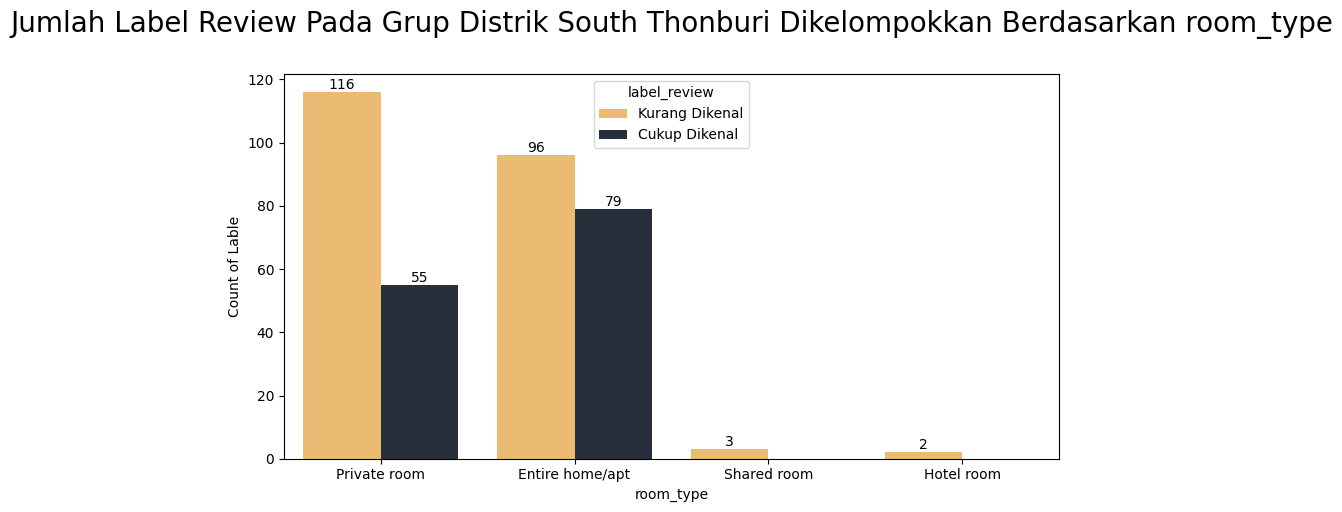

In [218]:
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=dfbylabelrsouththonburi.reset_index(),
    x='room_type',
    y= 'count',
    palette=['#FFBF60', '#232F3E'],
    hue='label_review'
)
plt.title('Jumlah Label Review Pada Grup Distrik South Thonburi Dikelompokkan Berdasarkan room_type\n', size=20)
plt.ylabel('Count of Lable')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')
plt.show()

Untuk mendapatkan insight dari hasil plot label review pada Grup Distrik South Thonburi dikelompokkan berdasarkan jenis tempat sewa(room_type), kita perlu menguji 2 sample z-test untuk menguji secara statistik apakah proporsi banyaknya kelompok 'Kurang dikenal' lebih besar dari proporsi banyaknya kelompok 'Cukup Dikenal' pada setiap masing-masing jenis tempat sewa.

In [219]:
df_pivot = dfbylabelrsouththonburi.reset_index().pivot_table(
    index = 'label_review',
    columns = 'room_type',
    values = 'count'
)

df_pivot['total'] = df_pivot.sum(axis=1)
df_pivot.loc['subtotal'] = df_pivot.sum(axis=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_review,,,,,
Cukup Dikenal,79.0,NaN,55.0,NaN,134.0
Kurang Dikenal,96.0,2.0,116.0,3.0,217.0
subtotal,175.0,2.0,171.0,3.0,351.0


In [220]:
df_pivot = df_pivot.fillna(value=0)
df_pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
label_review,,,,,
Cukup Dikenal,79.0,0.0,55.0,0.0,134.0
Kurang Dikenal,96.0,2.0,116.0,3.0,217.0
subtotal,175.0,2.0,171.0,3.0,351.0


In [221]:
pd.options.display.max_colwidth=1000
jenissewa = []
pvalueztest = []
hasil = []
for i in df_pivot.drop(columns='total').columns:
    jenissewa.append(i)
    stat, pvalue = proportions_ztest(
        count= [df_pivot[i][1], df_pivot[i][0]],
        nobs = [df_pivot['total'][1], df_pivot['total'][0]],
        alternative = 'larger'
    )
    pvalueztest.append(pvalue)
    if pvalue > 0.05 :
        hasil.append(f'''Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya TIDAK berbeda signifikan)''')
    else :
        hasil.append(f'''Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di {i} lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di {i} (Proporsinya berbeda signifikan)''')    
label=[i for i in range(4)]
dfztest = pd.DataFrame(data=list(zip(jenissewa, pvalueztest, hasil)), index=label).rename(columns={0: 'Jenis Tempat Sewa(room_type)', 1: 'Nilai pvalue', 2: 'Hasil Test'})
dfztest

,Jenis Tempat Sewa(room_type),Nilai pvalue,Hasil Test
0,Entire home/apt,0.996306,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Entire home/apt lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Entire home/apt (Proporsinya TIDAK berbeda signifikan)
1,Hotel room,0.132533,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Hotel room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Hotel room (Proporsinya TIDAK berbeda signifikan)
2,Private room,0.011908,Berhasil menolak Ho. Kita punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Private room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Private room (Proporsinya berbeda signifikan)
3,Shared room,0.085823,Gagal menolak Ho. Kita TIDAK punya cukup bukti untuk mengatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' di Shared room lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' di Shared room (Proporsinya TIDAK berbeda signifikan)


Dari hasil uji 2 sample z-test, dapat terlihat proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' pada grup distrik South Thonburi berdasarkan tiap-tiap jenis tempat sewa, untuk jenis tempat sewa Entire home/apt, Hotel room, dan Shared room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Private room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.996306, 0.011908, 0.132533, dan 0.085823 .

## **Kesimpulan dan Rekomendasi**

**Kesimpulan**

Dari hasil Analisis yang telah dilakukan, kita dapat membuat kesimpulan sebagaimana berikut.

Kesimpulan umum :

1. Dari hasil visualisasi letak geografis dapat disimpulkan bahwa semakin tempat sewa mendekati pusat kota maka tempat sewa yang listing akan semakin banyak.

2. Dari hasil uji korelasi kolom-kolom numerikal, antar kolom number_of_reviews dengan reviews_per_month memiliki korelasi moderate sebesar 0.58, dan kolom pembagian_median_price dengan kolom pembagian_median_revmonth memiliki hubungan korelasi yang moderate sebesar 0.41. Kolom-kolom lain berkorelasi lemah.

Kesimpulan Setiap Grup Distrik :

- **Secara Umum**

1. Dari plot harga sewa berdasarkan grup distrik, nilai median didapatkan oleh grup distrik South Bangkok, Central Bangkok, North Bangkok, North Thonburi, East Bangkok, South Thonburi berturut-turut sebesar 1581, 1421, 993, 1200, 990, 970 (Baht).
2. Dari plot label harga berdasarkan grup distrik, banyaknya jumlah listing pada grup distrik South Bangkok, Central Bangkok, North Bangkok, North Thonburi, East Bangkok, South Thonburi berturut-turut sebanyak 7528, 3733,  1265, 1117, 807, 351 .
3. Dari hasil uji 2 sample z-test pada label harga berdasarkan tiap-tiap grup distrik, proporsi antara kelompok 'Murah' dan 'Mahal' seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada grup distrik South Bangkok, Central Bangkok, North Bangkok, North Thonburi, East Bangkok, South Thonburi berturut turut sebesar 0.914106, 0.290959, 0.392531, 0.374450, 0.186640, dan 0.297067 .
4. Dari hasil uji 2 sample z-test pada label review berdasarkan tiap-tiap grup distrik, proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' terbagi menjadi 2, untuk grup distrik South Bangkok, Central Bangkok, dan North Thonburi proporsinya tidak berbeda signifikan. Namun untuk North Bangkok, East Bangkok, dan South Thonburi proporsinya berbeda signifikan. Dengan nilai pvalue pada grup distrik South Bangkok, Central Bangkok, North Bangkok, North Thonburi, East Bangkok, South Thonburi berturut turut sebesar 0.999593, 0.906982, 0.006586, 0.123369, 0.000550, dan 0.000422 .

- **South Bangkok**

1. Dari plot harga sewa pada grup distrik South Bangkok dikelompokkan berdasarkan room_type, nilai median harga dari jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 1682, 1414, 1879, 490 (Baht).
2. Dari plot label harga pada grup distrik South Bangkok dikelompokkan berdasarkan room_type, banyaknya jumlah listing jenis tempat sewa Entire Home/apt, Private room, Hotel room, Shared room berturut-turut sebanyak 4739, 2322, 319, 148 .
3. Dari hasil uji 2 sample z-test pada label harga di grup distrik South Bangkok berdasarkan room_type, proporsi antara kelompok 'Murah' dan 'Mahal' seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 0.709016, 0.476034, 0.364960, 0.112352 .
4. Dari hasil uji 2 sample z-test pada label review di grup distrik South Bangkok berdasarkan room_type, proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' terbagi menjadi 2, untuk jenis tempat sewa Entire home/apt dan Hotel room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Private room dan Shared room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.996490, 0.018364, 0.449056, dan 0.012438 .

- **Central Bangkok**

1. Dari plot harga sewa pada grup distrik Central Bangkok dikelompokkan berdasarkan room_type, nilai median harga dari jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 1532, 1300, 1498, 495 (Baht).
2. Dari plot label harga pada grup distrik Central Bangkok dikelompokkan berdasarkan room_type, banyaknya jumlah listing jenis tempat sewa Entire Home/apt, Private room, Hotel room, Shared room berturut-turut sebanyak 1812, 1481, 216, 224 .
3. Dari hasil uji 2 sample z-test pada label harga di grup distrik Central Bangkok berdasarkan room_type, proporsi antara kelompok 'Murah' dan 'Mahal' kebanyakan secara statistik tidak berbeda signifikan. Hanya jenis Tempat Sewa Shared room yang proporsinya berbeda signifikan(Proporsi Kelompok 'Murah' lebih besar). Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 0.920382, 0.711401, 0.391577, 0.000062 .
4. Dari hasil uji 2 sample z-test pada label review di grup distrik Central Bangkok berdasarkan room_type, proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' terbagi menjadi 2, untuk jenis tempat sewa Entire home/apt, Hotel room, dan Private room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Shared room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.967287, 0.335163, 0.313763, dan 0.005817 .

- **North Bangkok**

1. Dari plot harga sewa pada grup distrik North Bangkok dikelompokkan berdasarkan room_type, nilai median harga dari jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 1000, 950, 978, 623 (Baht).
2. Dari plot label harga pada grup distrik North Bangkok dikelompokkan berdasarkan room_type, banyaknya jumlah listing jenis tempat sewa Entire Home/apt, Private room, Hotel room, Shared room berturut-turut sebanyak 599, 629, 20, 17 .
3. Dari hasil uji 2 sample z-test pada label harga di grup distrik North Bangkok berdasarkan room_type, proporsi antara kelompok 'Murah' dan 'Mahal' seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 0.623220, 0.597816, 0.218534, 0.055353 .
4. Dari hasil uji 2 sample z-test pada label review di grup distrik North Bangkok berdasarkan room_type, proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' terbagi menjadi 2, untuk jenis tempat sewa Entire home/apt, Hotel room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Private room dan Shared room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.994889, 0.018104, 0.370497, dan 0.046187 .

- **North Thonburi**

1. Dari plot harga sewa pada grup distrik North Thonburi dikelompokkan berdasarkan room_type, nilai median harga dari jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 1300, 1100, 1800, 440 (Baht).
2. Dari plot label harga pada grup distrik North Thonburi dikelompokkan berdasarkan room_type, banyaknya jumlah listing jenis tempat sewa Entire Home/apt, Private room, Hotel room, Shared room berturut-turut sebanyak 556, 494, 37, 30 .
3. Dari hasil uji 2 sample z-test pada label harga di grup distrik North Thonburi berdasarkan room_type, proporsi antara kelompok 'Murah' dan 'Mahal' seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 0.733751, 0.466244, 0.256722, 0.171861 .
4. Dari hasil uji 2 sample z-test pada label review di grup distrik North Thonburi berdasarkan room_type, antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' untuk semua jenis tempat sewa proporsinya tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.965558, 0.095973, 0.277108, dan 0.167786 .

- **East Bangkok**

1. Dari plot harga sewa pada grup distrik East Bangkok dikelompokkan berdasarkan room_type, nilai median harga dari jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 1115, 900, 1300, 390 (Baht).
2. Dari plot label harga pada grup distrik East Bangkok dikelompokkan berdasarkan room_type, banyaknya jumlah listing jenis tempat sewa Entire Home/apt, Private room, Hotel room, Shared room berturut-turut sebanyak 350, 415, 18, 24 .
3. Dari hasil uji 2 sample z-test pada label harga di grup distrik East Bangkok berdasarkan room_type, proporsi antara kelompok 'Murah' dan 'Mahal' kebanyakan secara statistik tidak berbeda signifikan. Hanya jenis Tempat Sewa Shared room yang proporsinya berbeda signifikan(Proporsi Kelompok 'Murah' lebih besar). Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 0.659545, 0.666068, 0.397782, 0.012645 .
4. Dari hasil uji 2 sample z-test pada label review di grup distrik East Bangkok berdasarkan room_type, proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' terbagi menjadi 2, untuk jenis tempat sewa Entire home/apt, Hotel room, dan Shared room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Private room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.970978, 0.024555, 0.604989, dan 0.511230 .

- **South Thonburi**

1. Dari plot harga sewa pada grup distrik South Thonburi dikelompokkan berdasarkan room_type, nilai median harga dari jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 1000, 900, 928, 700 (Baht).
2. Dari plot label harga pada grup distrik South Thonburi dikelompokkan berdasarkan room_type, banyaknya jumlah listing jenis tempat sewa Entire Home/apt, Private room, Hotel room, Shared room berturut-turut sebanyak 175, 171, 2, 3 .
3. Dari hasil uji 2 sample z-test pada label harga di grup distrik South Thonburi berdasarkan room_type, proporsi antara kelompok 'Murah' dan 'Mahal' seluruhnya secara statistik tidak berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room, Shared room berturut-turut sebesar 0.393664, 0.713867, 0.088323, 0.309888 .
4. Dari hasil uji 2 sample z-test pada label review di grup distrik South Thonburi berdasarkan room_type, proporsi antara kelompok 'Kurang Dikenal' dan 'Cukup Dikenal' terbagi menjadi 2, untuk jenis tempat sewa Entire home/apt, Hotel room, dan Shared room proporsinya tidak berbeda signifikan. Namun untuk jenis tempat sewa Private room proporsinya berbeda signifikan. Dengan nilai pvalue pada jenis tempat sewa Entire home/apt, Private room, Hotel room dan Shared room berturut-turut sebesar 0.996306, 0.011908, 0.132533, dan 0.085823 .

**Rekomendasi**

- **Secara umum**

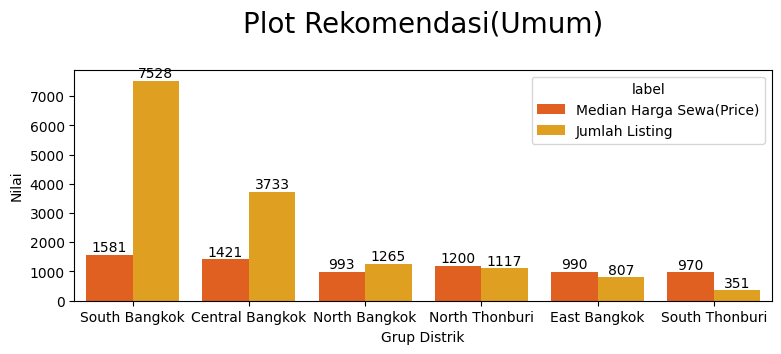

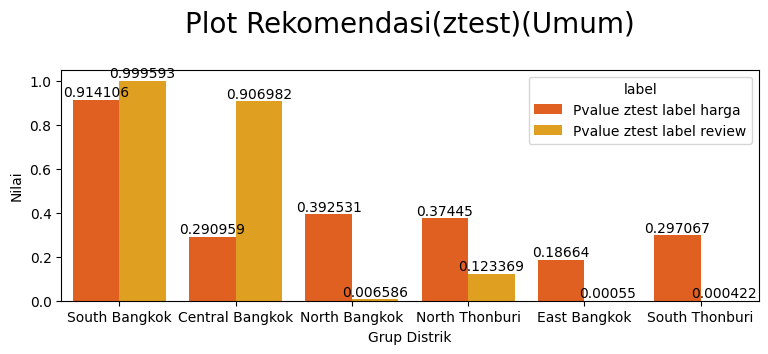

In [222]:
label=[i for i in range(6)]
listgrupdistrik = ['South Bangkok', 'Central Bangkok', 'North Bangkok', 'North Thonburi', 'East Bangkok', 'South Thonburi']
hargasewa = [1581, 1421, 993, 1200, 990, 970]
jumlahlisting = [7528, 3733,  1265, 1117, 807, 351]
ztestharga = [0.914106, 0.290959, 0.392531, 0.374450, 0.186640, 0.297067]
ztestreview = [0.999593, 0.906982, 0.006586, 0.123369, 0.000550, 0.000422]
dfrekomendasi1 = pd.DataFrame(data=list(zip(listgrupdistrik, hargasewa)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi1['label'] = 'Median Harga Sewa(Price)'
dfrekomendasi2 = pd.DataFrame(data=list(zip(listgrupdistrik, jumlahlisting)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi2['label'] = 'Jumlah Listing'
dfrekomendasi3 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestharga)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi3['label'] = 'Pvalue ztest label harga'
dfrekomendasi4 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestreview)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi4['label'] = 'Pvalue ztest label review'
dfconcat1 = pd.concat([dfrekomendasi1,dfrekomendasi2])
dfconcat2 = pd.concat([dfrekomendasi3,dfrekomendasi4])

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat1,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(Umum)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat2,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(ztest)(Umum)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x}')
plt.show()

Dari plot diatas terdapat beberapa rekomendasi sebagaimana berikut :
- Secara umum, Berinvestasi properti di grup distrik South Bangkok adalah merupakan pilihan paling tepat jika menginginkan keuntungan paling besar dari harga sewa, namun perlu dipertimbangkan juga dari segi banyaknya listing tempat sewa pada Airbnb, South Bangkok merupakan lokasi yang paling banyak melakukan listing, sehingga berakibat ketatnya persaingan dengan penyewa properti yang lain.
- Secara umum, Jika harga sewa yang rendah bukan permasalahan dan menginginkan lokasi yang paling sedikit pesaing, baiknya berinvestasi di grup distrik South Thonburi karena pada lokasi tersebut, masih sedikit yang melakukan listing tempat sewa di Airbnb.
- Jika perkembangan review menjadi concern dari investor, sebaiknya menghindari berinvestasi di North Bangkok, East Bangkok, dan South Thonburi, dikarenakan ketiga lokasi tersebut pada nilai pvalue dari ztest label review bernilai < 0.05 yang menandakan hipotesis alternatif yang menyatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' dapat diterima.

- **South Bangkok**

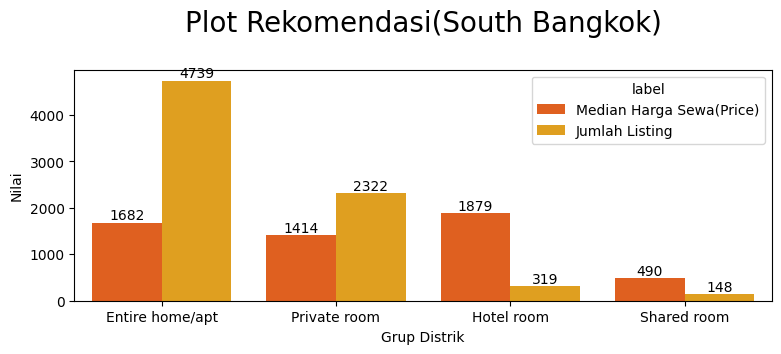

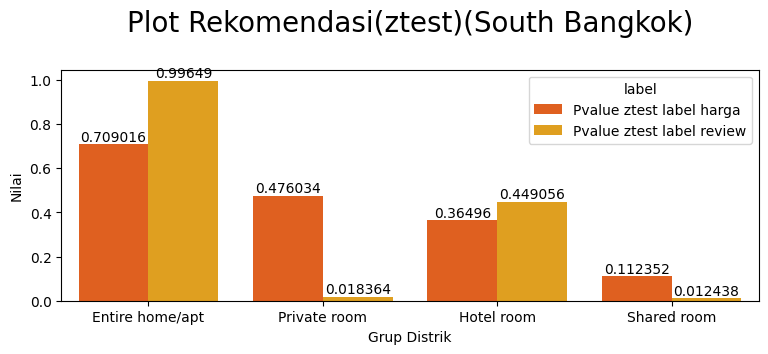

In [223]:
label=[i for i in range(4)]
listgrupdistrik = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
hargasewa = [1682, 1414, 1879, 490]
jumlahlisting = [4739, 2322, 319, 148]
ztestharga = [0.709016, 0.476034, 0.364960, 0.112352]
ztestreview = [0.996490, 0.018364, 0.449056, 0.012438]
dfrekomendasi1 = pd.DataFrame(data=list(zip(listgrupdistrik, hargasewa)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi1['label'] = 'Median Harga Sewa(Price)'
dfrekomendasi2 = pd.DataFrame(data=list(zip(listgrupdistrik, jumlahlisting)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi2['label'] = 'Jumlah Listing'
dfrekomendasi3 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestharga)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi3['label'] = 'Pvalue ztest label harga'
dfrekomendasi4 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestreview)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi4['label'] = 'Pvalue ztest label review'
dfconcat1 = pd.concat([dfrekomendasi1,dfrekomendasi2])
dfconcat2 = pd.concat([dfrekomendasi3,dfrekomendasi4])

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat1,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(South Bangkok)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat2,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(ztest)(South Bangkok)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x}')
plt.show()

Dari plot diatas terdapat beberapa rekomendasi sebagaimana berikut :
- Pada grup distrik South Bangkok, Hotel merupakan instrumen investasi properti yang paling menjanjikan dikarenakan memiliki median harga sewa yang paling besar dengan jumlah listing pada Airbnb sangat sedikit(kedua terkecil setelah Shared Room), namun perlu dipertimbangkan juga untuk berinvestasi pada Hotel membutuhkan biaya modal yang cukup besar dibandingkan ketiga jenis tempat sewa yang lainnya.
- Pada grup distrik South Bangkok, Jika budget investor terbatas, dan harga sewa yang rendah bukan permasalahan, baiknya berinvestasi di jenis tempat sewa Shared room dikarenakan selain karena jumlah pesaing yang paling sedikit(Jumlah listing paling rendah), 1 kamar jenis tempat sewa Shared room dapat digunakan oleh beberapa pengunjung sekaligus.
- Pada grup distrik South Bangkok, jika investor menginginkan pilihan yang moderate dimana menginginkan harga sewa yang tidak terlalu rendah, namun jumlah pesaing yang juga tidak terlalu berlebih, baiknya berinvestasi pada Private room.
- Pada grup distrik South Bangkok, Sebaiknya menghindari berinvestasi di Entire home(Apartemen) dikarenakan jumlah pesaing yang sudah sangat berlebih.
- Pada grup distrik South Bangkok, jika perkembangan review menjadi concern dari investor, sebaiknya menghindari berinvestasi pada jenis tempat sewa Private room dan Shared room, dikarenakan kedua jenis tempat sewa tersebut pada nilai pvalue dari ztest label review bernilai < 0.05 yang menandakan hipotesis alternatif yang menyatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' dapat diterima.

- **Central Bangkok**

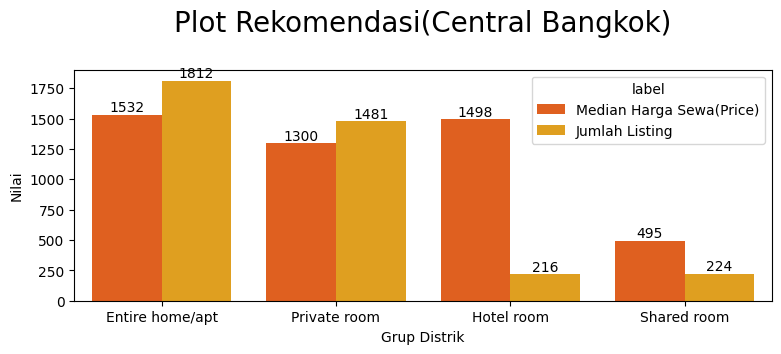

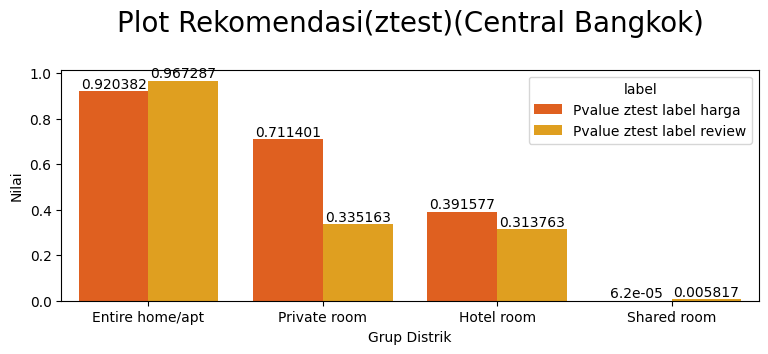

In [224]:
label=[i for i in range(4)]
listgrupdistrik = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
hargasewa = [1532, 1300, 1498, 495]
jumlahlisting = [1812, 1481, 216, 224]
ztestharga = [0.920382, 0.711401, 0.391577, 0.000062]
ztestreview = [0.967287, 0.335163, 0.313763, 0.005817]
dfrekomendasi1 = pd.DataFrame(data=list(zip(listgrupdistrik, hargasewa)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi1['label'] = 'Median Harga Sewa(Price)'
dfrekomendasi2 = pd.DataFrame(data=list(zip(listgrupdistrik, jumlahlisting)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi2['label'] = 'Jumlah Listing'
dfrekomendasi3 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestharga)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi3['label'] = 'Pvalue ztest label harga'
dfrekomendasi4 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestreview)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi4['label'] = 'Pvalue ztest label review'
dfconcat1 = pd.concat([dfrekomendasi1,dfrekomendasi2])
dfconcat2 = pd.concat([dfrekomendasi3,dfrekomendasi4])

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat1,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(Central Bangkok)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat2,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(ztest)(Central Bangkok)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x}')
plt.show()

Dari plot diatas terdapat beberapa rekomendasi sebagaimana berikut :
- Pada grup distrik Central Bangkok, Hotel merupakan instrumen investasi properti yang paling menjanjikan dikarenakan memiliki median harga sewa kedua terbesar( hanya selisih sedikit dengan Entire home) dengan jumlah listing pada Airbnb yang paling kecil, namun perlu dipertimbangkan juga untuk berinvestasi pada Hotel membutuhkan biaya modal yang cukup besar dibandingkan ketiga jenis tempat sewa yang lainnya.
- Pada grup distrik Central Bangkok, jika investor menginginkan pilihan yang moderate dimana menginginkan harga sewa yang tidak terlalu rendah, namun jumlah pesaing yang juga tidak terlalu berlebih, baiknya berinvestasi pada Private room, atau bisa juga berinvestasi pada Entire home/apt.
- Pada grup distrik Central Bangkok, Jika budget investor terbatas, dan harga sewa yang rendah bukan permasalahan, baiknya berinvestasi di jenis tempat sewa Shared room dikarenakan selain karena jumlah pesaing yang sedikit(jumlah listing yang rendah), 1 kamar jenis tempat sewa Shared room dapat digunakan oleh beberapa pengunjung sekaligus.
- Pada grup distrik Central Bangkok, Jika investor ingin berinvestasi pada tempat sewa Shared room, baiknya investor memasang harga sewa dibawah dari nilai median pada plot diatas(dibawah 495 Baht) agar bisa bersaing, hal ini dikarenakan pada jenis tempat sewa Shared room nilai pvalue dari ztest label harga bernilai < 0.05 yang menandakan hipotesis alternatif yang menyatakan bahwa proporsi jumlah kelompok 'Murah' lebih besar dari proporsi jumlah kelompok 'Mahal' dapat diterima. Dimana sebelumnya kita telah menetapkan bahwa kelompok 'Murah' adalah kelompok yang harga sewanya dibawah nilai Median setelah dikelompokkan terhadap distrik dan jenis tempat sewanya. Hal ini menandakan investor-investor Shared room lainnya yang berinvestasi di grup distrik Central Bangkok banyak yang memasang harga sewa dibawah nilai median.
- Pada grup distrik Central Bangkok, selain dari penetapan harga sewa Shared room baiknya dibawah 495 Baht, investasi pada tempat sewa Shared room perlu dipertimbangkan untuk dihindari jika perkembangan review menjadi concern dari investor, hal ini dikarenakan pada jenis tempat sewa Shared room pada nilai pvalue dari ztest label review bernilai < 0.05 yang menandakan hipotesis alternatif yang menyatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' dapat diterima.

- **North Bangkok**

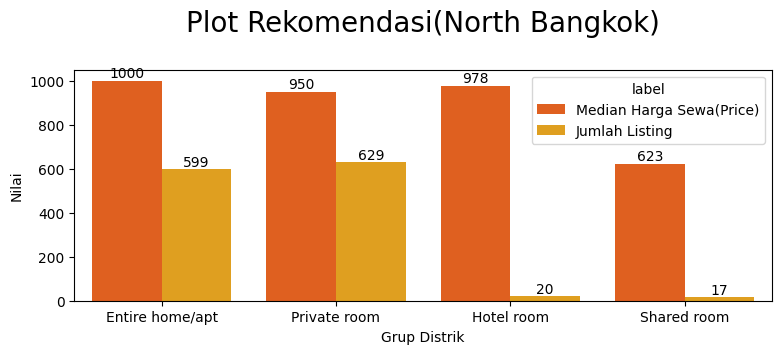

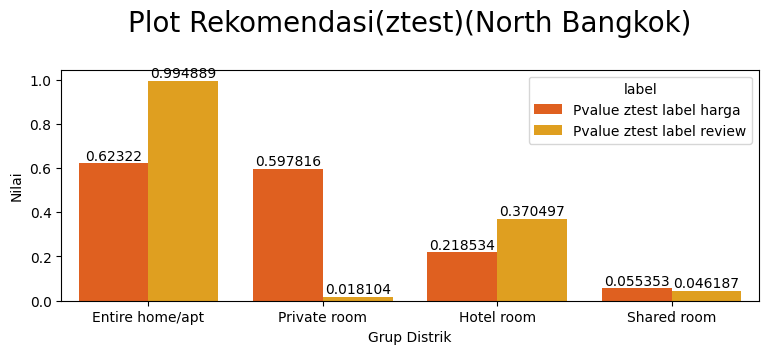

In [225]:
label=[i for i in range(4)]
listgrupdistrik = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
hargasewa = [1000, 950, 978, 623]
jumlahlisting = [599, 629, 20, 17]
ztestharga = [0.623220, 0.597816, 0.218534, 0.055353]
ztestreview = [0.994889, 0.018104, 0.370497, 0.046187]
dfrekomendasi1 = pd.DataFrame(data=list(zip(listgrupdistrik, hargasewa)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi1['label'] = 'Median Harga Sewa(Price)'
dfrekomendasi2 = pd.DataFrame(data=list(zip(listgrupdistrik, jumlahlisting)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi2['label'] = 'Jumlah Listing'
dfrekomendasi3 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestharga)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi3['label'] = 'Pvalue ztest label harga'
dfrekomendasi4 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestreview)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi4['label'] = 'Pvalue ztest label review'
dfconcat1 = pd.concat([dfrekomendasi1,dfrekomendasi2])
dfconcat2 = pd.concat([dfrekomendasi3,dfrekomendasi4])

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat1,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(North Bangkok)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat2,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(ztest)(North Bangkok)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x}')
plt.show()

Dari plot diatas terdapat beberapa rekomendasi sebagaimana berikut :
- Pada grup distrik North Bangkok, Hotel merupakan instrumen investasi properti yang paling menjanjikan dikarenakan memiliki median harga sewa kedua terbesar( hanya selisih sedikit dengan Entire home) dengan jumlah listing pada Airbnb yang paling kecil, namun perlu dipertimbangkan juga untuk berinvestasi pada Hotel membutuhkan biaya modal yang cukup besar dibandingkan ketiga jenis tempat sewa yang lainnya.
- Pada grup distrik North Bangkok, Selain Hotel, Shared room juga direkomendasikan karena tidak seperti pada daerah lain, median harga sewa Shared room di North Bangkok terbilang cukup tinggi, disisi lain Shared room juga memiliki jumlah pesaing yang paling sedikit(jumlah listing paling rendah).
- Pada grup distrik North Bangkok, kami tidak merekomendasikan untuk berinvestasi pada Entire home(Apartemen) dan juga Private room, hal ini dikarenakan pada grup distrik North Bangkok sudah ada opsi yang lebih baik untuk diinvestasikan (Hotel untuk investor dengan budget tinggi, Shared room untuk investor dengan budget rendah) .
- Pada grup distrik North Bangkok, jika perkembangan review menjadi concern dari investor, sebaiknya menghindari berinvestasi pada jenis tempat sewa Private room dan Shared room, dikarenakan kedua jenis tempat sewa tersebut pada nilai pvalue dari ztest label review bernilai < 0.05 yang menandakan hipotesis alternatif yang menyatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' dapat diterima.

- **North Thonburi**

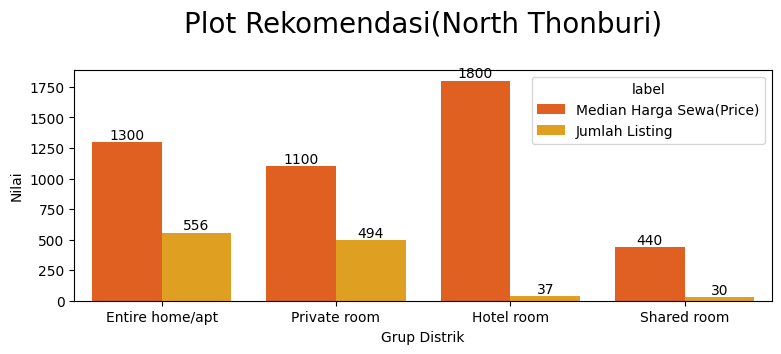

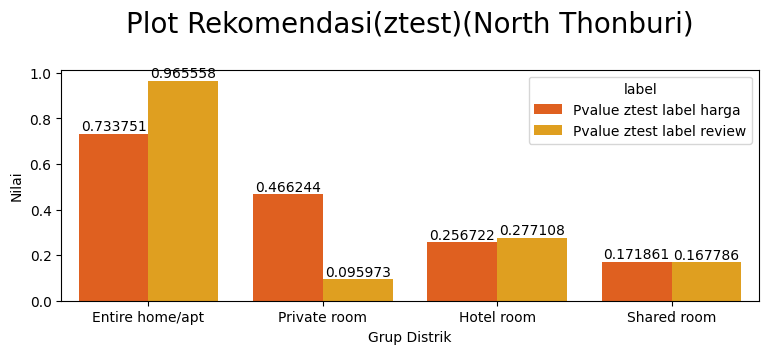

In [226]:
label=[i for i in range(4)]
listgrupdistrik = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
hargasewa = [1300, 1100, 1800, 440]
jumlahlisting = [556, 494, 37, 30]
ztestharga = [0.733751, 0.466244, 0.256722, 0.171861]
ztestreview = [0.965558, 0.095973, 0.277108, 0.167786]
dfrekomendasi1 = pd.DataFrame(data=list(zip(listgrupdistrik, hargasewa)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi1['label'] = 'Median Harga Sewa(Price)'
dfrekomendasi2 = pd.DataFrame(data=list(zip(listgrupdistrik, jumlahlisting)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi2['label'] = 'Jumlah Listing'
dfrekomendasi3 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestharga)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi3['label'] = 'Pvalue ztest label harga'
dfrekomendasi4 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestreview)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi4['label'] = 'Pvalue ztest label review'
dfconcat1 = pd.concat([dfrekomendasi1,dfrekomendasi2])
dfconcat2 = pd.concat([dfrekomendasi3,dfrekomendasi4])

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat1,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(North Thonburi)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat2,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(ztest)(North Thonburi)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x}')
plt.show()

Dari plot diatas terdapat beberapa rekomendasi sebagaimana berikut :
- Pada grup distrik North Thonburi, Hotel merupakan instrumen investasi properti yang sangat menjanjikan dikarenakan memiliki median harga sewa terbesar dengan jumlah listing pada Airbnb kedua paling kecil, namun perlu dipertimbangkan juga untuk berinvestasi pada Hotel membutuhkan biaya modal yang cukup besar dibandingkan ketiga jenis tempat sewa yang lainnya.
- Pada grup distrik North Thonburi, jika investor menginginkan pilihan yang moderate dimana menginginkan harga sewa yang tidak terlalu rendah, namun jumlah pesaing yang juga tidak terlalu berlebih, baiknya berinvestasi pada Private room, atau bisa juga berinvestasi pada Entire home/apt. Namun kami lebih merekomendasikan Entire home/apt dikarenakan median harga yang lebih tinggi padahal jumlah pesaing(banyaknya listing) tidak terlalu berbeda jauh.
- Pada grup distrik North Thonburi, Jika budget investor terbatas, dan harga sewa yang rendah bukan permasalahan, baiknya berinvestasi di jenis tempat sewa Shared room dikarenakan selain karena jumlah pesaing yang paling sedikit, 1 kamar jenis tempat sewa Shared room dapat digunakan oleh beberapa pengunjung sekaligus.

- **East Bangkok**

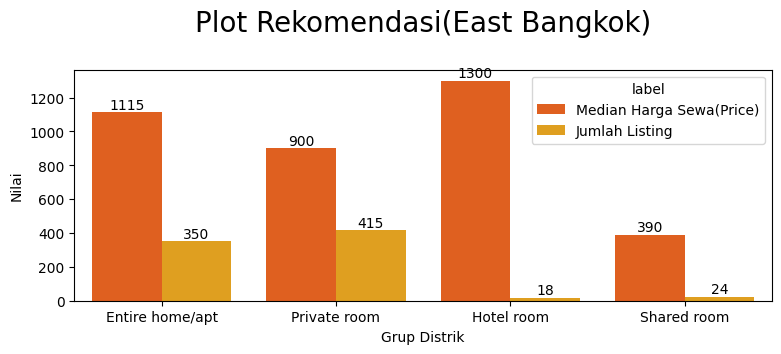

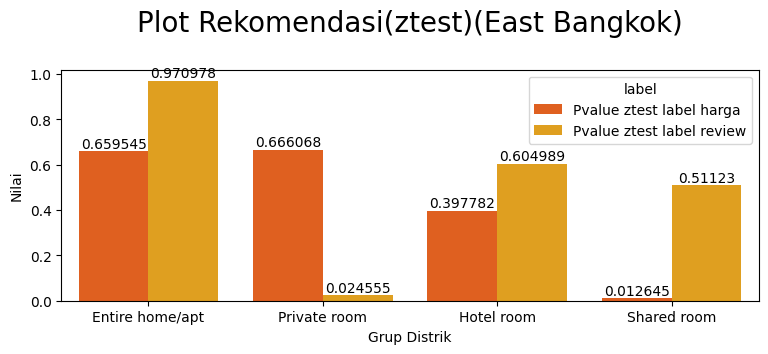

In [227]:
label=[i for i in range(4)]
listgrupdistrik = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
hargasewa = [1115, 900, 1300, 390]
jumlahlisting = [350, 415, 18, 24]
ztestharga = [0.659545, 0.666068, 0.397782, 0.012645]
ztestreview = [0.970978, 0.024555, 0.604989, 0.511230]
dfrekomendasi1 = pd.DataFrame(data=list(zip(listgrupdistrik, hargasewa)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi1['label'] = 'Median Harga Sewa(Price)'
dfrekomendasi2 = pd.DataFrame(data=list(zip(listgrupdistrik, jumlahlisting)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi2['label'] = 'Jumlah Listing'
dfrekomendasi3 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestharga)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi3['label'] = 'Pvalue ztest label harga'
dfrekomendasi4 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestreview)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi4['label'] = 'Pvalue ztest label review'
dfconcat1 = pd.concat([dfrekomendasi1,dfrekomendasi2])
dfconcat2 = pd.concat([dfrekomendasi3,dfrekomendasi4])

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat1,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(East Bangkok)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat2,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(ztest)(East Bangkok)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x}')
plt.show()

Dari plot diatas terdapat beberapa rekomendasi sebagaimana berikut :
- Pada grup distrik East Bangkok, Hotel merupakan instrumen investasi properti yang sangat menjanjikan dikarenakan memiliki median harga sewa terbesar dengan jumlah listing pada Airbnb terkecil(paling sedikit pesaing), namun perlu dipertimbangkan juga untuk berinvestasi pada Hotel membutuhkan biaya modal yang cukup besar dibandingkan ketiga jenis tempat sewa yang lainnya.
- Pada grup distrik East Bangkok, jika investor menginginkan pilihan yang moderate dimana menginginkan harga sewa yang tidak terlalu rendah, namun jumlah pesaing yang juga tidak terlalu berlebih, baiknya berinvestasi pada Private room, atau bisa juga berinvestasi pada Entire home/apt. Namun kami lebih merekomendasikan Entire home/apt dikarenakan median harga yang lebih tinggi padahal jumlah pesaing(banyaknya listing) tidak terlalu berbeda jauh.
- Pada grup distrik East Bangkok, Jika budget investor terbatas, dan harga sewa yang rendah bukan permasalahan, baiknya berinvestasi di jenis tempat sewa Shared room dikarenakan selain karena jumlah pesaing yang paling sedikit, 1 kamar jenis tempat sewa Shared room dapat digunakan oleh beberapa pengunjung sekaligus.
- Pada grup distrik East Bangkok, Jika investor ingin berinvestasi pada tempat sewa Shared room, baiknya investor memasang harga sewa dibawah dari nilai median pada plot diatas(dibawah 390 Baht) agar bisa bersaing, hal ini dikarenakan pada jenis tempat sewa Shared room nilai pvalue dari ztest label harga bernilai < 0.05 yang menandakan hipotesis alternatif yang menyatakan bahwa proporsi jumlah kelompok 'Murah' lebih besar dari proporsi jumlah kelompok 'Mahal' dapat diterima. Dimana sebelumnya kita telah menetapkan bahwa kelompok 'Murah' adalah kelompok yang harga sewanya dibawah nilai Median setelah dikelompokkan terhadap distrik dan jenis tempat sewanya. Hal ini menandakan investor-investor Shared room lainnya yang berinvestasi di grup distrik East Bangkok banyak yang memasang harga sewa dibawah nilai median.
- Pada grup distrik East Bangkok, jika perkembangan review menjadi concern dari investor, sebaiknya menghindari berinvestasi pada jenis tempat sewa Private room, hal ini dikarenakan Private room memiliki pvalue dari ztest label review bernilai < 0.05 yang menandakan hipotesis alternatif yang menyatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' dapat diterima.

- **South Thonburi**

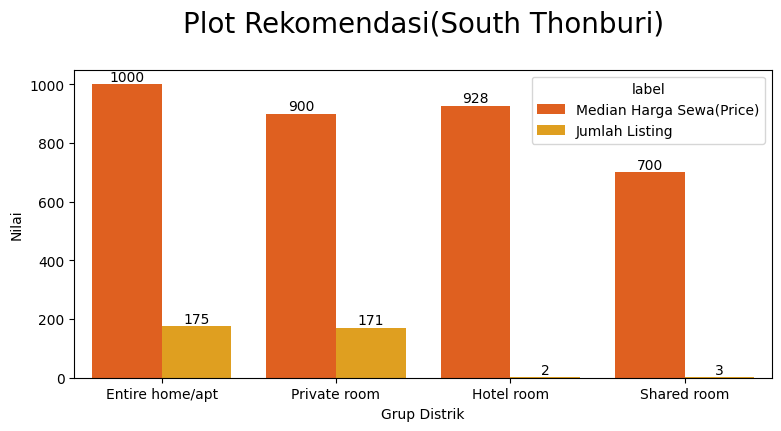

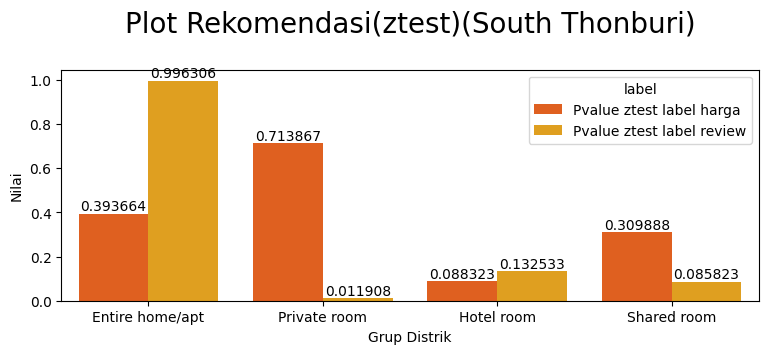

In [228]:
label=[i for i in range(4)]
listgrupdistrik = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
hargasewa = [1000, 900, 928, 700]
jumlahlisting = [175, 171, 2, 3]
ztestharga = [0.393664, 0.713867, 0.088323, 0.309888]
ztestreview = [0.996306, 0.011908, 0.132533, 0.085823]
dfrekomendasi1 = pd.DataFrame(data=list(zip(listgrupdistrik, hargasewa)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi1['label'] = 'Median Harga Sewa(Price)'
dfrekomendasi2 = pd.DataFrame(data=list(zip(listgrupdistrik, jumlahlisting)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi2['label'] = 'Jumlah Listing'
dfrekomendasi3 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestharga)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi3['label'] = 'Pvalue ztest label harga'
dfrekomendasi4 = pd.DataFrame(data=list(zip(listgrupdistrik, ztestreview)), index=label).rename(columns={0: 'Grup Distrik', 1: 'Nilai'})
dfrekomendasi4['label'] = 'Pvalue ztest label review'
dfconcat1 = pd.concat([dfrekomendasi1,dfrekomendasi2])
dfconcat2 = pd.concat([dfrekomendasi3,dfrekomendasi4])

plt.figure(figsize=(9,4))
ax = sns.barplot(
    data=dfconcat1,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(South Thonburi)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x:.0f}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x:.0f}')

plt.figure(figsize=(9,3))
ax = sns.barplot(
    data=dfconcat2,
    x='Grup Distrik',
    y='Nilai',
    palette='autumn',
    hue='label'
)
plt.title('Plot Rekomendasi(ztest)(South Thonburi)\n', size=20, pad=0)
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: f'{x}')
ax.bar_label(ax.containers[1], label_type='edge', fmt=lambda x: f'{x}')
plt.show()

Dari plot diatas terdapat beberapa rekomendasi sebagaimana berikut :
- Pada grup distrik South Thonburi, Hotel merupakan instrumen investasi properti yang sangat menjanjikan dikarenakan memiliki median harga sewa kedua terbesar(Hanya selisih sedikit dengan Entir home/apt) dengan jumlah listing pada Airbnb terkecil(total jumlah listing hanya 2), namun perlu dipertimbangkan juga untuk berinvestasi pada Hotel membutuhkan biaya modal yang cukup besar dibandingkan ketiga jenis tempat sewa yang lainnya.
- Pada grup distrik South Thonburi, Selain Hotel, Shared room juga direkomendasikan karena tidak seperti pada daerah lain, median harga sewa Shared room di South Thonburi terbilang cukup tinggi, disisi lain Shared room juga memiliki jumlah pesaing kedua paling sedikit(total jumlah listing hanya 3).
- Pada grup distrik South Thonburi, kami tidak merekomendasikan untuk berinvestasi pada Entire home(Apartemen) dan juga Private room, hal ini dikarenakan pada grup distrik South Thonburi sudah ada opsi yang lebih baik untuk diinvestasikan (Hotel untuk investor dengan budget tinggi, Shared room untuk investor dengan budget rendah) .
- Pada grup distrik South Thonburi, jika perkembangan review menjadi concern dari investor, sebaiknya menghindari berinvestasi pada jenis tempat sewa Private room, dikarenakan jenis tempat sewa tersebut pada nilai pvalue dari ztest label review bernilai < 0.05 yang menandakan hipotesis alternatif yang menyatakan bahwa proporsi jumlah kelompok 'Kurang Dikenal' lebih besar dari proporsi jumlah kelompok 'Cukup Dikenal' dapat diterima.